***
# Supervised Learning : Implementing Shapley Additive Explanations for Interpreting Feature Contributions in Penalized Cox Regression

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *July 18, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Predictive Model Development](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Cox Regression with No Penalty](#1.6.2)
        * [1.6.3 Cox Regression With Full L1 Penalty](#1.6.3)
        * [1.6.4 Cox Regression With Full L2 Penalty](#1.6.4)
        * [1.6.5 Cox Regression With Equal L1 | L2 Penalty](#1.6.5)
        * [1.6.6 Cox Regression With Predominantly L1-Weighted | L2 Penalty](#1.6.6)
        * [1.6.7 Cox Regression With Predominantly L2-Weighted | L1 Penalty](#1.6.7)
    * [1.7 Consolidated Findings](#1.7)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements the **Cox Proportional Hazards Regression** algorithm with **No Penalty**, **Full L1 Penalty**, **Full L2 Penalty**, **Equal L1|L2 Penalties** and **Weighted L1|L2 Penalties** using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark> to estimate the survival probabilities of right-censored survival time and status responses. The resulting predictions derived from the candidate models were evaluated in terms of their discrimination power using the Harrel's concordance index metric. Additionally, feature impact on model output were estimated using **Shapley Additive Explanations**. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document. 

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Shapley Additive Explanations](https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) are based on Shapley values developed in the cooperative game theory. The process involves explaining a prediction by assuming that each explanatory variable for an instance is a player in a game where the prediction is the payout. The game is the prediction task for a single instance of the data set. The gain is the actual prediction for this instance minus the average prediction for all instances. The players are the explanatory variable values of the instance that collaborate to receive the gain (predict a certain value). The determined value is the average marginal contribution of an explanatory variable across all possible coalitions.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Liver Cirrhosis Dataset](https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Arjun Bhaybhang](https://www.kaggle.com/arjunbhaybhang)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Book entitled **Counting Processes and Survival Analysis** from [Wiley](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118150672)
2. Research Paper entitled **Efficacy of Liver Transplantation in Patients with Primary Biliary Cirrhosis** from the [New England Journal of Medicine](https://www.nejm.org/doi/abs/10.1056/NEJM198906293202602)
3. Research Paper entitled **Prognosis in Primary Biliary Cirrhosis: Model for Decision Making** from the [Hepatology](https://aasldpubs.onlinelibrary.wiley.com/doi/10.1002/hep.1840100102)

This study hypothesized that the evaluated drug, liver profile test biomarkers and various clinicopathological characteristics influence liver cirrhosis survival between patients.

The event status and survival duration variables for the study are:
* <span style="color: #FF0000">Status</span> - Status of the patient (C, censored | CL, censored due to liver transplant | D, death)
* <span style="color: #FF0000">N_Days</span> - Number of days between registration and the earlier of death, transplantation, or study analysis time (1986)

The predictor variables for the study are:
* <span style="color: #FF0000">Drug</span> - Type of administered drug to the patient (D-Penicillamine | Placebo)
* <span style="color: #FF0000">Age</span> - Patient's age (Days)
* <span style="color: #FF0000">Sex</span> - Patient's sex (Male | Female)
* <span style="color: #FF0000">Ascites</span> - Presence of ascites (Yes | No)
* <span style="color: #FF0000">Hepatomegaly</span> - Presence of hepatomegaly (Yes | No)
* <span style="color: #FF0000">Spiders</span> - Presence of spiders (Yes | No)
* <span style="color: #FF0000">Edema</span> - Presence of edema ( N, No edema and no diuretic therapy for edema | S, Edema present without diuretics or edema resolved by diuretics) | Y, Edema despite diuretic therapy)
* <span style="color: #FF0000">Bilirubin</span> - Serum bilirubin (mg/dl)
* <span style="color: #FF0000">Cholesterol</span> - Serum cholesterol (mg/dl)
* <span style="color: #FF0000">Albumin</span> - Albumin (gm/dl)
* <span style="color: #FF0000">Copper</span> - Urine copper (ug/day)
* <span style="color: #FF0000">Alk_Phos</span> - Alkaline phosphatase (U/liter)
* <span style="color: #FF0000">SGOT</span> - Serum glutamic-oxaloacetic transaminase (U/ml)
* <span style="color: #FF0000">Triglycerides</span> - Triglicerides (mg/dl)
* <span style="color: #FF0000">Platelets</span> - Platelets (cubic ml/1000)
* <span style="color: #FF0000">Prothrombin</span> - Prothrombin time (seconds)
* <span style="color: #FF0000">Stage</span> - Histologic stage of disease (Stage I | Stage II | Stage III | Stage IV)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **418 rows** (observations)
    * **20 columns** (variables)
        * **1/20 metadata** (object)
            * <span style="color: #FF0000">ID</span>
        * **2/20 event | duration** (object | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/20 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **7/20 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
%matplotlib inline

from operator import add,mul,truediv
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance

from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index
from lifelines.statistics import logrank_test
import shap

import warnings
warnings.filterwarnings('ignore')

In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
cirrhosis_survival = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Cirrhosis_Survival.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(cirrhosis_survival.shape)

Dataset Dimensions: 


(418, 20)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cirrhosis_survival.dtypes)

Column Names and Data Types:


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [6]:
##################################
# Taking a snapshot of the dataset
##################################
cirrhosis_survival.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [7]:
##################################
# Taking the ID column as the index
##################################
cirrhosis_survival.set_index(['ID'], inplace=True)

In [8]:
##################################
# Changing the data type for Stage
##################################
cirrhosis_survival['Stage'] = cirrhosis_survival['Stage'].astype('object')

In [9]:
##################################
# Changing the data type for Status
##################################
cirrhosis_survival['Status'] = cirrhosis_survival['Status'].replace({'C':False, 'CL':False, 'D':True}) 

In [10]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(cirrhosis_survival.describe(include='number').transpose())

Numeric Variable Summary:


count          mean          std      min         25%  \
N_Days         418.0   1917.782297  1104.672992    41.00   1092.7500   
Age            418.0  18533.351675  3815.845055  9598.00  15644.5000   
Bilirubin      418.0      3.220813     4.407506     0.30      0.8000   
Cholesterol    284.0    369.510563   231.944545   120.00    249.5000   
Albumin        418.0      3.497440     0.424972     1.96      3.2425   
Copper         310.0     97.648387    85.613920     4.00     41.2500   
Alk_Phos       312.0   1982.655769  2140.388824   289.00    871.5000   
SGOT           312.0    122.556346    56.699525    26.35     80.6000   
Tryglicerides  282.0    124.702128    65.148639    33.00     84.2500   
Platelets      407.0    257.024570    98.325585    62.00    188.5000   
Prothrombin    416.0     10.731731     1.022000     9.00     10.0000   

                    50%       75%       max  
N_Days          1730.00   2613.50   4795.00  
Age            18628.00  21272.50  28650.00  
Bilirubin          1.40      3.40     28.00  
Cholesterol      309.50    400.00   1775.00  
Albumin            3.53      3.77      4.64  
Copper            73.00    123.00    588.00  
Alk_Phos        1259.00   1980.00  13862.40  
SGOT             114.70    151.90    457.25  
Tryglicerides    108.00    151.00    598.00  
Platelets        251.00    318.00    721.00  
Prothrombin       10.60     11.10     18.00

In [11]:
##################################
# Performing a general exploration of the object variables
##################################
print('object Variable Summary:')
display(cirrhosis_survival.describe(include='object').transpose())

object Variable Summary:


count unique              top   freq
Drug            312      2  D-penicillamine    158
Sex             418      2                F    374
Ascites         312      2                N    288
Hepatomegaly    312      2                Y    160
Spiders         312      2                N    222
Edema           418      3                N    354
Stage         412.0    4.0              3.0  155.0

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 12 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">Tryglicerides</span>: Null.Count = 136, Fill.Rate = 0.675
    * <span style="color: #FF0000">Cholesterol</span>: Null.Count = 134, Fill.Rate = 0.679
    * <span style="color: #FF0000">Copper</span>: Null.Count = 108, Fill.Rate = 0.741
    * <span style="color: #FF0000">Drug</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Ascites</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Hepatomegaly</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Spiders</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Alk_Phos</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">SGOT</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Platelets</span>: Null.Count = 11, Fill.Rate = 0.974
    * <span style="color: #FF0000">Stage</span>: Null.Count = 6, Fill.Rate = 0.986
    * <span style="color: #FF0000">Prothrombin</span>: Null.Count = 2, Fill.Rate = 0.995
3. 142 observations noted with at least 1 missing data. From this number, 106 observations reported high Missing.Rate>0.4.
    * 91 Observations: Missing.Rate = 0.450 (9 columns)
    * 15 Observations: Missing.Rate = 0.500 (10 columns)
    * 28 Observations: Missing.Rate = 0.100 (2 columns)
    * 8 Observations: Missing.Rate = 0.050 (1 column)
4. Low variance observed for 3 variables with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">Ascites</span>: First.Second.Mode.Ratio = 12.000
    * <span style="color: #FF0000">Sex</span>: First.Second.Mode.Ratio = 8.500
    * <span style="color: #FF0000">Edema</span>: First.Second.Mode.Ratio = 8.045
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High and marginally high skewness observed for 2 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">Cholesterol</span>: Skewness = +3.409
    * <span style="color: #FF0000">Alk_Phos</span>: Skewness = +2.993

In [12]:
##################################
# Counting the number of duplicated rows
##################################
cirrhosis_survival.duplicated().sum()

0

In [13]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cirrhosis_survival.dtypes)

In [14]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cirrhosis_survival.columns)

In [15]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cirrhosis_survival)] * len(cirrhosis_survival.columns))

In [16]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cirrhosis_survival.isna().sum(axis=0))

In [17]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cirrhosis_survival.count())

In [18]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [19]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count  \
0          N_Days       int64        418             418           0   
1          Status        bool        418             418           0   
2            Drug      object        418             312         106   
3             Age       int64        418             418           0   
4             Sex      object        418             418           0   
5         Ascites      object        418             312         106   
6    Hepatomegaly      object        418             312         106   
7         Spiders      object        418             312         106   
8           Edema      object        418             418           0   
9       Bilirubin     float64        418             418           0   
10    Cholesterol     float64        418             284         134   
11        Albumin     float64        418             418           0   
12         Copper     float64        418             310         108   
13       Alk_Phos     float64        418             312         106   
14           SGOT     float64        418             312         106   
15  Tryglicerides     float64        418             282         136   
16      Platelets     float64        418             407          11   
17    Prothrombin     float64        418             416           2   
18          Stage      object        418             412           6   

    Fill.Rate  
0    1.000000  
1    1.000000  
2    0.746411  
3    1.000000  
4    1.000000  
5    0.746411  
6    0.746411  
7    0.746411  
8    1.000000  
9    1.000000  
10   0.679426  
11   1.000000  
12   0.741627  
13   0.746411  
14   0.746411  
15   0.674641  
16   0.973684  
17   0.995215  
18   0.985646

In [20]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
print('Number of Columns with Missing Data:', str(len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])))

Number of Columns with Missing Data: 12


In [21]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
print('Columns with Missing Data:')
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

Columns with Missing Data:


Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count  \
15  Tryglicerides     float64        418             282         136   
10    Cholesterol     float64        418             284         134   
12         Copper     float64        418             310         108   
2            Drug      object        418             312         106   
5         Ascites      object        418             312         106   
6    Hepatomegaly      object        418             312         106   
7         Spiders      object        418             312         106   
13       Alk_Phos     float64        418             312         106   
14           SGOT     float64        418             312         106   
16      Platelets     float64        418             407          11   
18          Stage      object        418             412           6   
17    Prothrombin     float64        418             416           2   

    Fill.Rate  
15   0.674641  
10   0.679426  
12   0.741627  
2    0.746411  
5    0.746411  
6    0.746411  
7    0.746411  
13   0.746411  
14   0.746411  
16   0.973684  
18   0.985646  
17   0.995215

In [22]:
##################################
# Identifying the rows
# with Fill.Rate < 1.00
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1.00)]

In [23]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = cirrhosis_survival.index.values.tolist()

In [24]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(cirrhosis_survival.columns)] * len(cirrhosis_survival))

In [25]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(cirrhosis_survival.isna().sum(axis=1))

In [26]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [27]:
##################################
# Exploring the rows
# for missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

Row.Name  Column.Count  Null.Count  Missing.Rate
0           1            19           0      0.000000
1           2            19           0      0.000000
2           3            19           0      0.000000
3           4            19           0      0.000000
4           5            19           0      0.000000
..        ...           ...         ...           ...
413       414            19           9      0.473684
414       415            19           9      0.473684
415       416            19           9      0.473684
416       417            19           9      0.473684
417       418            19           9      0.473684

[418 rows x 4 columns]

In [28]:
##################################
# Counting the number of rows
# with Fill.Rate < 1.00
##################################
print('Number of Rows with Missing Data:',str(len(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])))

Number of Rows with Missing Data: 142


In [29]:
##################################
# Identifying the rows
# with Fill.Rate < 1.00
##################################
print('Rows with Missing Data:')
display(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])

Rows with Missing Data:


Row.Name  Column.Count  Null.Count  Missing.Rate
5           6            19           1      0.052632
13         14            19           2      0.105263
39         40            19           2      0.105263
40         41            19           2      0.105263
41         42            19           2      0.105263
..        ...           ...         ...           ...
413       414            19           9      0.473684
414       415            19           9      0.473684
415       416            19           9      0.473684
416       417            19           9      0.473684
417       418            19           9      0.473684

[142 rows x 4 columns]

In [30]:
##################################
# Counting the number of rows
# based on different Fill.Rate categories
##################################
missing_rate_categories = all_row_quality_summary['Missing.Rate'].value_counts().reset_index()
missing_rate_categories.columns = ['Missing.Rate.Category','Missing.Rate.Count']
display(missing_rate_categories.sort_values(['Missing.Rate.Category'], ascending=False))

Missing.Rate.Category  Missing.Rate.Count
3               0.526316                  15
1               0.473684                  91
2               0.105263                  28
4               0.052632                   8
0               0.000000                 276

In [31]:
##################################
# Identifying the rows
# with Missing.Rate > 0.40
##################################
row_high_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.40)]

In [32]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
cirrhosis_survival_numeric = cirrhosis_survival.select_dtypes(include='number')

In [33]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = cirrhosis_survival_numeric.columns

In [34]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = cirrhosis_survival_numeric.min()

In [35]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = cirrhosis_survival_numeric.mean()

In [36]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = cirrhosis_survival_numeric.median()

In [37]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = cirrhosis_survival_numeric.max()

In [38]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[0] for x in cirrhosis_survival_numeric]

In [39]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[1] for x in cirrhosis_survival_numeric]

In [40]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [cirrhosis_survival_numeric[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cirrhosis_survival_numeric]

In [41]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [cirrhosis_survival_numeric[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cirrhosis_survival_numeric]

In [42]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [43]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = cirrhosis_survival_numeric.nunique(dropna=True)

In [44]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(cirrhosis_survival_numeric)] * len(cirrhosis_survival_numeric.columns))

In [45]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [46]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cirrhosis_survival_numeric.skew()

In [47]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = cirrhosis_survival_numeric.kurtosis()

In [48]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

Numeric.Column.Name  Minimum          Mean    Median   Maximum  First.Mode  \
0               N_Days    41.00   1917.782297   1730.00   4795.00     1434.00   
1                  Age  9598.00  18533.351675  18628.00  28650.00    19724.00   
2            Bilirubin     0.30      3.220813      1.40     28.00        0.70   
3          Cholesterol   120.00    369.510563    309.50   1775.00      260.00   
4              Albumin     1.96      3.497440      3.53      4.64        3.35   
5               Copper     4.00     97.648387     73.00    588.00       52.00   
6             Alk_Phos   289.00   1982.655769   1259.00  13862.40      601.00   
7                 SGOT    26.35    122.556346    114.70    457.25       71.30   
8        Tryglicerides    33.00    124.702128    108.00    598.00      118.00   
9            Platelets    62.00    257.024570    251.00    721.00      344.00   
10         Prothrombin     9.00     10.731731     10.60     18.00       10.60   

    Second.Mode  First.Mode.Count  Second.Mode.Count  First.Second.Mode.Ratio  \
0       3445.00                 2                  2                 1.000000   
1      18993.00                 7                  6                 1.166667   
2          0.60                33                 31                 1.064516   
3        316.00                 4                  4                 1.000000   
4          3.50                11                  8                 1.375000   
5         67.00                 8                  7                 1.142857   
6        794.00                 2                  2                 1.000000   
7        137.95                 6                  5                 1.200000   
8         90.00                 7                  6                 1.166667   
9        269.00                 6                  5                 1.200000   
10        11.00                39                 32                 1.218750   

    Unique.Count  Row.Count  Unique.Count.Ratio  Skewness   Kurtosis  
0            399        418            0.954545  0.472602  -0.482139  
1            344        418            0.822967  0.086850  -0.616730  
2             98        418            0.234450  2.717611   8.065336  
3            201        418            0.480861  3.408526  14.337870  
4            154        418            0.368421 -0.467527   0.566745  
5            158        418            0.377990  2.303640   7.624023  
6            295        418            0.705742  2.992834   9.662553  
7            179        418            0.428230  1.449197   4.311976  
8            146        418            0.349282  2.523902  11.802753  
9            243        418            0.581340  0.627098   0.863045  
10            48        418            0.114833  2.223276  10.040773

In [49]:
##################################
# Formulating the dataset
# with object column only
##################################
cirrhosis_survival_object = cirrhosis_survival.select_dtypes(include='object')

In [50]:
##################################
# Gathering the variable names for the object column
##################################
object_variable_name_list = cirrhosis_survival_object.columns

In [51]:
##################################
# Gathering the first mode values for the object column
##################################
object_first_mode_list = [cirrhosis_survival[x].value_counts().index.tolist()[0] for x in cirrhosis_survival_object]

In [52]:
##################################
# Gathering the second mode values for each object column
##################################
object_second_mode_list = [cirrhosis_survival[x].value_counts().index.tolist()[1] for x in cirrhosis_survival_object]

In [53]:
##################################
# Gathering the count of first mode values for each object column
##################################
object_first_mode_count_list = [cirrhosis_survival_object[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cirrhosis_survival_object]

In [54]:
##################################
# Gathering the count of second mode values for each object column
##################################
object_second_mode_count_list = [cirrhosis_survival_object[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cirrhosis_survival_object]

In [55]:
##################################
# Gathering the first mode to second mode ratio for each object column
##################################
object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [56]:
##################################
# Gathering the count of unique values for each object column
##################################
object_unique_count_list = cirrhosis_survival_object.nunique(dropna=True)

In [57]:
##################################
# Gathering the number of observations for each object column
##################################
object_row_count_list = list([len(cirrhosis_survival_object)] * len(cirrhosis_survival_object.columns))

In [58]:
##################################
# Gathering the unique to count ratio for each object column
##################################
object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [59]:
object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
                                                 object_first_mode_list,
                                                 object_second_mode_list,
                                                 object_first_mode_count_list,
                                                 object_second_mode_count_list,
                                                 object_first_second_mode_ratio_list,
                                                 object_unique_count_list,
                                                 object_row_count_list,
                                                 object_unique_count_ratio_list), 
                                        columns=['Object.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(object_column_quality_summary)

Object.Column.Name       First.Mode Second.Mode  First.Mode.Count  \
0               Drug  D-penicillamine     Placebo               158   
1                Sex                F           M               374   
2            Ascites                N           Y               288   
3       Hepatomegaly                Y           N               160   
4            Spiders                N           Y               222   
5              Edema                N           S               354   
6              Stage              3.0         4.0               155   

   Second.Mode.Count  First.Second.Mode.Ratio  Unique.Count  Row.Count  \
0                154                 1.025974             2        418   
1                 44                 8.500000             2        418   
2                 24                12.000000             2        418   
3                152                 1.052632             2        418   
4                 90                 2.466667             2        418   
5                 44                 8.045455             3        418   
6                144                 1.076389             4        418   

   Unique.Count.Ratio  
0            0.004785  
1            0.004785  
2            0.004785  
3            0.004785  
4            0.004785  
5            0.007177  
6            0.009569

In [60]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

3

In [61]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows with high rates of missing data were removed from the dataset:
    * 106 rows with Missing.Rate>0.4 were exluded for subsequent analysis.
2. No variables were removed due to zero or near-zero variance.

In [62]:
##################################
# Performing a general exploration of the original dataset
##################################
print('Dataset Dimensions: ')
display(cirrhosis_survival.shape)

Dataset Dimensions: 


(418, 19)

In [63]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.40
##################################
cirrhosis_survival_filtered_row = cirrhosis_survival.drop(cirrhosis_survival[cirrhosis_survival.index.isin(row_high_missing_rate['Row.Name'].values.tolist())].index)

In [64]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cirrhosis_survival_filtered_row.shape)

Dataset Dimensions: 


(312, 19)

In [65]:
##################################
# Gathering the missing data percentage for each column
# from the filtered data
##################################
data_type_list = list(cirrhosis_survival_filtered_row.dtypes)
variable_name_list = list(cirrhosis_survival_filtered_row.columns)
null_count_list = list(cirrhosis_survival_filtered_row.isna().sum(axis=0))
non_null_count_list = list(cirrhosis_survival_filtered_row.count())
row_count_list = list([len(cirrhosis_survival_filtered_row)] * len(cirrhosis_survival_filtered_row.columns))
fill_rate_list = map(truediv, non_null_count_list, row_count_list)
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary.sort_values(['Fill.Rate'], ascending=True))


Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count  \
15  Tryglicerides     float64        312             282          30   
10    Cholesterol     float64        312             284          28   
16      Platelets     float64        312             308           4   
12         Copper     float64        312             310           2   
0          N_Days       int64        312             312           0   
14           SGOT     float64        312             312           0   
13       Alk_Phos     float64        312             312           0   
11        Albumin     float64        312             312           0   
17    Prothrombin     float64        312             312           0   
9       Bilirubin     float64        312             312           0   
7         Spiders      object        312             312           0   
6    Hepatomegaly      object        312             312           0   
5         Ascites      object        312             312           0   
4             Sex      object        312             312           0   
3             Age       int64        312             312           0   
2            Drug      object        312             312           0   
1          Status        bool        312             312           0   
8           Edema      object        312             312           0   
18          Stage      object        312             312           0   

    Fill.Rate  
15   0.903846  
10   0.910256  
16   0.987179  
12   0.993590  
0    1.000000  
14   1.000000  
13   1.000000  
11   1.000000  
17   1.000000  
9    1.000000  
7    1.000000  
6    1.000000  
5    1.000000  
4    1.000000  
3    1.000000  
2    1.000000  
1    1.000000  
8    1.000000  
18   1.000000

In [66]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
cirrhosis_survival_cleaned = cirrhosis_survival_filtered_row

### 1.4.2 Missing Data Imputation <a class="anchor" id="1.4.2"></a>

1. To prevent data leakage, the original dataset was divided into training and testing subsets prior to imputation.
2. Missing data in the training subset for float variables were imputed using the iterative imputer algorithm with a  linear regression estimator.
    * <span style="color: #FF0000">Tryglicerides</span>: Null.Count = 20
    * <span style="color: #FF0000">Cholesterol</span>: Null.Count = 18
    * <span style="color: #FF0000">Platelets</span>: Null.Count = 2
    * <span style="color: #FF0000">Copper</span>: Null.Count = 1
3. Missing data in the testing subset for float variables will be treated with iterative imputing downstream using a pipeline involving the final preprocessing steps.


In [67]:
##################################
# Formulating the summary
# for all cleaned columns
##################################
cleaned_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_cleaned.columns),
                                                  list(cirrhosis_survival_cleaned.dtypes),
                                                  list([len(cirrhosis_survival_cleaned)] * len(cirrhosis_survival_cleaned.columns)),
                                                  list(cirrhosis_survival_cleaned.count()),
                                                  list(cirrhosis_survival_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(cleaned_column_quality_summary.sort_values(by=['Null.Count'], ascending=False))

Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count
15  Tryglicerides     float64        312             282          30
10    Cholesterol     float64        312             284          28
16      Platelets     float64        312             308           4
12         Copper     float64        312             310           2
0          N_Days       int64        312             312           0
17    Prothrombin     float64        312             312           0
14           SGOT     float64        312             312           0
13       Alk_Phos     float64        312             312           0
11        Albumin     float64        312             312           0
9       Bilirubin     float64        312             312           0
1          Status        bool        312             312           0
8           Edema      object        312             312           0
7         Spiders      object        312             312           0
6    Hepatomegaly      object        312             312           0
5         Ascites      object        312             312           0
4             Sex      object        312             312           0
3             Age       int64        312             312           0
2            Drug      object        312             312           0
18          Stage      object        312             312           0

In [68]:
##################################
# Creating training and testing data
##################################
cirrhosis_survival_train, cirrhosis_survival_test = train_test_split(cirrhosis_survival_cleaned, 
                                                                     test_size=0.30, 
                                                                     stratify=cirrhosis_survival_cleaned['Status'], 
                                                                     random_state=88888888)
cirrhosis_survival_X_train_cleaned = cirrhosis_survival_train.drop(columns=['Status', 'N_Days'])
cirrhosis_survival_y_train_cleaned = cirrhosis_survival_train[['Status', 'N_Days']]
cirrhosis_survival_X_test_cleaned = cirrhosis_survival_test.drop(columns=['Status', 'N_Days'])
cirrhosis_survival_y_test_cleaned = cirrhosis_survival_test[['Status', 'N_Days']]

In [69]:
##################################
# Gathering the training data information
##################################
print(f'Training Dataset Dimensions: Predictors: {cirrhosis_survival_X_train_cleaned.shape}, Event|Duration: {cirrhosis_survival_y_train_cleaned.shape}')

Training Dataset Dimensions: Predictors: (218, 17), Event|Duration: (218, 2)


In [70]:
##################################
# Gathering the testing data information
##################################
print(f'Testing Dataset Dimensions: Predictors: {cirrhosis_survival_X_test_cleaned.shape}, Event|Duration: {cirrhosis_survival_y_test_cleaned.shape}')

Testing Dataset Dimensions: Predictors: (94, 17), Event|Duration: (94, 2)


In [71]:
##################################
# Formulating the summary
# for all cleaned columns
# from the training data
##################################
X_train_cleaned_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_X_train_cleaned.columns),
                                                  list(cirrhosis_survival_X_train_cleaned.dtypes),
                                                  list([len(cirrhosis_survival_X_train_cleaned)] * len(cirrhosis_survival_X_train_cleaned.columns)),
                                                  list(cirrhosis_survival_X_train_cleaned.count()),
                                                  list(cirrhosis_survival_X_train_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(X_train_cleaned_column_quality_summary.sort_values(by=['Null.Count'], ascending=False))

Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count
13  Tryglicerides     float64        218             200          18
8     Cholesterol     float64        218             202          16
14      Platelets     float64        218             215           3
10         Copper     float64        218             217           1
9         Albumin     float64        218             218           0
15    Prothrombin     float64        218             218           0
12           SGOT     float64        218             218           0
11       Alk_Phos     float64        218             218           0
0            Drug      object        218             218           0
1             Age       int64        218             218           0
7       Bilirubin     float64        218             218           0
6           Edema      object        218             218           0
5         Spiders      object        218             218           0
4    Hepatomegaly      object        218             218           0
3         Ascites      object        218             218           0
2             Sex      object        218             218           0
16          Stage      object        218             218           0

In [72]:
##################################
# Formulating the summary
# for all cleaned columns
# from the testing data
##################################
X_test_cleaned_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_X_test_cleaned.columns),
                                                  list(cirrhosis_survival_X_test_cleaned.dtypes),
                                                  list([len(cirrhosis_survival_X_test_cleaned)] * len(cirrhosis_survival_X_test_cleaned.columns)),
                                                  list(cirrhosis_survival_X_test_cleaned.count()),
                                                  list(cirrhosis_survival_X_test_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(X_test_cleaned_column_quality_summary.sort_values(by=['Null.Count'], ascending=False))


Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count
8     Cholesterol     float64         94              82          12
13  Tryglicerides     float64         94              82          12
14      Platelets     float64         94              93           1
10         Copper     float64         94              93           1
9         Albumin     float64         94              94           0
15    Prothrombin     float64         94              94           0
12           SGOT     float64         94              94           0
11       Alk_Phos     float64         94              94           0
0            Drug      object         94              94           0
1             Age       int64         94              94           0
7       Bilirubin     float64         94              94           0
6           Edema      object         94              94           0
5         Spiders      object         94              94           0
4    Hepatomegaly      object         94              94           0
3         Ascites      object         94              94           0
2             Sex      object         94              94           0
16          Stage      object         94              94           0

In [73]:
##################################
# Formulating the cleaned training dataset
# with object columns only
##################################
cirrhosis_survival_X_train_cleaned_object = cirrhosis_survival_X_train_cleaned.select_dtypes(include='object')
cirrhosis_survival_X_train_cleaned_object.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_cleaned_object.head()

Drug Sex Ascites Hepatomegaly Spiders Edema Stage
0  D-penicillamine   F       N            N       N     N   2.0
1  D-penicillamine   M       N            N       N     N   3.0
2  D-penicillamine   F       N            N       N     N   2.0
3          Placebo   F       Y            Y       Y     Y   4.0
4          Placebo   F       N            Y       N     N   2.0

In [74]:
##################################
# Formulating the cleaned training dataset
# with integer columns only
##################################
cirrhosis_survival_X_train_cleaned_int = cirrhosis_survival_X_train_cleaned.select_dtypes(include='int')
cirrhosis_survival_X_train_cleaned_int.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_cleaned_int.head()

Age
0  13329
1  12912
2  17180
3  17884
4  15177

In [75]:
##################################
# Formulating the cleaned training dataset
# with float columns only
##################################
cirrhosis_survival_X_train_cleaned_float = cirrhosis_survival_X_train_cleaned.select_dtypes(include='float')
cirrhosis_survival_X_train_cleaned_float.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_cleaned_float.head()

Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        3.4        450.0     3.37    32.0    1408.0  116.25          118.0   
1        2.4        646.0     3.83   102.0     855.0  127.00          194.0   
2        0.9        346.0     3.77    59.0     794.0  125.55           56.0   
3        2.5        188.0     3.67    57.0    1273.0  119.35          102.0   
4        4.7        296.0     3.44   114.0    9933.2  206.40          101.0   

   Platelets  Prothrombin  
0      313.0         11.2  
1      306.0         10.3  
2      336.0         10.6  
3      110.0         11.1  
4      195.0         10.3

In [76]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
lr = LinearRegression()

In [77]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
iterative_imputer = IterativeImputer(
    estimator = lr,
    max_iter = 10,
    tol = 1e-10,
    imputation_order = 'ascending',
    random_state=88888888
)

In [78]:
##################################
# Implementing the iterative imputer 
##################################
cirrhosis_survival_X_train_imputed_float_array = iterative_imputer.fit_transform(cirrhosis_survival_X_train_cleaned_float)

In [79]:
##################################
# Transforming the imputed training data
# from an array to a dataframe
##################################
cirrhosis_survival_X_train_imputed_float = pd.DataFrame(cirrhosis_survival_X_train_imputed_float_array, 
                                                        columns = cirrhosis_survival_X_train_cleaned_float.columns)
cirrhosis_survival_X_train_imputed_float.head()

Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        3.4        450.0     3.37    32.0    1408.0  116.25          118.0   
1        2.4        646.0     3.83   102.0     855.0  127.00          194.0   
2        0.9        346.0     3.77    59.0     794.0  125.55           56.0   
3        2.5        188.0     3.67    57.0    1273.0  119.35          102.0   
4        4.7        296.0     3.44   114.0    9933.2  206.40          101.0   

   Platelets  Prothrombin  
0      313.0         11.2  
1      306.0         10.3  
2      336.0         10.6  
3      110.0         11.1  
4      195.0         10.3

In [80]:
##################################
# Formulating the imputed training dataset
##################################
cirrhosis_survival_X_train_imputed = pd.concat([cirrhosis_survival_X_train_cleaned_int,
                                                cirrhosis_survival_X_train_cleaned_object,
                                                cirrhosis_survival_X_train_imputed_float], 
                                               axis=1, 
                                               join='inner')  

In [81]:
##################################
# Formulating the summary
# for all imputed columns
##################################
X_train_imputed_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_X_train_imputed.columns),
                                                         list(cirrhosis_survival_X_train_imputed.dtypes),
                                                         list([len(cirrhosis_survival_X_train_imputed)] * len(cirrhosis_survival_X_train_imputed.columns)),
                                                         list(cirrhosis_survival_X_train_imputed.count()),
                                                         list(cirrhosis_survival_X_train_imputed.isna().sum(axis=0))), 
                                                     columns=['Column.Name',
                                                              'Column.Type',
                                                              'Row.Count',
                                                              'Non.Null.Count',
                                                              'Null.Count'])
display(X_train_imputed_column_quality_summary)

Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count
0             Age       int64        218             218           0
1            Drug      object        218             218           0
2             Sex      object        218             218           0
3         Ascites      object        218             218           0
4    Hepatomegaly      object        218             218           0
5         Spiders      object        218             218           0
6           Edema      object        218             218           0
7           Stage      object        218             218           0
8       Bilirubin     float64        218             218           0
9     Cholesterol     float64        218             218           0
10        Albumin     float64        218             218           0
11         Copper     float64        218             218           0
12       Alk_Phos     float64        218             218           0
13           SGOT     float64        218             218           0
14  Tryglicerides     float64        218             218           0
15      Platelets     float64        218             218           0
16    Prothrombin     float64        218             218           0

### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed in the training subset for 4 numeric variables with Outlier.Ratio>0.05 and marginal to high Skewness.
    * <span style="color: #FF0000">Alk_Phos</span>: Outlier.Count = 25, Outlier.Ratio = 0.114, Skewness=+3.035
    * <span style="color: #FF0000">Bilirubin</span>: Outlier.Count = 18, Outlier.Ratio = 0.083, Skewness=+3.121
    * <span style="color: #FF0000">Cholesterol</span>: Outlier.Count = 17, Outlier.Ratio = 0.078, Skewness=+3.761
    * <span style="color: #FF0000">Prothrombin</span>: Outlier.Count = 12, Outlier.Ratio = 0.055, Skewness=+1.009
2. Minimal number of outliers observed in the training subset for 5 numeric variables with Outlier.Ratio>0.00 but <0.05 and normal to marginal Skewness.
    * <span style="color: #FF0000">Copper</span>: Outlier.Count = 8, Outlier.Ratio = 0.037, Skewness=+1.485
    * <span style="color: #FF0000">Albumin</span>: Outlier.Count = 6, Outlier.Ratio = 0.027, Skewness=-0.589
    * <span style="color: #FF0000">SGOT</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+0.934
    * <span style="color: #FF0000">Tryglicerides</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+2.817
    * <span style="color: #FF0000">Platelets</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+0.374
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.223

In [82]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
cirrhosis_survival_X_train_imputed_numeric = cirrhosis_survival_X_train_imputed.select_dtypes(include='number')

In [83]:
##################################
# Gathering the variable names for each numeric column
##################################
X_train_numeric_variable_name_list = list(cirrhosis_survival_X_train_imputed_numeric.columns)

In [84]:
##################################
# Gathering the skewness value for each numeric column
##################################
X_train_numeric_skewness_list = cirrhosis_survival_X_train_imputed_numeric.skew()

In [85]:
##################################
# Computing the interquartile range
# for all columns
##################################
cirrhosis_survival_X_train_imputed_numeric_q1 = cirrhosis_survival_X_train_imputed_numeric.quantile(0.25)
cirrhosis_survival_X_train_imputed_numeric_q3 = cirrhosis_survival_X_train_imputed_numeric.quantile(0.75)
cirrhosis_survival_X_train_imputed_numeric_iqr = cirrhosis_survival_X_train_imputed_numeric_q3 - cirrhosis_survival_X_train_imputed_numeric_q1

In [86]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
X_train_numeric_outlier_count_list = ((cirrhosis_survival_X_train_imputed_numeric < (cirrhosis_survival_X_train_imputed_numeric_q1 - 1.5 * cirrhosis_survival_X_train_imputed_numeric_iqr)) | (cirrhosis_survival_X_train_imputed_numeric > (cirrhosis_survival_X_train_imputed_numeric_q3 + 1.5 * cirrhosis_survival_X_train_imputed_numeric_iqr))).sum()

In [87]:
##################################
# Gathering the number of observations for each column
##################################
X_train_numeric_row_count_list = list([len(cirrhosis_survival_X_train_imputed_numeric)] * len(cirrhosis_survival_X_train_imputed_numeric.columns))

In [88]:
##################################
# Gathering the unique to count ratio for each object column
##################################
X_train_numeric_outlier_ratio_list = map(truediv, X_train_numeric_outlier_count_list, X_train_numeric_row_count_list)

In [89]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
X_train_numeric_column_outlier_summary = pd.DataFrame(zip(X_train_numeric_variable_name_list,
                                                          X_train_numeric_skewness_list,
                                                          X_train_numeric_outlier_count_list,
                                                          X_train_numeric_row_count_list,
                                                          X_train_numeric_outlier_ratio_list), 
                                                      columns=['Numeric.Column.Name',
                                                               'Skewness',
                                                               'Outlier.Count',
                                                               'Row.Count',
                                                               'Outlier.Ratio'])
display(X_train_numeric_column_outlier_summary.sort_values(by=['Outlier.Count'], ascending=False))

Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio
5            Alk_Phos  3.035777             25        218       0.114679
1           Bilirubin  3.121255             18        218       0.082569
2         Cholesterol  3.760943             17        218       0.077982
9         Prothrombin  1.009263             12        218       0.055046
4              Copper  1.485547              8        218       0.036697
3             Albumin -0.589651              6        218       0.027523
6                SGOT  0.934535              4        218       0.018349
7       Tryglicerides  2.817187              4        218       0.018349
8           Platelets  0.374251              4        218       0.018349
0                 Age  0.223080              1        218       0.004587

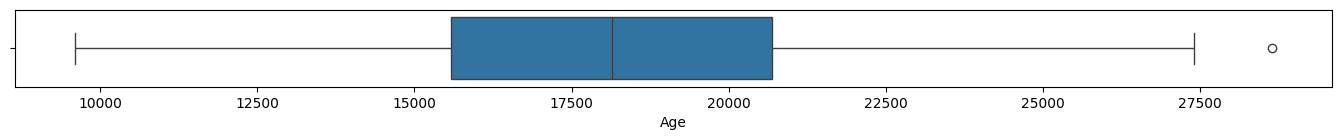

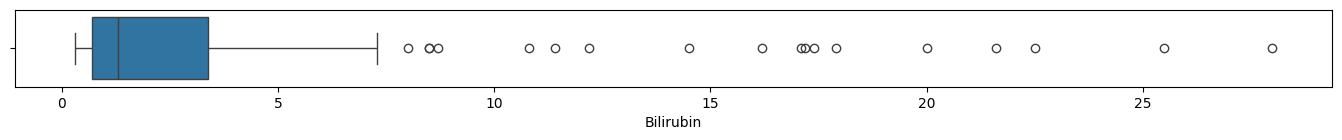

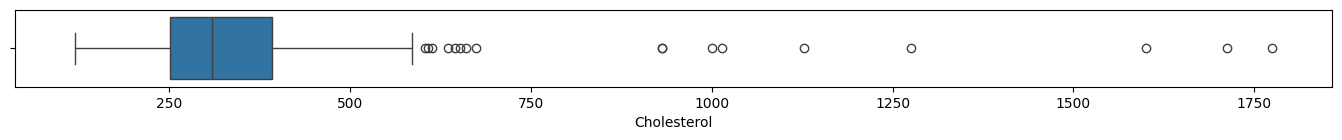

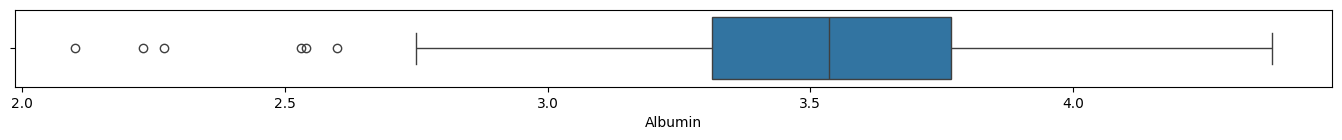

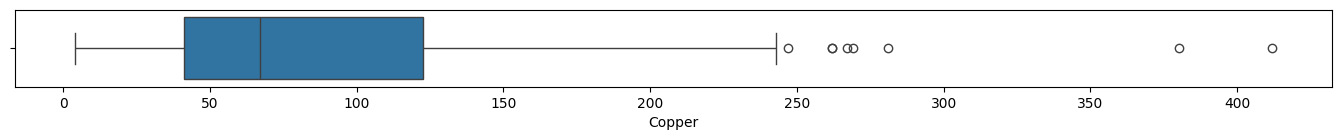

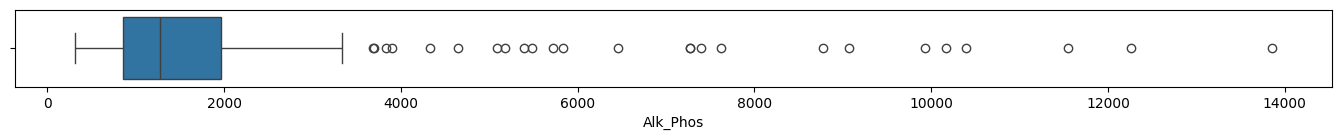

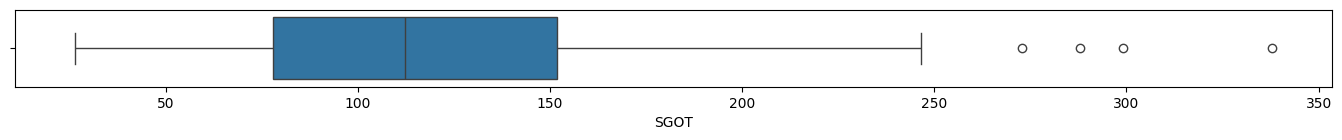

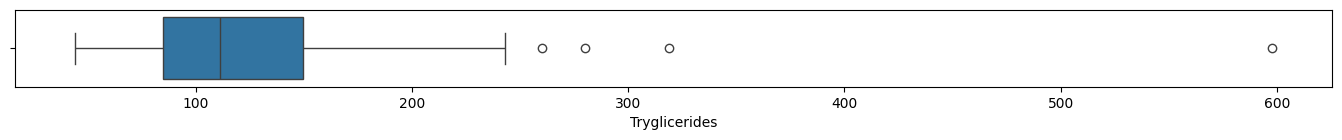

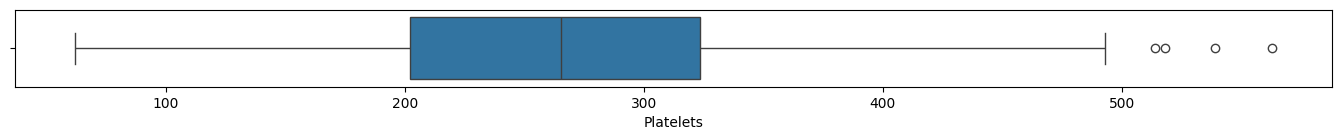

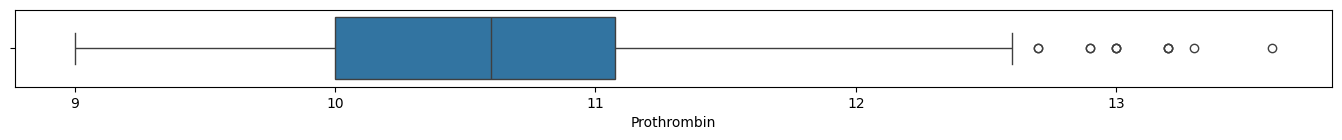

In [90]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cirrhosis_survival_X_train_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cirrhosis_survival_X_train_imputed_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

[Pearson’s Correlation Coefficient](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) is a parametric measure of the linear correlation for a pair of features by calculating the ratio between their covariance and the product of their standard deviations. The presence of high absolute correlation values indicate the univariate association between the numeric predictors and the numeric response.

1. All numeric variables in the training subset were retained since majority reported sufficiently moderate and statistically significant correlation with no excessive multicollinearity.
2. Among pairwise combinations of numeric variables in the training subset, the highest Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Copper</span>: Pearson.Correlation.Coefficient = +0.503
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">SGOT</span>: Pearson.Correlation.Coefficient = +0.444
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Tryglicerides</span>: Pearson.Correlation.Coefficient = +0.389
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Cholesterol</span>: Pearson.Correlation.Coefficient = +0.348
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Prothrombin</span>: Pearson.Correlation.Coefficient = +0.344

In [91]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'}) 

In [92]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cirrhosis_survival_X_train_imputed_numeric_correlation_pairs = {}
cirrhosis_survival_X_train_imputed_numeric_columns = cirrhosis_survival_X_train_imputed_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cirrhosis_survival_X_train_imputed_numeric_columns, 2):
    cirrhosis_survival_X_train_imputed_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cirrhosis_survival_X_train_imputed_numeric.loc[:, numeric_column_a], 
        cirrhosis_survival_X_train_imputed_numeric.loc[:, numeric_column_b])

In [93]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cirrhosis_survival_X_train_imputed_numeric_summary = cirrhosis_survival_X_train_imputed_numeric.from_dict(cirrhosis_survival_X_train_imputed_numeric_correlation_pairs, orient='index')
cirrhosis_survival_X_train_imputed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cirrhosis_survival_X_train_imputed_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

Pearson.Correlation.Coefficient  Correlation.PValue
Bilirubin_SGOT                                    0.503007        2.210899e-15
Bilirubin_Copper                                  0.444366        5.768566e-12
Bilirubin_Tryglicerides                           0.389493        2.607951e-09
Bilirubin_Cholesterol                             0.348174        1.311597e-07
Bilirubin_Prothrombin                             0.344724        1.775156e-07
Copper_SGOT                                       0.305052        4.475849e-06
Cholesterol_SGOT                                  0.280530        2.635566e-05
Alk_Phos_Tryglicerides                            0.265538        7.199789e-05
Cholesterol_Tryglicerides                         0.257973        1.169491e-04
Copper_Tryglicerides                              0.256448        1.287335e-04
Copper_Prothrombin                                0.232051        5.528189e-04
Copper_Alk_Phos                                   0.215001        1.404964e-03
Alk_Phos_Platelets                                0.182762        6.814702e-03
SGOT_Tryglicerides                                0.176605        8.972028e-03
SGOT_Prothrombin                                  0.170928        1.147644e-02
Albumin_Platelets                                 0.170836        1.152154e-02
Cholesterol_Copper                                0.165834        1.422873e-02
Cholesterol_Alk_Phos                              0.165814        1.424066e-02
Age_Prothrombin                                   0.157493        1.999022e-02
Cholesterol_Platelets                             0.152235        2.458130e-02

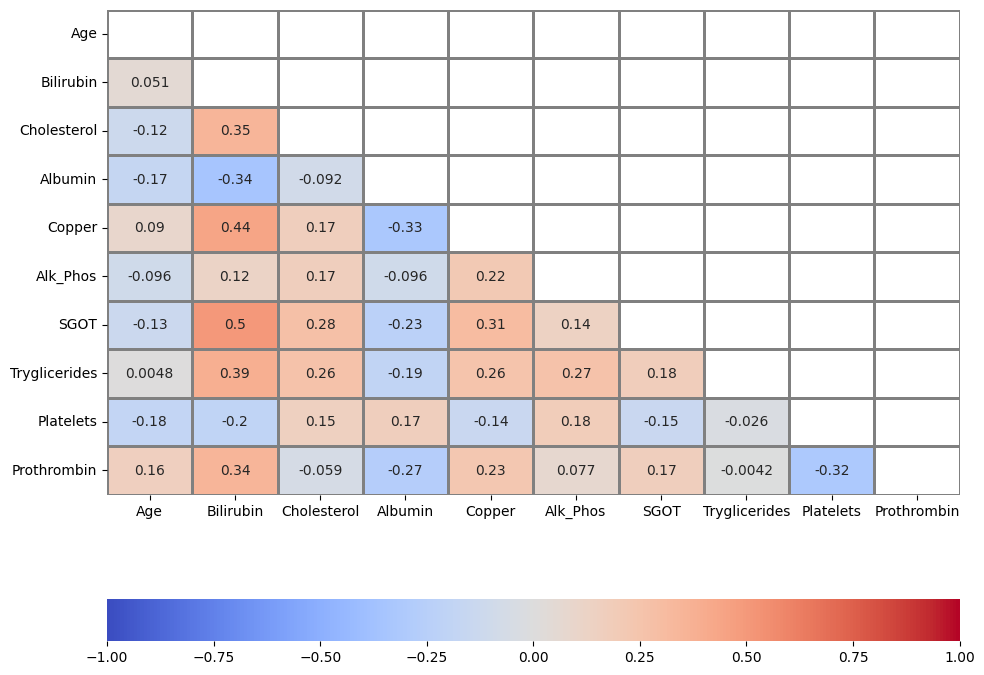

In [94]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cirrhosis_survival_X_train_imputed_numeric_correlation = cirrhosis_survival_X_train_imputed_numeric.corr()
mask = np.triu(cirrhosis_survival_X_train_imputed_numeric_correlation)
plot_correlation_matrix(cirrhosis_survival_X_train_imputed_numeric_correlation,mask)
plt.show()

In [95]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

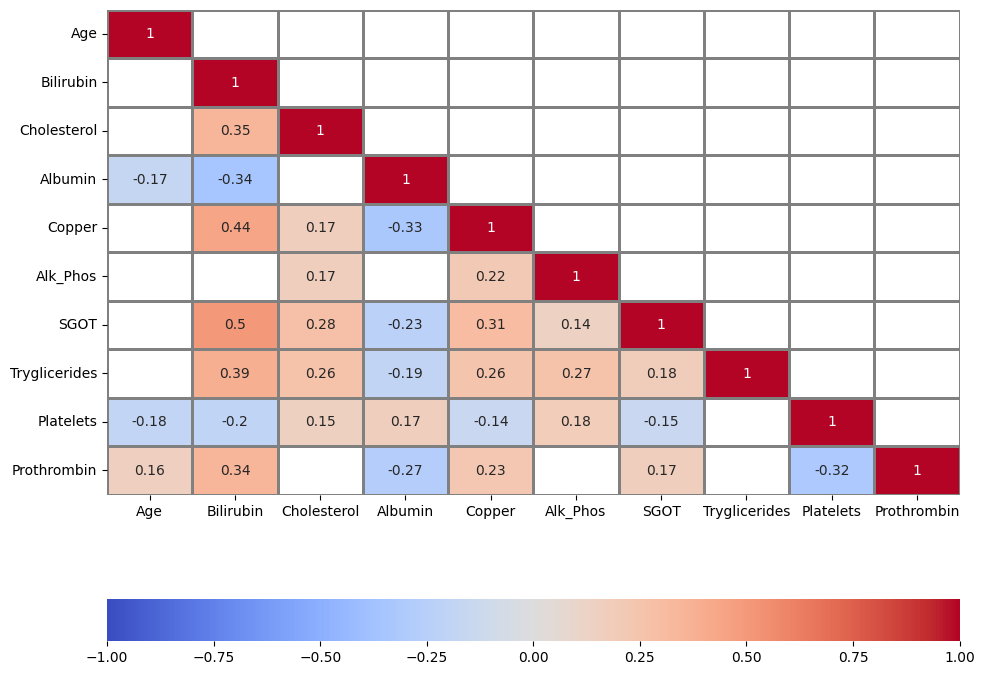

In [96]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cirrhosis_survival_X_train_imputed_numeric_correlation_p_values = correlation_significance(cirrhosis_survival_X_train_imputed_numeric)                     
mask = np.invert(np.tril(cirrhosis_survival_X_train_imputed_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cirrhosis_survival_X_train_imputed_numeric_correlation,mask)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A Yeo-Johnson transformation was applied to all numeric variables in the training subset to improve distributional shape.
2. Most variables in the training subset achieved symmetrical distributions with minimal outliers after transformation.
    * <span style="color: #FF0000">Cholesterol</span>: Outlier.Count = 9, Outlier.Ratio = 0.041, Skewness=-0.083
    * <span style="color: #FF0000">Albumin</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+0.006
    * <span style="color: #FF0000">Platelets</span>: Outlier.Count = 2, Outlier.Ratio = 0.009, Skewness=-0.019
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.223
    * <span style="color: #FF0000">Copper</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=-0.010
    * <span style="color: #FF0000">Alk_Phos</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.027
    * <span style="color: #FF0000">SGOT</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=-0.001
    * <span style="color: #FF0000">Tryglicerides</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.000
3. Outlier data in the testing subset for numeric variables will be treated with Yeo-Johnson transformation downstream using a pipeline involving the final preprocessing steps.


In [97]:
##################################
# Formulating a data subset containing
# variables with noted outliers
##################################
X_train_predictors_with_outliers = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
cirrhosis_survival_X_train_imputed_numeric_with_outliers = cirrhosis_survival_X_train_imputed_numeric[X_train_predictors_with_outliers]

In [98]:
##################################
# Conducting a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=False)
cirrhosis_survival_X_train_imputed_numeric_with_outliers_array = yeo_johnson_transformer.fit_transform(cirrhosis_survival_X_train_imputed_numeric_with_outliers)

In [99]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
cirrhosis_survival_X_train_transformed_numeric_with_outliers = pd.DataFrame(cirrhosis_survival_X_train_imputed_numeric_with_outliers_array,
                                                                            columns=cirrhosis_survival_X_train_imputed_numeric_with_outliers.columns)
cirrhosis_survival_X_train_transformed_numeric = pd.concat([cirrhosis_survival_X_train_imputed_numeric[['Age']],
                                                            cirrhosis_survival_X_train_transformed_numeric_with_outliers], 
                                                           axis=1)

In [100]:
cirrhosis_survival_X_train_transformed_numeric.head()

Age  Bilirubin  Cholesterol    Albumin    Copper  Alk_Phos      SGOT  \
0  13329   0.830251     1.528771  25.311621  4.367652  2.066062  7.115310   
1  12912   0.751147     1.535175  34.049208  6.244827  2.047167  7.303237   
2  17180   0.491099     1.523097  32.812930  5.320861  2.043970  7.278682   
3  17884   0.760957     1.505627  30.818146  5.264915  2.062590  7.170942   
4  15177   0.893603     1.519249  26.533792  6.440904  2.109170  8.385199   

   Tryglicerides  Platelets  Prothrombin  
0       3.357597  58.787709     0.236575  
1       3.581345  57.931137     0.236572  
2       2.990077  61.554228     0.236573  
3       3.288822  29.648190     0.236575  
4       3.284119  43.198326     0.236572

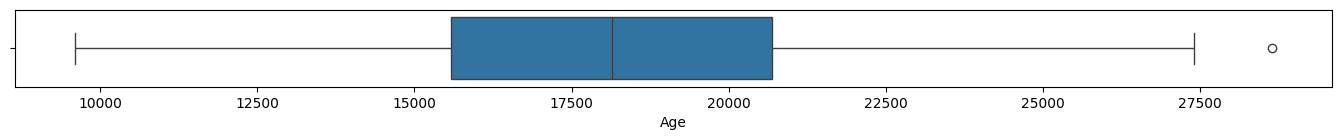

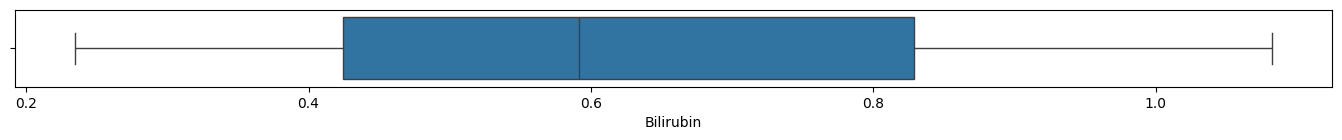

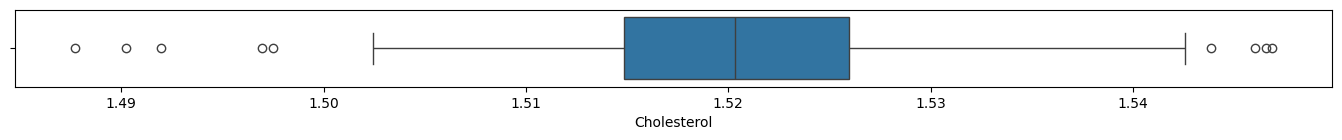

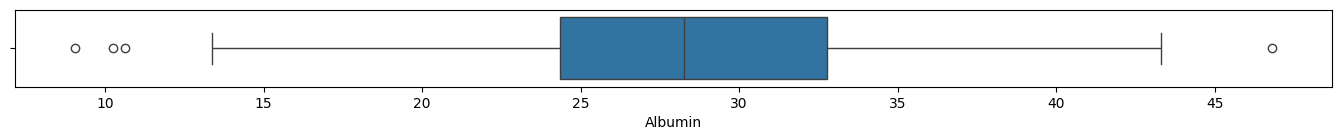

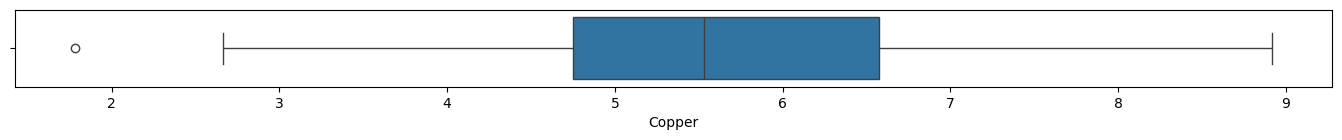

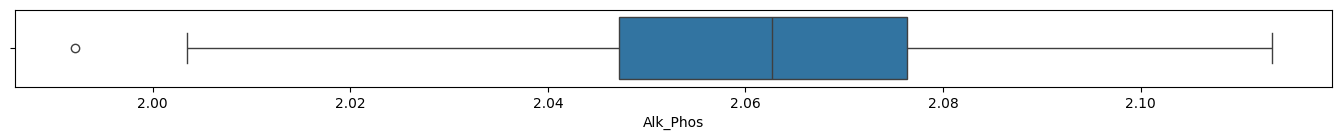

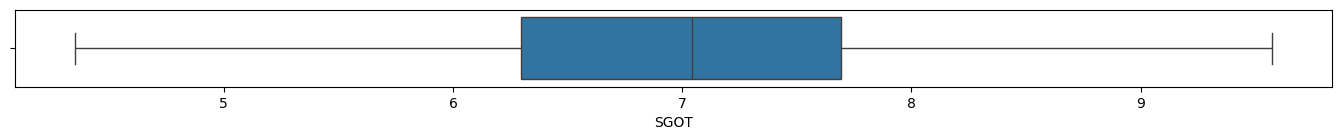

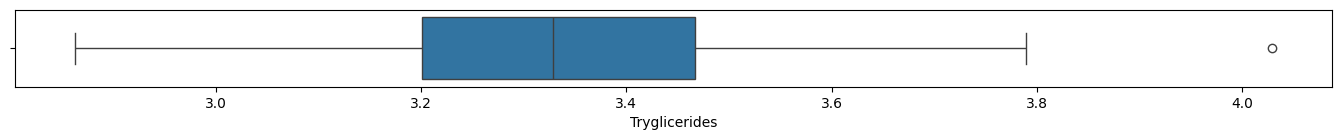

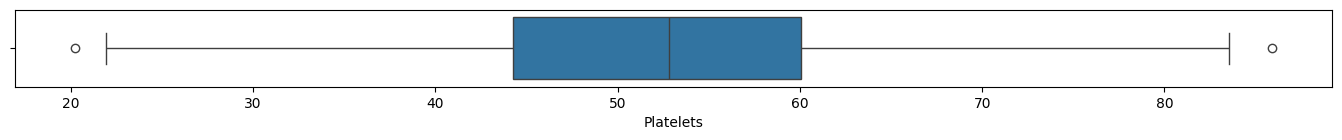

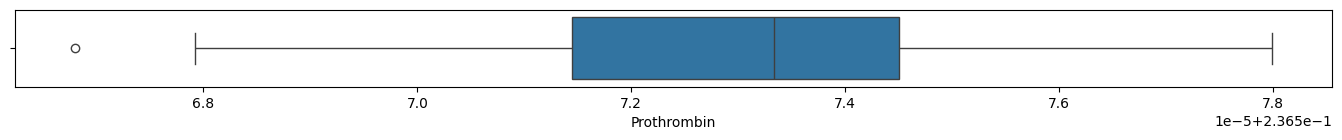

In [101]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cirrhosis_survival_X_train_transformed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cirrhosis_survival_X_train_transformed_numeric, x=column)

In [102]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
X_train_numeric_variable_name_list = list(cirrhosis_survival_X_train_transformed_numeric.columns)
X_train_numeric_skewness_list = cirrhosis_survival_X_train_transformed_numeric.skew()
cirrhosis_survival_X_train_transformed_numeric_q1 = cirrhosis_survival_X_train_transformed_numeric.quantile(0.25)
cirrhosis_survival_X_train_transformed_numeric_q3 = cirrhosis_survival_X_train_transformed_numeric.quantile(0.75)
cirrhosis_survival_X_train_transformed_numeric_iqr = cirrhosis_survival_X_train_transformed_numeric_q3 - cirrhosis_survival_X_train_transformed_numeric_q1
X_train_numeric_outlier_count_list = ((cirrhosis_survival_X_train_transformed_numeric < (cirrhosis_survival_X_train_transformed_numeric_q1 - 1.5 * cirrhosis_survival_X_train_transformed_numeric_iqr)) | (cirrhosis_survival_X_train_transformed_numeric > (cirrhosis_survival_X_train_transformed_numeric_q3 + 1.5 * cirrhosis_survival_X_train_transformed_numeric_iqr))).sum()
X_train_numeric_row_count_list = list([len(cirrhosis_survival_X_train_transformed_numeric)] * len(cirrhosis_survival_X_train_transformed_numeric.columns))
X_train_numeric_outlier_ratio_list = map(truediv, X_train_numeric_outlier_count_list, X_train_numeric_row_count_list)

X_train_numeric_column_outlier_summary = pd.DataFrame(zip(X_train_numeric_variable_name_list,
                                                          X_train_numeric_skewness_list,
                                                          X_train_numeric_outlier_count_list,
                                                          X_train_numeric_row_count_list,
                                                          X_train_numeric_outlier_ratio_list),                                                      
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(X_train_numeric_column_outlier_summary.sort_values(by=['Outlier.Count'], ascending=False))

Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio
2         Cholesterol -0.083072              9        218       0.041284
3             Albumin  0.006523              4        218       0.018349
8           Platelets -0.019323              2        218       0.009174
0                 Age  0.223080              1        218       0.004587
4              Copper -0.010240              1        218       0.004587
5            Alk_Phos  0.027977              1        218       0.004587
7       Tryglicerides -0.000881              1        218       0.004587
9         Prothrombin  0.000000              1        218       0.004587
1           Bilirubin  0.263101              0        218       0.000000
6                SGOT -0.008416              0        218       0.000000

### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables in the training subset were transformed using the standardization method to achieve a comparable scale between values.
2. Original data in the testing subset for numeric variables will be treated with standardization scaling downstream using a pipeline involving the final preprocessing steps.

In [103]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cirrhosis_survival_X_train_transformed_numeric_array = standardization_scaler.fit_transform(cirrhosis_survival_X_train_transformed_numeric)

In [104]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cirrhosis_survival_X_train_scaled_numeric = pd.DataFrame(cirrhosis_survival_X_train_transformed_numeric_array,
                                                         columns=cirrhosis_survival_X_train_transformed_numeric.columns)

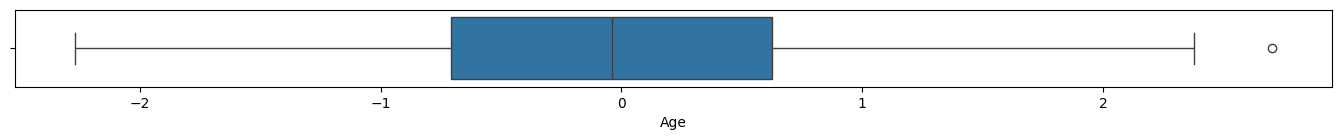

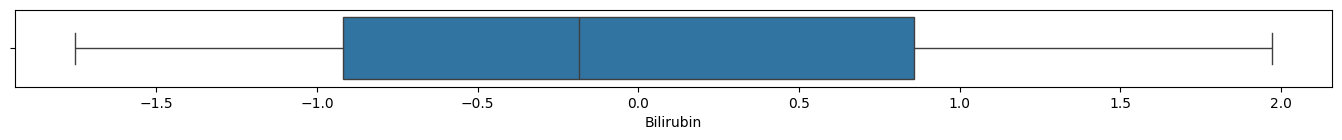

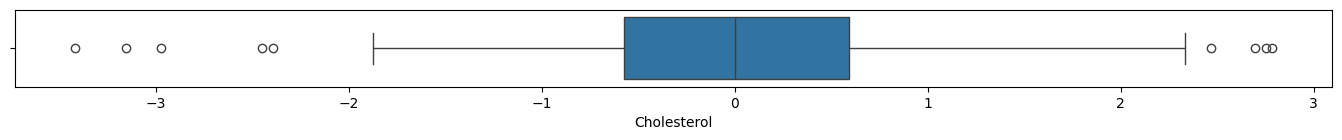

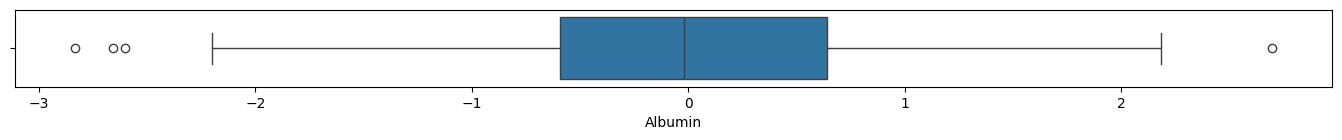

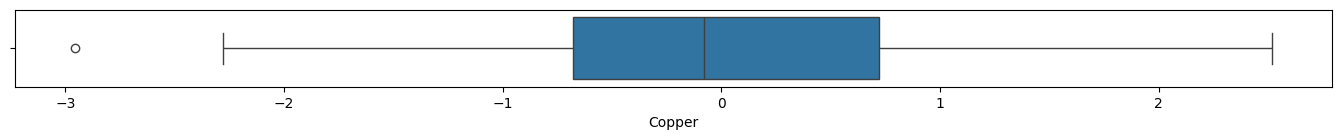

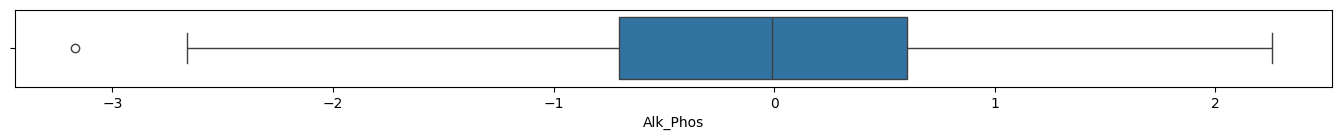

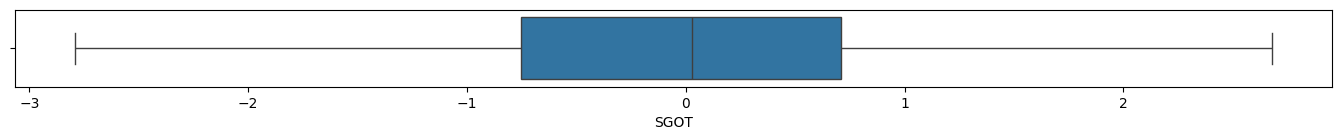

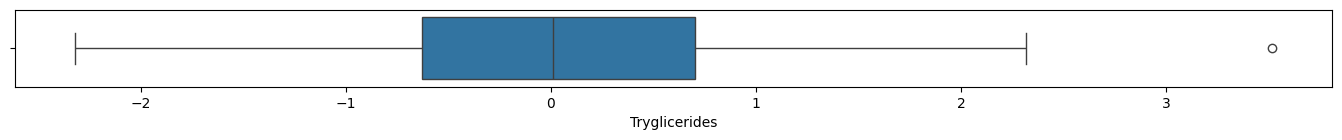

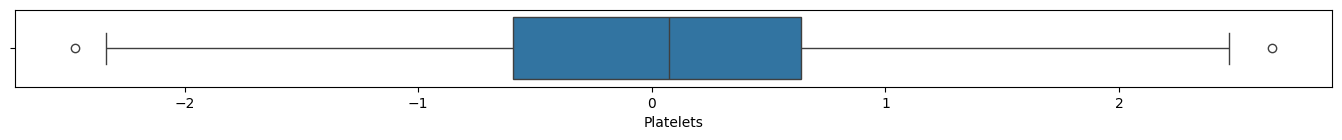

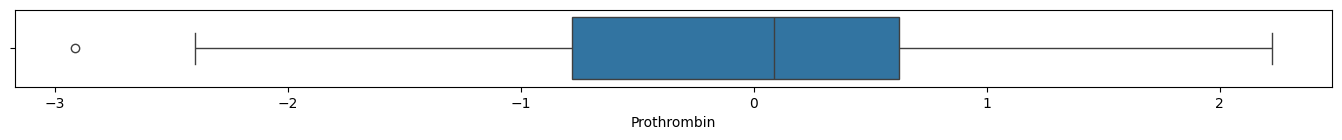

In [105]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cirrhosis_survival_X_train_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cirrhosis_survival_X_train_scaled_numeric, x=column)

### 1.4.7 Data Encoding <a class="anchor" id="1.4.7"></a>

1. Binary encoding was applied to the predictor object columns in the training subset:
    * <span style="color: #FF0000">Status</span>
    * <span style="color: #FF0000">Drug</span>
    * <span style="color: #FF0000">Sex</span>
    * <span style="color: #FF0000">Ascites</span>
    * <span style="color: #FF0000">Hepatomegaly</span>
    * <span style="color: #FF0000">Spiders</span>
    * <span style="color: #FF0000">Edema</span>
1. One-hot encoding was applied to the <span style="color: #FF0000">Stage</span> variable resulting to 4 additional columns in the training subset:
    * <span style="color: #FF0000">Stage_1.0</span>
    * <span style="color: #FF0000">Stage_2.0</span>
    * <span style="color: #FF0000">Stage_3.0</span>
    * <span style="color: #FF0000">Stage_4.0</span>
3. Original data in the testing subset for object variables will be treated with binary and one-hot encoding downstream using a pipeline involving the final preprocessing steps.

In [106]:
##################################
# Applying a binary encoding transformation
# for the two-level object columns
##################################
cirrhosis_survival_X_train_cleaned_object['Sex'] = cirrhosis_survival_X_train_cleaned_object['Sex'].replace({'M':0, 'F':1}) 
cirrhosis_survival_X_train_cleaned_object['Ascites'] = cirrhosis_survival_X_train_cleaned_object['Ascites'].replace({'N':0, 'Y':1}) 
cirrhosis_survival_X_train_cleaned_object['Drug'] = cirrhosis_survival_X_train_cleaned_object['Drug'].replace({'Placebo':0, 'D-penicillamine':1}) 
cirrhosis_survival_X_train_cleaned_object['Hepatomegaly'] = cirrhosis_survival_X_train_cleaned_object['Hepatomegaly'].replace({'N':0, 'Y':1}) 
cirrhosis_survival_X_train_cleaned_object['Spiders'] = cirrhosis_survival_X_train_cleaned_object['Spiders'].replace({'N':0, 'Y':1}) 
cirrhosis_survival_X_train_cleaned_object['Edema'] = cirrhosis_survival_X_train_cleaned_object['Edema'].replace({'N':0, 'Y':1, 'S':1}) 

In [107]:
##################################
# Formulating the multi-level object column stage
# for encoding transformation
##################################
cirrhosis_survival_X_train_cleaned_object_stage_encoded = pd.DataFrame(cirrhosis_survival_X_train_cleaned_object.loc[:, 'Stage'].to_list(),
                                                                       columns=['Stage'])

In [108]:
##################################
# Applying a one-hot encoding transformation
# for the multi-level object column stage
##################################
cirrhosis_survival_X_train_cleaned_object_stage_encoded = pd.get_dummies(cirrhosis_survival_X_train_cleaned_object_stage_encoded, columns=['Stage'])

In [109]:
##################################
# Applying a one-hot encoding transformation
# for the multi-level object column stage
##################################
cirrhosis_survival_X_train_cleaned_encoded_object = pd.concat([cirrhosis_survival_X_train_cleaned_object.drop(['Stage'], axis=1), 
                                                               cirrhosis_survival_X_train_cleaned_object_stage_encoded], axis=1)
cirrhosis_survival_X_train_cleaned_encoded_object.head()

Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema  Stage_1.0  Stage_2.0  \
0     1    1        0             0        0      0      False       True   
1     1    0        0             0        0      0      False      False   
2     1    1        0             0        0      0      False       True   
3     0    1        1             1        1      1      False      False   
4     0    1        0             1        0      0      False       True   

   Stage_3.0  Stage_4.0  
0      False      False  
1       True      False  
2      False      False  
3      False       True  
4      False      False

### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. A preprocessing pipeline was formulated to standardize the data transformation methods applied to both the training and testing subsets.
2. The preprocessed training subset is comprised of:
    * **218 rows** (observations)
    * **22 columns** (variables)
        * **2/22 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/22 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **10/22 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_1.0</span>
             * <span style="color: #FF0000">Stage_2.0</span>
             * <span style="color: #FF0000">Stage_3.0</span>
             * <span style="color: #FF0000">Stage_4.0</span>
3. The preprocessed testing subset is comprised of:
    * **94 rows** (observations)
    * **22 columns** (variables)
        * **2/22 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/22 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **10/22 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_1.0</span>
             * <span style="color: #FF0000">Stage_2.0</span>
             * <span style="color: #FF0000">Stage_3.0</span>
             * <span style="color: #FF0000">Stage_4.0</span>

In [110]:
##################################
# Consolidating all preprocessed
# numeric and object predictors
# for the training subset
##################################
cirrhosis_survival_X_train_preprocessed = pd.concat([cirrhosis_survival_X_train_scaled_numeric,
                                                     cirrhosis_survival_X_train_cleaned_encoded_object], 
                                                     axis=1)
cirrhosis_survival_X_train_preprocessed.head()

Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0 -1.296446   0.863802     0.885512 -0.451884 -0.971563  0.140990  0.104609   
1 -1.405311   0.516350     1.556983  0.827618  0.468389 -0.705337  0.301441   
2 -0.291081  -0.625875     0.290561  0.646582 -0.240371 -0.848544  0.275723   
3 -0.107291   0.559437    -1.541148  0.354473 -0.283286 -0.014525  0.162878   
4 -0.813996   1.142068    -0.112859 -0.272913  0.618797  2.071847  1.434674   

   Tryglicerides  Platelets  Prothrombin  Drug  Sex  Ascites  Hepatomegaly  \
0       0.155256   0.539120     0.747580     1    1        0             0   
1       1.275281   0.472266    -0.315794     1    0        0             0   
2      -1.684460   0.755044     0.087130     1    1        0             0   
3      -0.189015  -1.735183     0.649171     0    1        1             1   
4      -0.212560  -0.677612    -0.315794     0    1        0             1   

   Spiders  Edema  Stage_1.0  Stage_2.0  Stage_3.0  Stage_4.0  
0        0      0      False       True      False      False  
1        0      0      False      False       True      False  
2        0      0      False       True      False      False  
3        1      1      False      False      False       True  
4        0      0      False       True      False      False

In [111]:
##################################
# Creating a pre-processing pipeline
# for numeric predictors
##################################
cirrhosis_survival_numeric_predictors = ['Age', 'Bilirubin','Cholesterol', 'Albumin','Copper', 'Alk_Phos','SGOT', 'Tryglicerides','Platelets', 'Prothrombin']
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator = lr,
                                 max_iter = 10,
                                 tol = 1e-10,
                                 imputation_order = 'ascending',
                                 random_state=88888888)),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson',
                                    standardize=False)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, cirrhosis_survival_numeric_predictors)])

In [112]:
##################################
# Fitting and transforming 
# training subset numeric predictors
##################################
cirrhosis_survival_X_train_numeric_preprocessed = preprocessor.fit_transform(cirrhosis_survival_X_train_cleaned)
cirrhosis_survival_X_train_numeric_preprocessed = pd.DataFrame(cirrhosis_survival_X_train_numeric_preprocessed,
                                                                columns=cirrhosis_survival_numeric_predictors)
cirrhosis_survival_X_train_numeric_preprocessed.head()

Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0 -1.342097   0.863802     0.886087 -0.451884 -0.972098  0.140990  0.104609   
1 -1.470901   0.516350     1.554523  0.827618  0.467579 -0.705337  0.301441   
2 -0.239814  -0.625875     0.293280  0.646582 -0.241205 -0.848544  0.275723   
3 -0.052733   0.559437    -1.534283  0.354473 -0.284113 -0.014525  0.162878   
4 -0.795010   1.142068    -0.108933 -0.272913  0.618030  2.071847  1.434674   

   Tryglicerides  Platelets  Prothrombin  
0       0.155130   0.540960     0.747580  
1       1.275222   0.474140    -0.315794  
2      -1.684460   0.756741     0.087130  
3      -0.189139  -1.735375     0.649171  
4      -0.212684  -0.675951    -0.315794

In [113]:
##################################
# Performing pre-processing operations
# for object predictors
# in the training subset
##################################
cirrhosis_survival_object_predictors = ['Drug', 'Sex','Ascites', 'Hepatomegaly','Spiders', 'Edema','Stage']
cirrhosis_survival_X_train_object = cirrhosis_survival_X_train_cleaned.copy()
cirrhosis_survival_X_train_object = cirrhosis_survival_X_train_object[cirrhosis_survival_object_predictors]
cirrhosis_survival_X_train_object.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_object.head()

Drug Sex Ascites Hepatomegaly Spiders Edema Stage
0  D-penicillamine   F       N            N       N     N   2.0
1  D-penicillamine   M       N            N       N     N   3.0
2  D-penicillamine   F       N            N       N     N   2.0
3          Placebo   F       Y            Y       Y     Y   4.0
4          Placebo   F       N            Y       N     N   2.0

In [114]:
##################################
# Applying a binary encoding transformation
# for the two-level object columns
# in the training subset
##################################
cirrhosis_survival_X_train_object['Sex'].replace({'M':0, 'F':1}, inplace=True) 
cirrhosis_survival_X_train_object['Ascites'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_train_object['Drug'].replace({'Placebo':0, 'D-penicillamine':1}, inplace=True) 
cirrhosis_survival_X_train_object['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_train_object['Spiders'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_train_object['Edema'].replace({'N':0, 'Y':1, 'S':1}, inplace=True) 
cirrhosis_survival_X_train_object_stage_encoded = pd.DataFrame(cirrhosis_survival_X_train_object.loc[:, 'Stage'].to_list(),
                                                                       columns=['Stage'])
cirrhosis_survival_X_train_object_stage_encoded = pd.get_dummies(cirrhosis_survival_X_train_object_stage_encoded, columns=['Stage'])
cirrhosis_survival_X_train_object_preprocessed = pd.concat([cirrhosis_survival_X_train_object.drop(['Stage'], axis=1), 
                                                            cirrhosis_survival_X_train_object_stage_encoded], 
                                                           axis=1)
cirrhosis_survival_X_train_object_preprocessed.head()

Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema  Stage_1.0  Stage_2.0  \
0     1    1        0             0        0      0      False       True   
1     1    0        0             0        0      0      False      False   
2     1    1        0             0        0      0      False       True   
3     0    1        1             1        1      1      False      False   
4     0    1        0             1        0      0      False       True   

   Stage_3.0  Stage_4.0  
0      False      False  
1       True      False  
2      False      False  
3      False       True  
4      False      False

In [115]:
##################################
# Consolidating the preprocessed
# training subset
##################################
cirrhosis_survival_X_train_preprocessed = pd.concat([cirrhosis_survival_X_train_numeric_preprocessed, cirrhosis_survival_X_train_object_preprocessed], 
                                                    axis=1)
cirrhosis_survival_X_train_preprocessed.head()

Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0 -1.342097   0.863802     0.886087 -0.451884 -0.972098  0.140990  0.104609   
1 -1.470901   0.516350     1.554523  0.827618  0.467579 -0.705337  0.301441   
2 -0.239814  -0.625875     0.293280  0.646582 -0.241205 -0.848544  0.275723   
3 -0.052733   0.559437    -1.534283  0.354473 -0.284113 -0.014525  0.162878   
4 -0.795010   1.142068    -0.108933 -0.272913  0.618030  2.071847  1.434674   

   Tryglicerides  Platelets  Prothrombin  Drug  Sex  Ascites  Hepatomegaly  \
0       0.155130   0.540960     0.747580     1    1        0             0   
1       1.275222   0.474140    -0.315794     1    0        0             0   
2      -1.684460   0.756741     0.087130     1    1        0             0   
3      -0.189139  -1.735375     0.649171     0    1        1             1   
4      -0.212684  -0.675951    -0.315794     0    1        0             1   

   Spiders  Edema  Stage_1.0  Stage_2.0  Stage_3.0  Stage_4.0  
0        0      0      False       True      False      False  
1        0      0      False      False       True      False  
2        0      0      False       True      False      False  
3        1      1      False      False      False       True  
4        0      0      False       True      False      False

In [116]:
##################################
# Verifying the dimensions of the
# preprocessed training subset
##################################
cirrhosis_survival_X_train_preprocessed.shape

(218, 20)

In [117]:
##################################
# Fitting and transforming 
# testing subset numeric predictors
##################################
cirrhosis_survival_X_test_numeric_preprocessed = preprocessor.transform(cirrhosis_survival_X_test_cleaned)
cirrhosis_survival_X_test_numeric_preprocessed = pd.DataFrame(cirrhosis_survival_X_test_numeric_preprocessed,
                                                                columns=cirrhosis_survival_numeric_predictors)
cirrhosis_survival_X_test_numeric_preprocessed.head()

Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0  1.043704   0.744396     0.922380  0.240951  0.045748  0.317282 -0.078335   
1 -1.936476  -0.764558     0.160096 -0.600950 -0.179138 -0.245613  0.472422   
2 -1.749033   0.371523     0.558115  0.646582 -0.159024  0.339454  0.685117   
3 -0.485150  -0.918484    -0.690904  1.629765  0.028262  1.713791 -1.387751   
4 -0.815655   1.286438     2.610501 -0.722153  0.210203  0.602860  3.494936   

   Tryglicerides  Platelets  Prothrombin  
0       2.671950   1.654815    -0.948196  
1      -0.359800   0.348533     0.439089  
2      -3.109146  -0.790172    -0.617113  
3       0.155130   0.679704     0.087130  
4      -0.053214  -0.475634    -1.714435

In [118]:
##################################
# Performing pre-processing operations
# for object predictors
# in the testing subset
##################################
cirrhosis_survival_object_predictors = ['Drug', 'Sex','Ascites', 'Hepatomegaly','Spiders', 'Edema','Stage']
cirrhosis_survival_X_test_object = cirrhosis_survival_X_test_cleaned.copy()
cirrhosis_survival_X_test_object = cirrhosis_survival_X_test_object[cirrhosis_survival_object_predictors]
cirrhosis_survival_X_test_object.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_test_object.head()

Drug Sex Ascites Hepatomegaly Spiders Edema Stage
0  D-penicillamine   F       N            N       Y     S   3.0
1          Placebo   F       N            N       N     N   4.0
2  D-penicillamine   F       N            Y       N     N   4.0
3  D-penicillamine   M       N            N       N     N   1.0
4          Placebo   F       N            Y       N     N   2.0

In [119]:
##################################
# Applying a binary encoding transformation
# for the two-level object columns
# in the testing subset
##################################
cirrhosis_survival_X_test_object['Sex'].replace({'M':0, 'F':1}, inplace=True) 
cirrhosis_survival_X_test_object['Ascites'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_test_object['Drug'].replace({'Placebo':0, 'D-penicillamine':1}, inplace=True) 
cirrhosis_survival_X_test_object['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_test_object['Spiders'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_test_object['Edema'].replace({'N':0, 'Y':1, 'S':1}, inplace=True) 
cirrhosis_survival_X_test_object_stage_encoded = pd.DataFrame(cirrhosis_survival_X_test_object.loc[:, 'Stage'].to_list(),
                                                                       columns=['Stage'])
cirrhosis_survival_X_test_object_stage_encoded = pd.get_dummies(cirrhosis_survival_X_test_object_stage_encoded, columns=['Stage'])
cirrhosis_survival_X_test_object_preprocessed = pd.concat([cirrhosis_survival_X_test_object.drop(['Stage'], axis=1), 
                                                            cirrhosis_survival_X_test_object_stage_encoded], 
                                                           axis=1)
cirrhosis_survival_X_test_object_preprocessed.head()

Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema  Stage_1.0  Stage_2.0  \
0     1    1        0             0        1      1      False      False   
1     0    1        0             0        0      0      False      False   
2     1    1        0             1        0      0      False      False   
3     1    0        0             0        0      0       True      False   
4     0    1        0             1        0      0      False       True   

   Stage_3.0  Stage_4.0  
0       True      False  
1      False       True  
2      False       True  
3      False      False  
4      False      False

In [120]:
##################################
# Consolidating the preprocessed
# testing subset
##################################
cirrhosis_survival_X_test_preprocessed = pd.concat([cirrhosis_survival_X_test_numeric_preprocessed, cirrhosis_survival_X_test_object_preprocessed], 
                                                    axis=1)
cirrhosis_survival_X_test_preprocessed.head()

Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0  1.043704   0.744396     0.922380  0.240951  0.045748  0.317282 -0.078335   
1 -1.936476  -0.764558     0.160096 -0.600950 -0.179138 -0.245613  0.472422   
2 -1.749033   0.371523     0.558115  0.646582 -0.159024  0.339454  0.685117   
3 -0.485150  -0.918484    -0.690904  1.629765  0.028262  1.713791 -1.387751   
4 -0.815655   1.286438     2.610501 -0.722153  0.210203  0.602860  3.494936   

   Tryglicerides  Platelets  Prothrombin  Drug  Sex  Ascites  Hepatomegaly  \
0       2.671950   1.654815    -0.948196     1    1        0             0   
1      -0.359800   0.348533     0.439089     0    1        0             0   
2      -3.109146  -0.790172    -0.617113     1    1        0             1   
3       0.155130   0.679704     0.087130     1    0        0             0   
4      -0.053214  -0.475634    -1.714435     0    1        0             1   

   Spiders  Edema  Stage_1.0  Stage_2.0  Stage_3.0  Stage_4.0  
0        1      1      False      False       True      False  
1        0      0      False      False      False       True  
2        0      0      False      False      False       True  
3        0      0       True      False      False      False  
4        0      0      False       True      False      False

In [121]:
##################################
# Verifying the dimensions of the
# preprocessed testing subset
##################################
cirrhosis_survival_X_test_preprocessed.shape

(94, 20)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. The estimated baseline survival plot indicated a 50% survival rate at <span style="color: #FF0000">N_Days=3358</span>.
2. Bivariate analysis identified individual predictors with potential association to the event status based on visual inspection.
    * Higher values for the following numeric predictors are associated with <span style="color: #FF0000">Status=True</span>: 
        * <span style="color: #FF0000">Age</span>
        * <span style="color: #FF0000">Bilirubin</span>   
        * <span style="color: #FF0000">Copper</span>
        * <span style="color: #FF0000">Alk_Phos</span> 
        * <span style="color: #FF0000">SGOT</span>   
        * <span style="color: #FF0000">Tryglicerides</span> 
        * <span style="color: #FF0000">Prothrombin</span>    
    * Higher counts for the following object predictors are associated with better differentiation between <span style="color: #FF0000">Status=True</span> and <span style="color: #FF0000">Status=False</span>:  
        * <span style="color: #FF0000">Drug</span>
        * <span style="color: #FF0000">Sex</span>
        * <span style="color: #FF0000">Ascites</span>
        * <span style="color: #FF0000">Hepatomegaly</span>
        * <span style="color: #FF0000">Spiders</span>
        * <span style="color: #FF0000">Edema</span>
        * <span style="color: #FF0000">Stage_1.0</span>
        * <span style="color: #FF0000">Stage_2.0</span>
        * <span style="color: #FF0000">Stage_3.0</span>
        * <span style="color: #FF0000">Stage_4.0</span>
2. Bivariate analysis identified individual predictors with potential association to the survival time based on visual inspection.
    * Higher values for the following numeric predictors are positively associated with <span style="color: #FF0000">N_Days</span>: 
        * <span style="color: #FF0000">Albumin</span>        
        * <span style="color: #FF0000">Platelets</span>
    * Levels for the following object predictors are associated with differences in <span style="color: #FF0000">N_Days</span> between <span style="color: #FF0000">Status=True</span> and <span style="color: #FF0000">Status=False</span>:  
        * <span style="color: #FF0000">Drug</span>
        * <span style="color: #FF0000">Sex</span>
        * <span style="color: #FF0000">Ascites</span>
        * <span style="color: #FF0000">Hepatomegaly</span>
        * <span style="color: #FF0000">Spiders</span>
        * <span style="color: #FF0000">Edema</span>
        * <span style="color: #FF0000">Stage_1.0</span>
        * <span style="color: #FF0000">Stage_2.0</span>
        * <span style="color: #FF0000">Stage_3.0</span>
        * <span style="color: #FF0000">Stage_4.0</span>

In [122]:
##################################
# Formulating a complete dataframe
# from the training subset for EDA
##################################
cirrhosis_survival_y_train_cleaned.reset_index(drop=True, inplace=True)
cirrhosis_survival_train_EDA = pd.concat([cirrhosis_survival_y_train_cleaned,
                                          cirrhosis_survival_X_train_preprocessed],
                                         axis=1)
cirrhosis_survival_train_EDA.head()

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0   False    2475 -1.342097   0.863802     0.886087 -0.451884 -0.972098   
1   False     877 -1.470901   0.516350     1.554523  0.827618  0.467579   
2   False    3050 -0.239814  -0.625875     0.293280  0.646582 -0.241205   
3    True     110 -0.052733   0.559437    -1.534283  0.354473 -0.284113   
4    True    3839 -0.795010   1.142068    -0.108933 -0.272913  0.618030   

   Alk_Phos      SGOT  Tryglicerides  ...  Drug  Sex  Ascites  Hepatomegaly  \
0  0.140990  0.104609       0.155130  ...     1    1        0             0   
1 -0.705337  0.301441       1.275222  ...     1    0        0             0   
2 -0.848544  0.275723      -1.684460  ...     1    1        0             0   
3 -0.014525  0.162878      -0.189139  ...     0    1        1             1   
4  2.071847  1.434674      -0.212684  ...     0    1        0             1   

   Spiders  Edema  Stage_1.0  Stage_2.0  Stage_3.0  Stage_4.0  
0        0      0      False       True      False      False  
1        0      0      False      False       True      False  
2        0      0      False       True      False      False  
3        1      1      False      False      False       True  
4        0      0      False       True      False      False  

[5 rows x 22 columns]

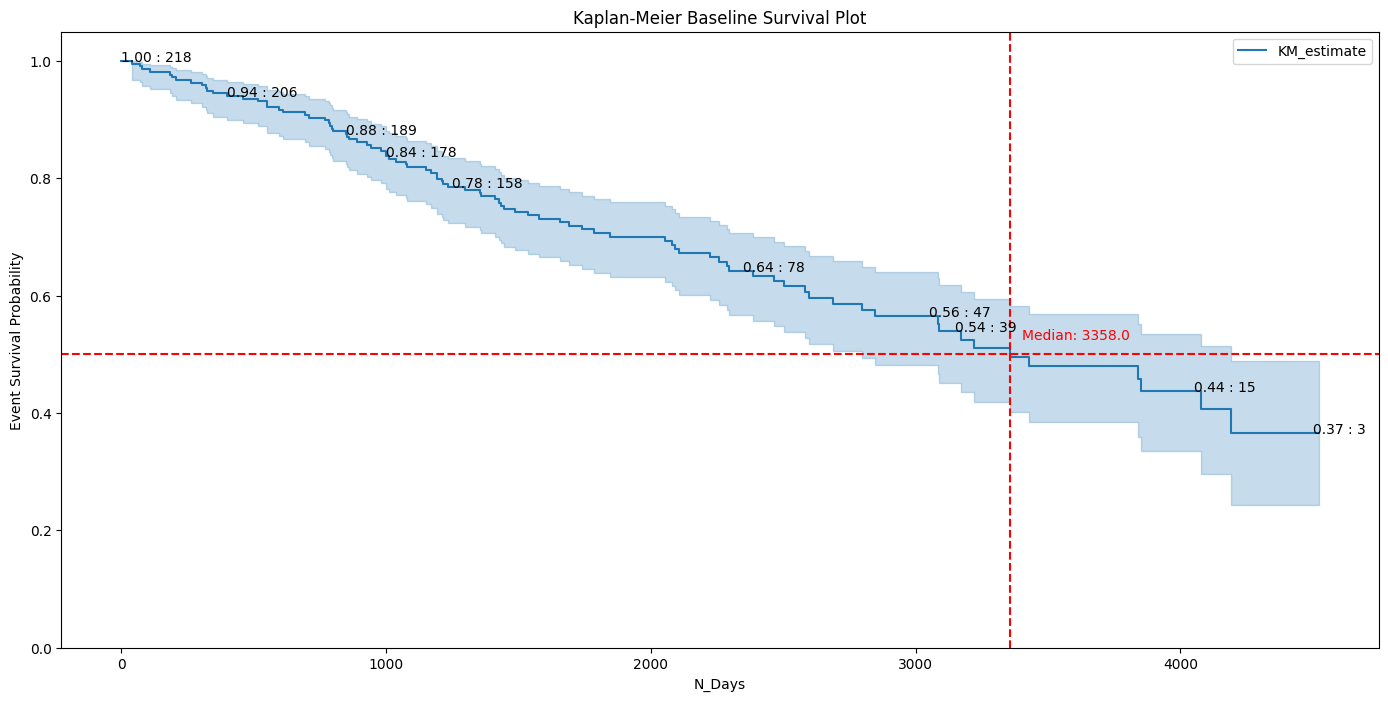

In [123]:
##################################
# Plotting the baseline survival curve
# and computing the survival rates
##################################
kmf = KaplanMeierFitter()
kmf.fit(durations=cirrhosis_survival_train_EDA['N_Days'], event_observed=cirrhosis_survival_train_EDA['Status'])
plt.figure(figsize=(17, 8))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Baseline Survival Plot')
plt.ylim(0, 1.05)
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')

##################################
# Determing the at-risk numbers
##################################
at_risk_counts = kmf.event_table.at_risk
survival_probabilities = kmf.survival_function_.values.flatten()
time_points = kmf.survival_function_.index
for time, prob, at_risk in zip(time_points, survival_probabilities, at_risk_counts):
    if time % 50 == 0: 
        plt.text(time, prob, f'{prob:.2f} : {at_risk}', ha='left', fontsize=10)
median_survival_time = kmf.median_survival_time_
plt.axvline(x=median_survival_time, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.text(3400, 0.52, f'Median: {median_survival_time}', ha='left', va='bottom', color='r', fontsize=10)
plt.show()

In [124]:
##################################
# Computing the median survival time
##################################
median_survival_time = kmf.median_survival_time_
print(f'Median Survival Time: {median_survival_time}')

Median Survival Time: 3358.0


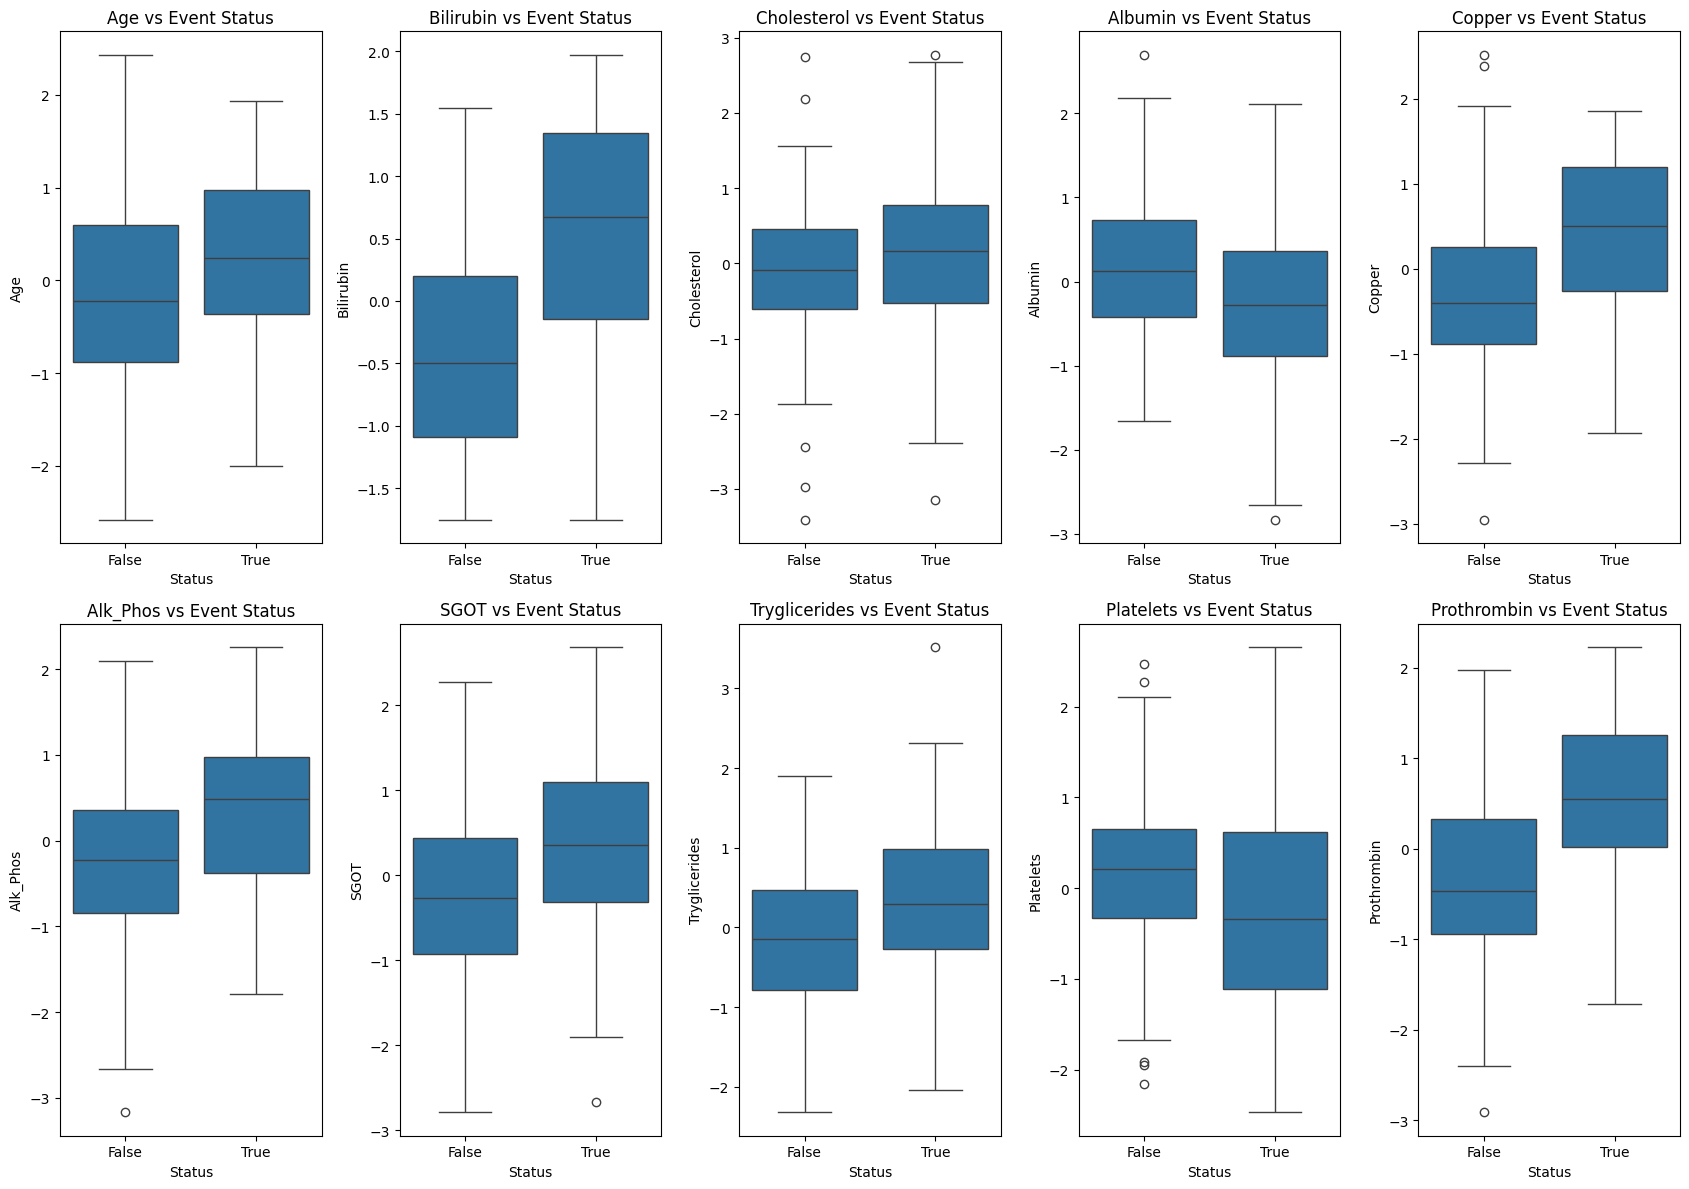

In [125]:
##################################
# Exploring the relationships between
# the numeric predictors and event status
##################################
cirrhosis_survival_numeric_predictors = ['Age', 'Bilirubin','Cholesterol', 'Albumin','Copper', 'Alk_Phos','SGOT', 'Tryglicerides','Platelets', 'Prothrombin']
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.boxplot(x='Status', y=cirrhosis_survival_numeric_predictors[i-1], data=cirrhosis_survival_train_EDA)
    plt.title(f'{cirrhosis_survival_numeric_predictors[i-1]} vs Event Status')
plt.tight_layout()
plt.show()

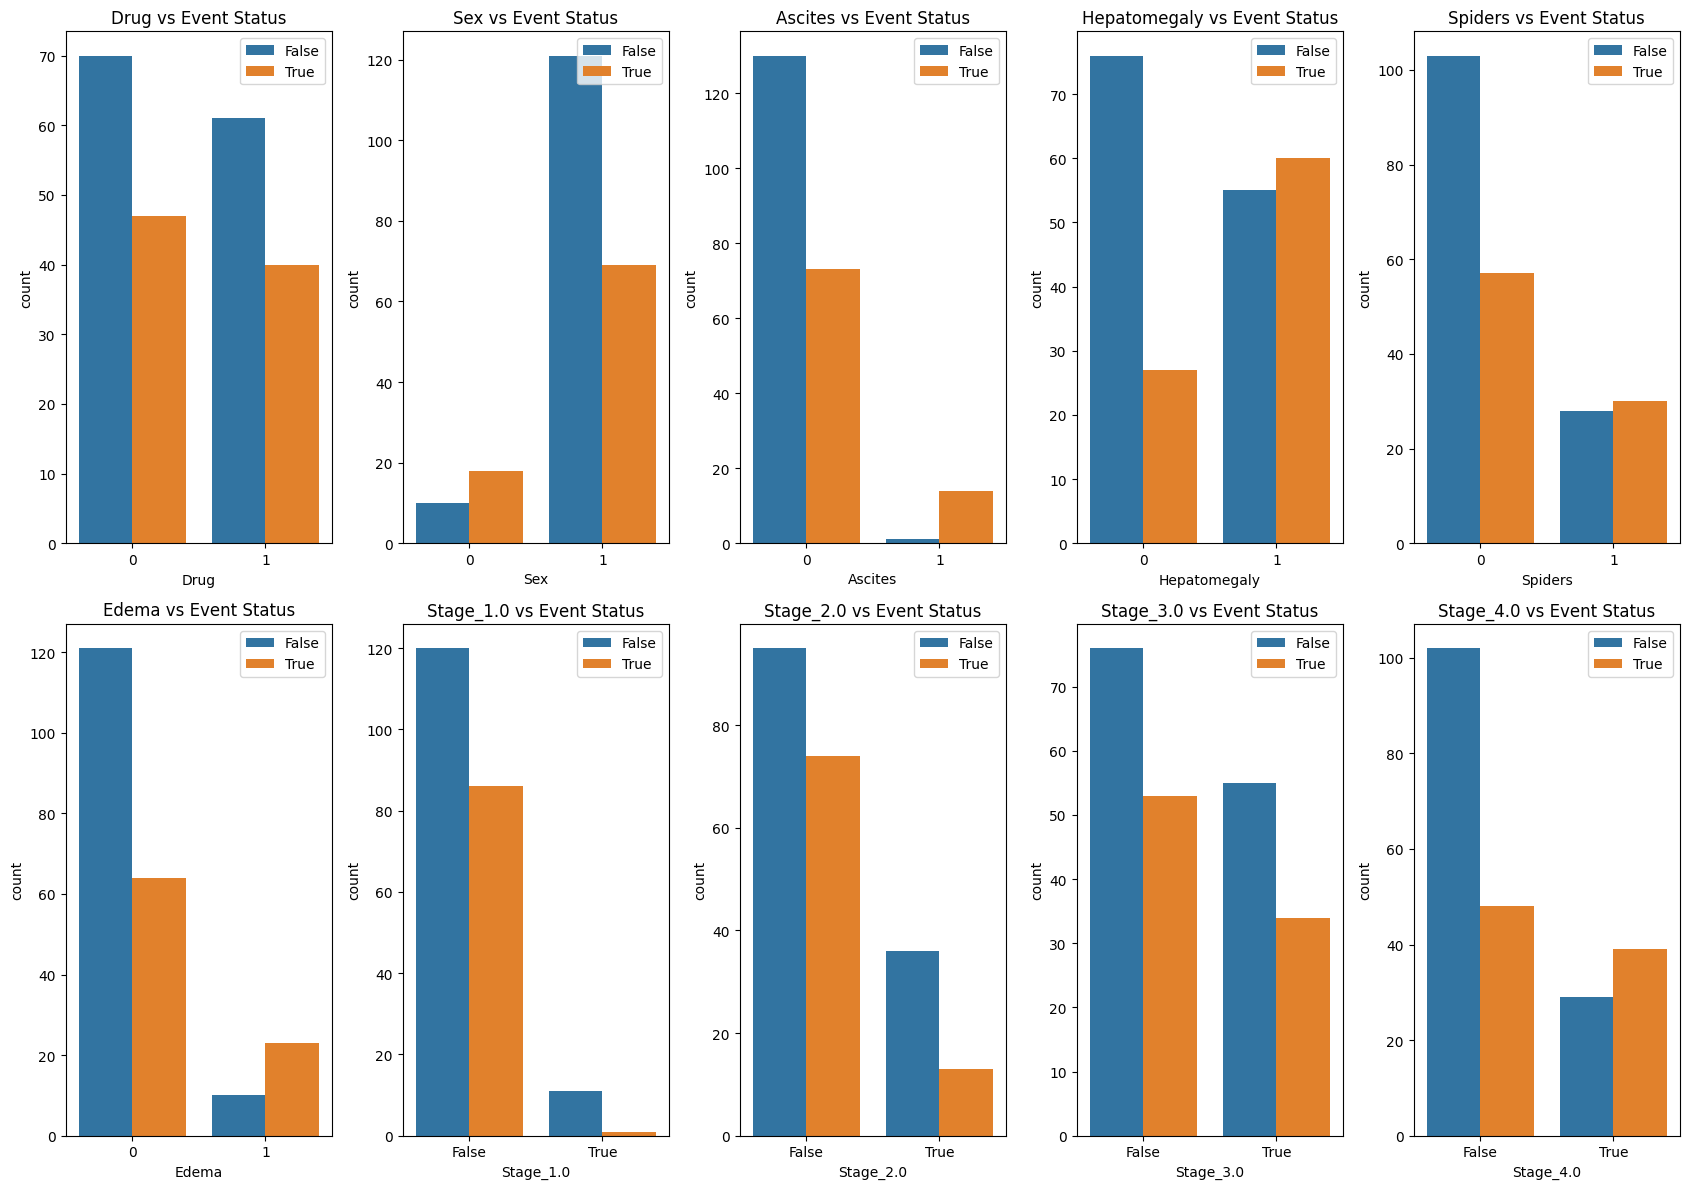

In [126]:
##################################
# Exploring the relationships between
# the object predictors and event status
##################################
cirrhosis_survival_object_predictors = ['Drug', 'Sex','Ascites', 'Hepatomegaly','Spiders', 'Edema','Stage_1.0','Stage_2.0','Stage_3.0','Stage_4.0']
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.countplot(x=cirrhosis_survival_object_predictors[i-1], hue='Status', data=cirrhosis_survival_train_EDA)
    plt.title(f'{cirrhosis_survival_object_predictors[i-1]} vs Event Status')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

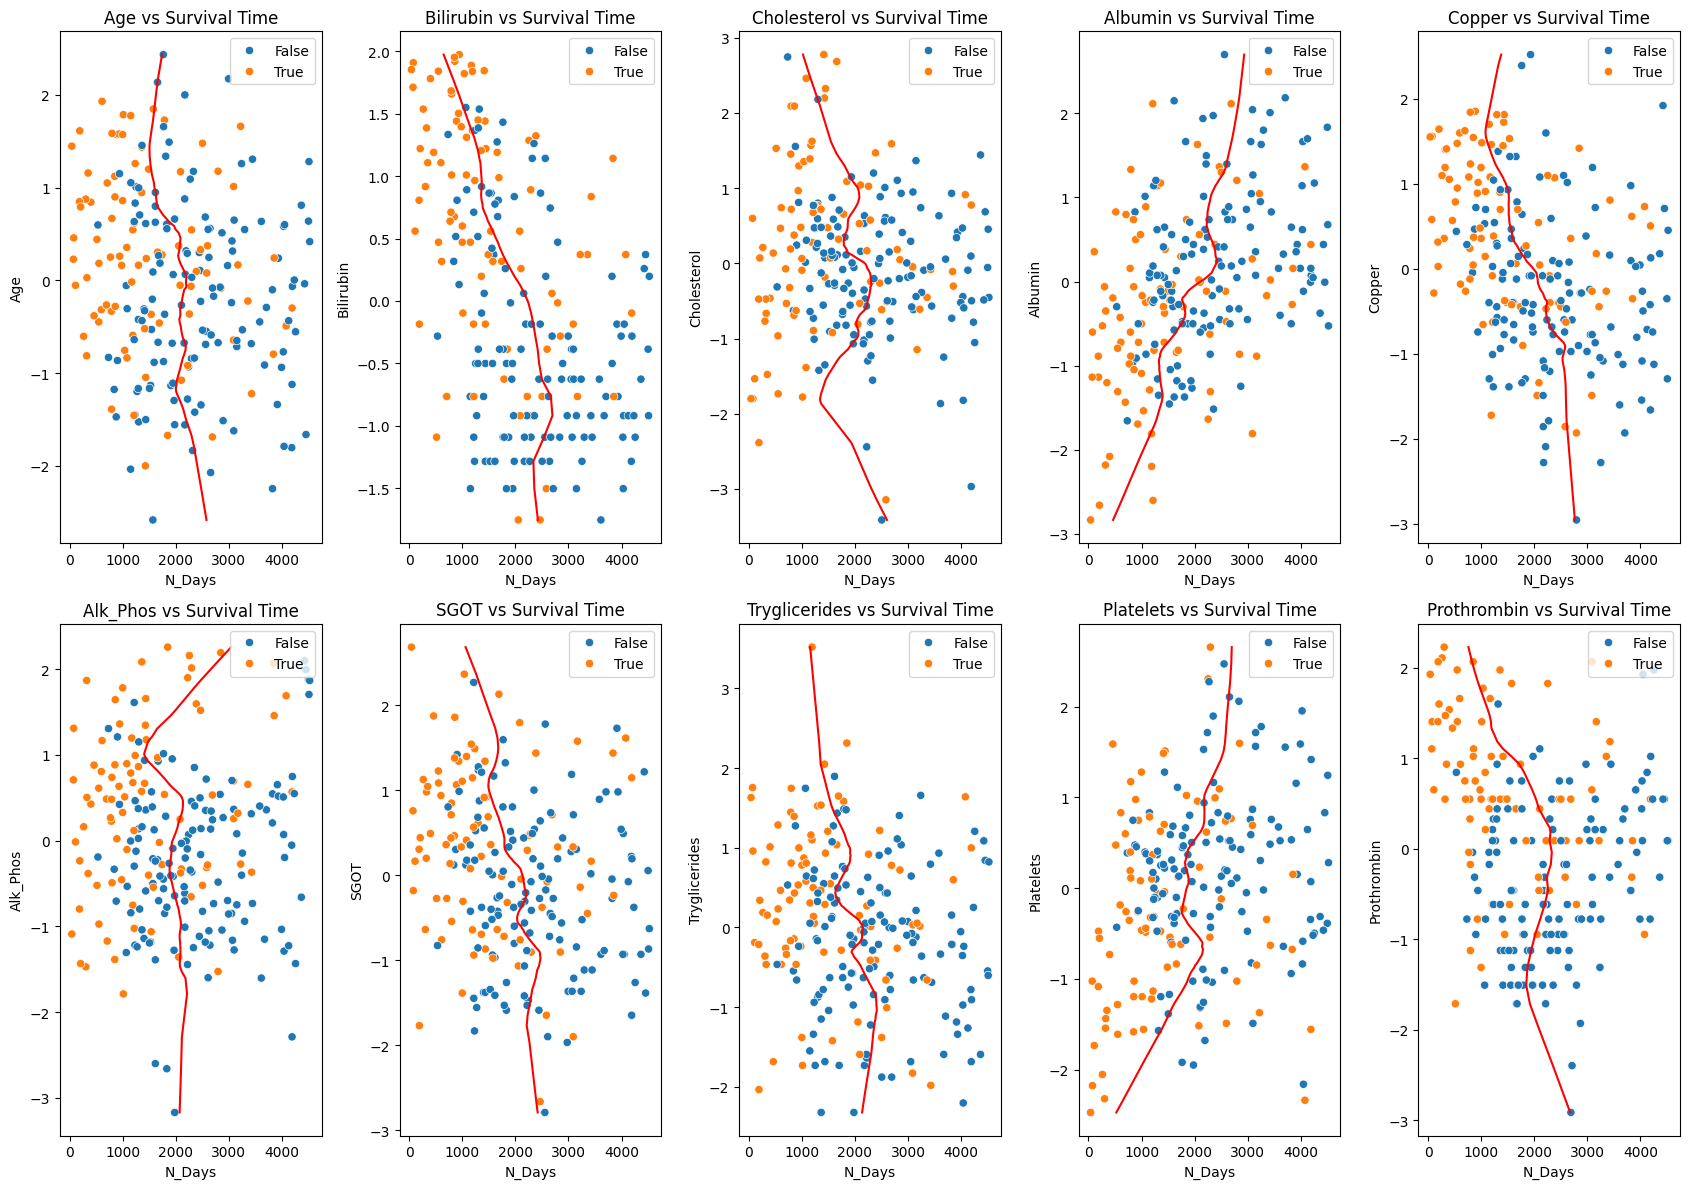

In [127]:
##################################
# Exploring the relationships between
# the numeric predictors and survival time
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.scatterplot(x='N_Days', y=cirrhosis_survival_numeric_predictors[i-1], data=cirrhosis_survival_train_EDA, hue='Status')
    loess_smoothed = lowess(cirrhosis_survival_train_EDA['N_Days'], cirrhosis_survival_train_EDA[cirrhosis_survival_numeric_predictors[i-1]], frac=0.3)
    plt.plot(loess_smoothed[:, 1], loess_smoothed[:, 0], color='red')
    plt.title(f'{cirrhosis_survival_numeric_predictors[i-1]} vs Survival Time')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

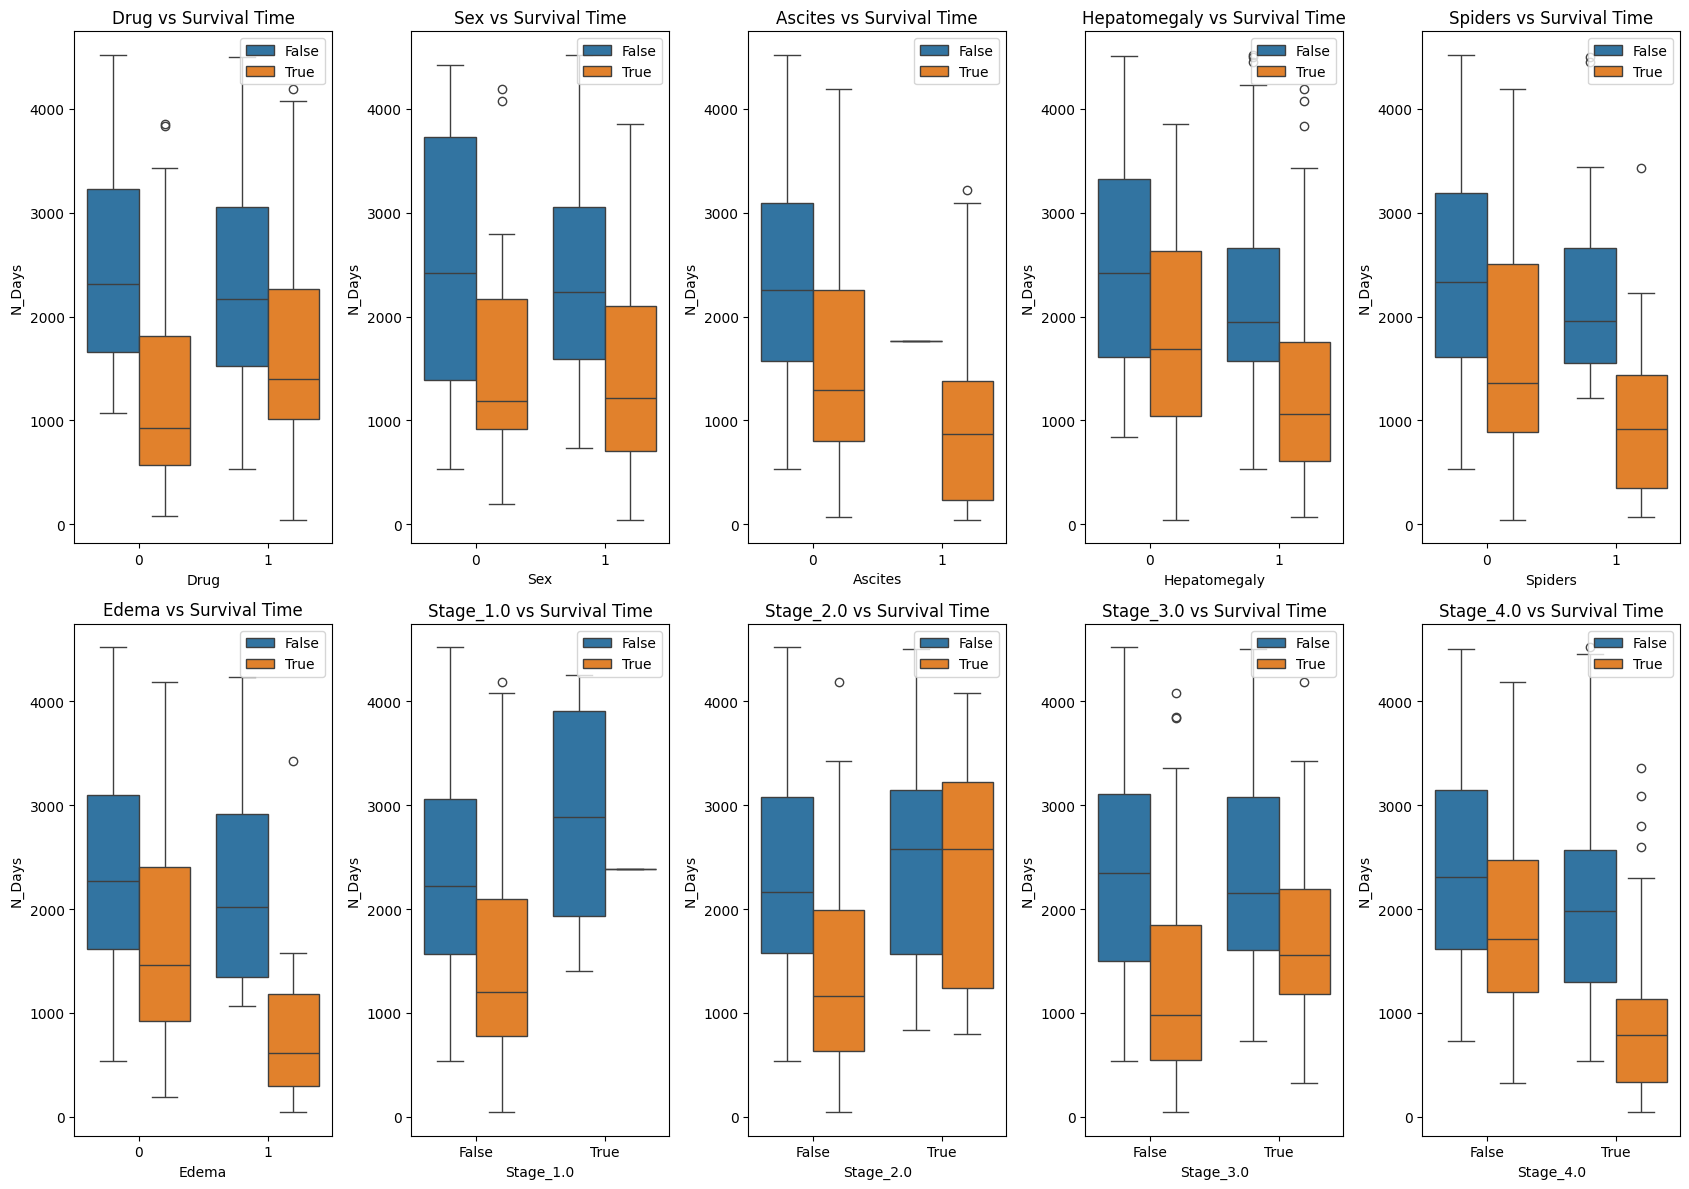

In [128]:
##################################
# Exploring the relationships between
# the object predictors and survival time
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.boxplot(x=cirrhosis_survival_object_predictors[i-1], y='N_Days', hue='Status', data=cirrhosis_survival_train_EDA)
    plt.title(f'{cirrhosis_survival_object_predictors[i-1]} vs Survival Time')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">Status</span> event variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups True and False is equal to zero  
    * **Alternative**: Difference in the means between groups True and False is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from the <span style="color: #FF0000">Status</span> groups in 10 numeric predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Bilirubin</span>: T.Test.Statistic=-8.031, T.Test.PValue=0.000
    * <span style="color: #FF0000">Prothrombin</span>: T.Test.Statistic=-7.062, T.Test.PValue=0.000 
    * <span style="color: #FF0000">Copper</span>: T.Test.Statistic=-5.699, T.Test.PValue=0.000  
    * <span style="color: #FF0000">Alk_Phos</span>: T.Test.Statistic=-4.638, T.Test.PValue=0.000 
    * <span style="color: #FF0000">SGOT</span>: T.Test.Statistic=-4.207, T.Test.PValue=0.000 
    * <span style="color: #FF0000">Albumin</span>: T.Test.Statistic=+3.871, T.Test.PValue=0.000  
    * <span style="color: #FF0000">Tryglicerides</span>: T.Test.Statistic=-3.575, T.Test.PValue=0.000   
    * <span style="color: #FF0000">Age</span>: T.Test.Statistic=-3.264, T.Test.PValue=0.001
    * <span style="color: #FF0000">Platelets</span>: T.Test.Statistic=+3.261, T.Test.PValue=0.001
    * <span style="color: #FF0000">Cholesterol</span>: T.Test.Statistic=-2.256, T.Test.PValue=0.025
3. The relationship between the object predictors to the <span style="color: #FF0000">Status</span> event variable was statistically evaluated using the following hypotheses:
    * **Null**: The object predictor is independent of the event variable 
    * **Alternative**: The object predictor is dependent on the event variable   
4. There is sufficient evidence to conclude of a statistically significant relationship between the individual categories and the <span style="color: #FF0000">Status</span> groups in 8 object predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Ascites</span>: ChiSquare.Test.Statistic=16.854, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Hepatomegaly</span>: ChiSquare.Test.Statistic=14.206, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">Edema</span>: ChiSquare.Test.Statistic=12.962, ChiSquare.Test.PValue=0.001 
    * <span style="color: #FF0000">Stage_4.0</span>: ChiSquare.Test.Statistic=11.505, ChiSquare.Test.PValue=0.00
    * <span style="color: #FF0000">Sex</span>: ChiSquare.Test.Statistic=6.837, ChiSquare.Test.PValue=0.008
    * <span style="color: #FF0000">Stage_2.0</span>: ChiSquare.Test.Statistic=4.024, ChiSquare.Test.PValue=0.045   
    * <span style="color: #FF0000">Stage_1.0</span>: ChiSquare.Test.Statistic=3.978, ChiSquare.Test.PValue=0.046 
    * <span style="color: #FF0000">Spiders</span>: ChiSquare.Test.Statistic=3.953, ChiSquare.Test.PValue=0.047
5. The relationship between the object predictors to the <span style="color: #FF0000">Status</span> and <span style="color: #FF0000">N_Days</span> variables was statistically evaluated using the following hypotheses:
    * **Null**: There is no difference in survival probabilities among cases belonging to each category of the object predictor.
    * **Alternative**: There is a difference in survival probabilities among cases belonging to each category of the object predictor.
6. There is sufficient evidence to conclude of a statistically significant difference in survival probabilities between the individual categories and the <span style="color: #FF0000">Status</span> groups with respect to the survival duration <span style="color: #FF0000">N_Days</span> in 8 object predictors given their high log-rank test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Ascites</span>: LR.Test.Statistic=37.792, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Edema</span>: LR.Test.Statistic=31.619, LR.Test.PValue=0.000 
    * <span style="color: #FF0000">Stage_4.0</span>: LR.Test.Statistic=26.482, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Hepatomegaly</span>: LR.Test.Statistic=20.350, LR.Test.PValue=0.000   
    * <span style="color: #FF0000">Spiders</span>: LR.Test.Statistic=10.762, LR.Test.PValue=0.001
    * <span style="color: #FF0000">Stage_2.0</span>: LR.Test.Statistic=6.775, LR.Test.PValue=0.009   
    * <span style="color: #FF0000">Sex</span>: LR.Test.Statistic=5.514, LR.Test.PValue=0.018
    * <span style="color: #FF0000">Stage_1.0</span>: LR.Test.Statistic=5.473, LR.Test.PValue=0.019 
7. The relationship between the binned numeric predictors to the <span style="color: #FF0000">Status</span> and <span style="color: #FF0000">N_Days</span> variables was statistically evaluated using the following hypotheses:
    * **Null**: There is no difference in survival probabilities among cases belonging to each category of the binned numeric predictor.
    * **Alternative**: There is a difference in survival probabilities among cases belonging to each category of the binned numeric predictor.
8. There is sufficient evidence to conclude of a statistically significant difference in survival probabilities between the individual categories and the <span style="color: #FF0000">Status</span> groups with respect to the survival duration <span style="color: #FF0000">N_Days</span> in 9 binned numeric predictors given their high log-rank test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Binned_Bilirubin</span>: LR.Test.Statistic=62.559, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_Albumin</span>: LR.Test.Statistic=29.444, LR.Test.PValue=0.000 
    * <span style="color: #FF0000">Binned_Copper</span>: LR.Test.Statistic=27.452, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_Prothrombin</span>: LR.Test.Statistic=21.695, LR.Test.PValue=0.000   
    * <span style="color: #FF0000">Binned_SGOT</span>: LR.Test.Statistic=16.178, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_Tryglicerides</span>: LR.Test.Statistic=11.512, LR.Test.PValue=0.000   
    * <span style="color: #FF0000">Binned_Age</span>: LR.Test.Statistic=9.012, LR.Test.PValue=0.002
    * <span style="color: #FF0000">Binned_Platelets</span>: LR.Test.Statistic=6.741, LR.Test.PValue=0.009 
    * <span style="color: #FF0000">Binned_Alk_Phos</span>: LR.Test.Statistic=5.503, LR.Test.PValue=0.018 


In [129]:
##################################
# Computing the t-test 
# statistic and p-values
# between the event variable
# and numeric predictor columns
##################################
cirrhosis_survival_numeric_ttest_event = {}
for numeric_column in cirrhosis_survival_numeric_predictors:
    group_0 = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA.loc[:,'Status']==False]
    group_1 = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA.loc[:,'Status']==True]
    cirrhosis_survival_numeric_ttest_event['Status_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [130]:
##################################
# Formulating the pairwise ttest summary
# between the event variable
# and numeric predictor columns
##################################
cirrhosis_survival_numeric_ttest_summary = cirrhosis_survival_train_EDA.from_dict(cirrhosis_survival_numeric_ttest_event, orient='index')
cirrhosis_survival_numeric_ttest_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(cirrhosis_survival_numeric_ttest_summary.sort_values(by=['T.Test.PValue'], ascending=True))

T.Test.Statistic  T.Test.PValue
Status_Bilirubin             -8.030789   6.198797e-14
Status_Prothrombin           -7.062933   2.204961e-11
Status_Copper                -5.699409   3.913575e-08
Status_Alk_Phos              -4.638524   6.077981e-06
Status_SGOT                  -4.207123   3.791642e-05
Status_Albumin                3.871216   1.434736e-04
Status_Tryglicerides         -3.575779   4.308371e-04
Status_Age                   -3.264563   1.274679e-03
Status_Platelets              3.261042   1.289850e-03
Status_Cholesterol           -2.256073   2.506758e-02

In [131]:
##################################
# Computing the chisquare
# statistic and p-values
# between the event variable
# and categorical predictor columns
##################################
cirrhosis_survival_object_chisquare_event = {}
for object_column in cirrhosis_survival_object_predictors:
    contingency_table = pd.crosstab(cirrhosis_survival_train_EDA[object_column], 
                                    cirrhosis_survival_train_EDA['Status'])
    cirrhosis_survival_object_chisquare_event['Status_' + object_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [132]:
##################################
# Formulating the pairwise chisquare summary
# between the event variable
# and categorical predictor columns
##################################
cirrhosis_survival_object_chisquare_event_summary = cirrhosis_survival_train_EDA.from_dict(cirrhosis_survival_object_chisquare_event, orient='index')
cirrhosis_survival_object_chisquare_event_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(cirrhosis_survival_object_chisquare_event_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True))

ChiSquare.Test.Statistic  ChiSquare.Test.PValue
Status_Ascites                      16.854134               0.000040
Status_Hepatomegaly                 14.206045               0.000164
Status_Edema                        12.962303               0.000318
Status_Stage_4.0                    11.505826               0.000694
Status_Sex                           6.837272               0.008928
Status_Stage_2.0                     4.024677               0.044839
Status_Stage_1.0                     3.977918               0.046101
Status_Spiders                       3.953826               0.046765
Status_Stage_3.0                     0.082109               0.774459
Status_Drug                          0.000000               1.000000

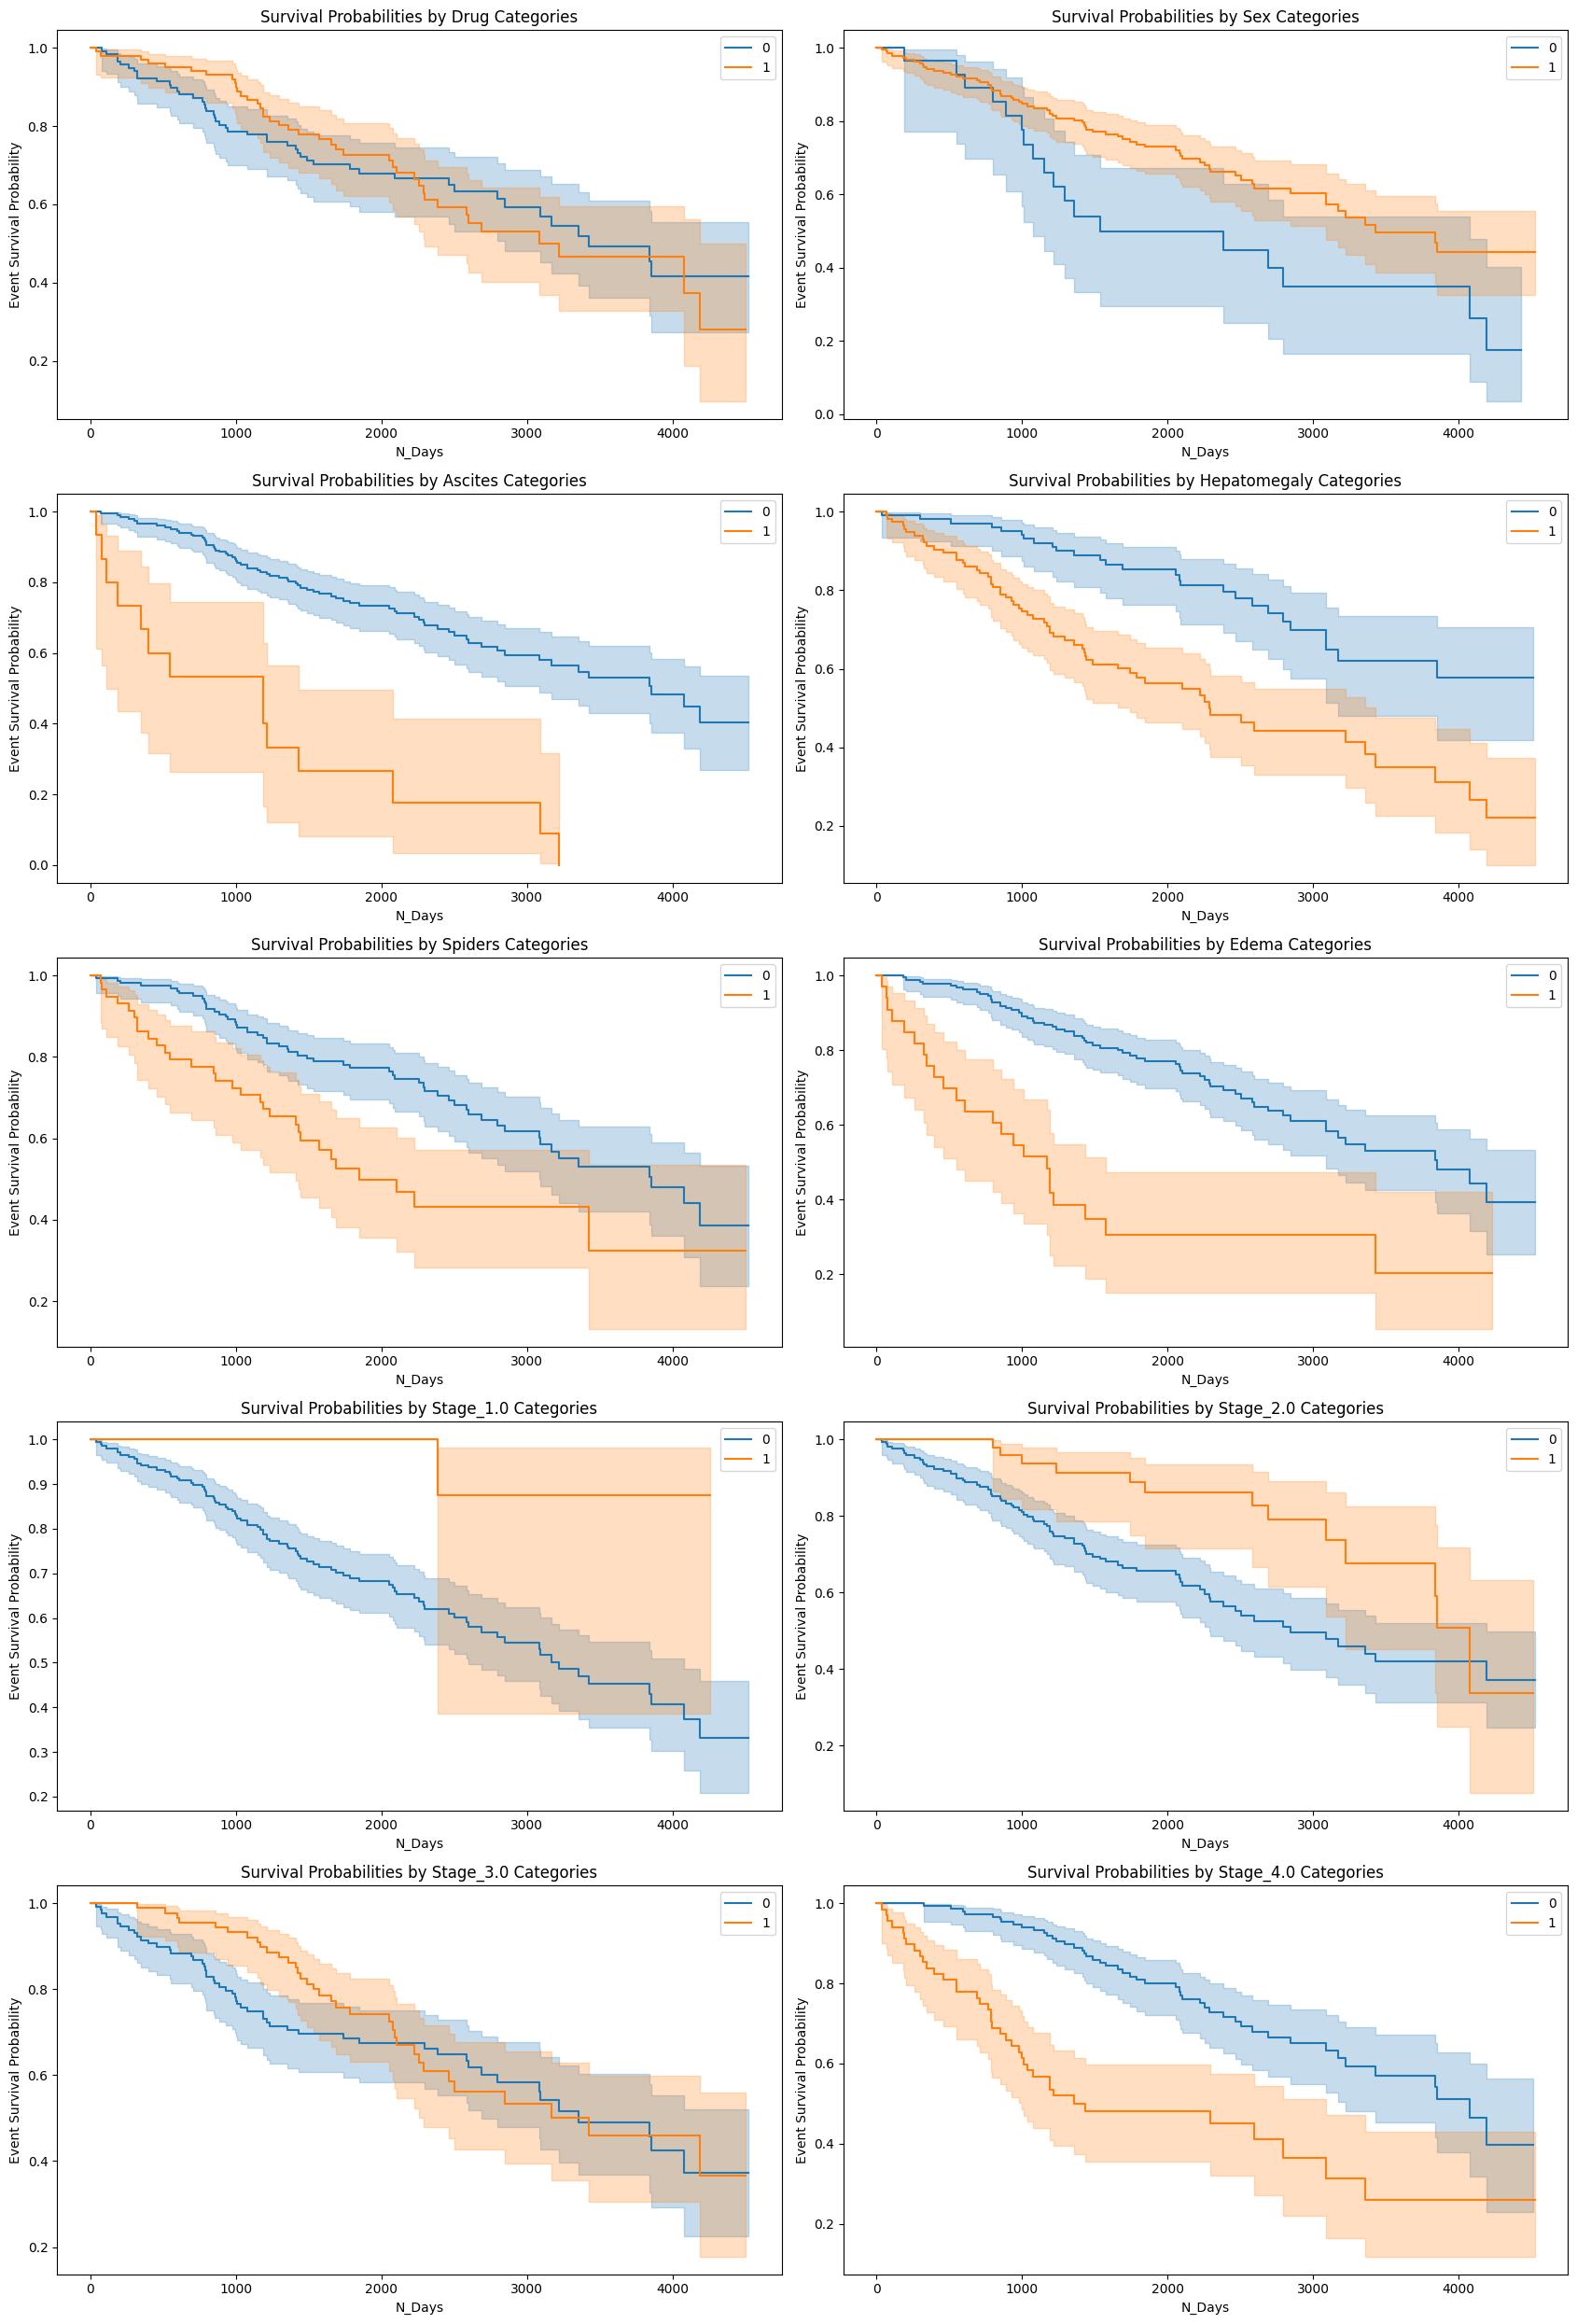

In [133]:
##################################
# Exploring the relationships between
# the object predictors with
# survival event and duration
##################################
plt.figure(figsize=(17, 25))
for i in range(0, len(cirrhosis_survival_object_predictors)):
    ax = plt.subplot(5, 2, i+1)
    for group in [0,1]:
        kmf.fit(durations=cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[cirrhosis_survival_object_predictors[i]] == group]['N_Days'],
                event_observed=cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[cirrhosis_survival_object_predictors[i]] == group]['Status'], label=group)
        kmf.plot_survival_function(ax=ax)
    plt.title(f'Survival Probabilities by {cirrhosis_survival_object_predictors[i]} Categories')
    plt.xlabel('N_Days')
    plt.ylabel('Event Survival Probability')
plt.tight_layout()
plt.show()

In [134]:
##################################
# Computing the log-rank test
# statistic and p-values
# between the event and duration variables
# with the object predictor columns
##################################
cirrhosis_survival_object_lrtest_event = {}
for object_column in cirrhosis_survival_object_predictors:
    groups = [0,1]
    group_0_event = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[0]]['Status']
    group_1_event = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[1]]['Status']
    group_0_duration = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[0]]['N_Days']
    group_1_duration = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[1]]['N_Days']
    lr_test = logrank_test(group_0_duration, group_1_duration,event_observed_A=group_0_event, event_observed_B=group_1_event)
    cirrhosis_survival_object_lrtest_event['Status_NDays_' + object_column] = (lr_test.test_statistic, lr_test.p_value)

In [135]:
##################################
# Formulating the log-rank test summary
# between the event and duration variables
# with the object predictor columns
##################################
cirrhosis_survival_object_lrtest_summary = cirrhosis_survival_train_EDA.from_dict(cirrhosis_survival_object_lrtest_event, orient='index')
cirrhosis_survival_object_lrtest_summary.columns = ['LR.Test.Statistic', 'LR.Test.PValue']
display(cirrhosis_survival_object_lrtest_summary.sort_values(by=['LR.Test.PValue'], ascending=True))

LR.Test.Statistic  LR.Test.PValue
Status_NDays_Ascites               37.792220    7.869499e-10
Status_NDays_Edema                 31.619652    1.875223e-08
Status_NDays_Stage_4.0             26.482676    2.659121e-07
Status_NDays_Hepatomegaly          20.360210    6.414988e-06
Status_NDays_Spiders               10.762275    1.035900e-03
Status_NDays_Stage_2.0              6.775033    9.244176e-03
Status_NDays_Sex                    5.514094    1.886385e-02
Status_NDays_Stage_1.0              5.473270    1.930946e-02
Status_NDays_Stage_3.0              0.478031    4.893156e-01
Status_NDays_Drug                   0.000016    9.968084e-01

In [136]:
##################################
# Creating an alternate copy of the 
# EDA data which will utilize
# binning for numeric predictors
##################################
cirrhosis_survival_train_EDA_binned = cirrhosis_survival_train_EDA.copy()

##################################
# Creating a function to bin
# numeric predictors into two groups
##################################
def bin_numeric_predictor(df, predictor):
    median = df[predictor].median()
    df[f'Binned_{predictor}'] = np.where(df[predictor] <= median, 0, 1)
    return df

##################################
# Binning the numeric predictors
# in the alternate EDA data into two groups
##################################
for numeric_column in cirrhosis_survival_numeric_predictors:
    cirrhosis_survival_train_EDA_binned = bin_numeric_predictor(cirrhosis_survival_train_EDA_binned, numeric_column)
    
##################################
# Formulating the binned numeric predictors
##################################    
cirrhosis_survival_binned_numeric_predictors = ["Binned_" + predictor for predictor in cirrhosis_survival_numeric_predictors]

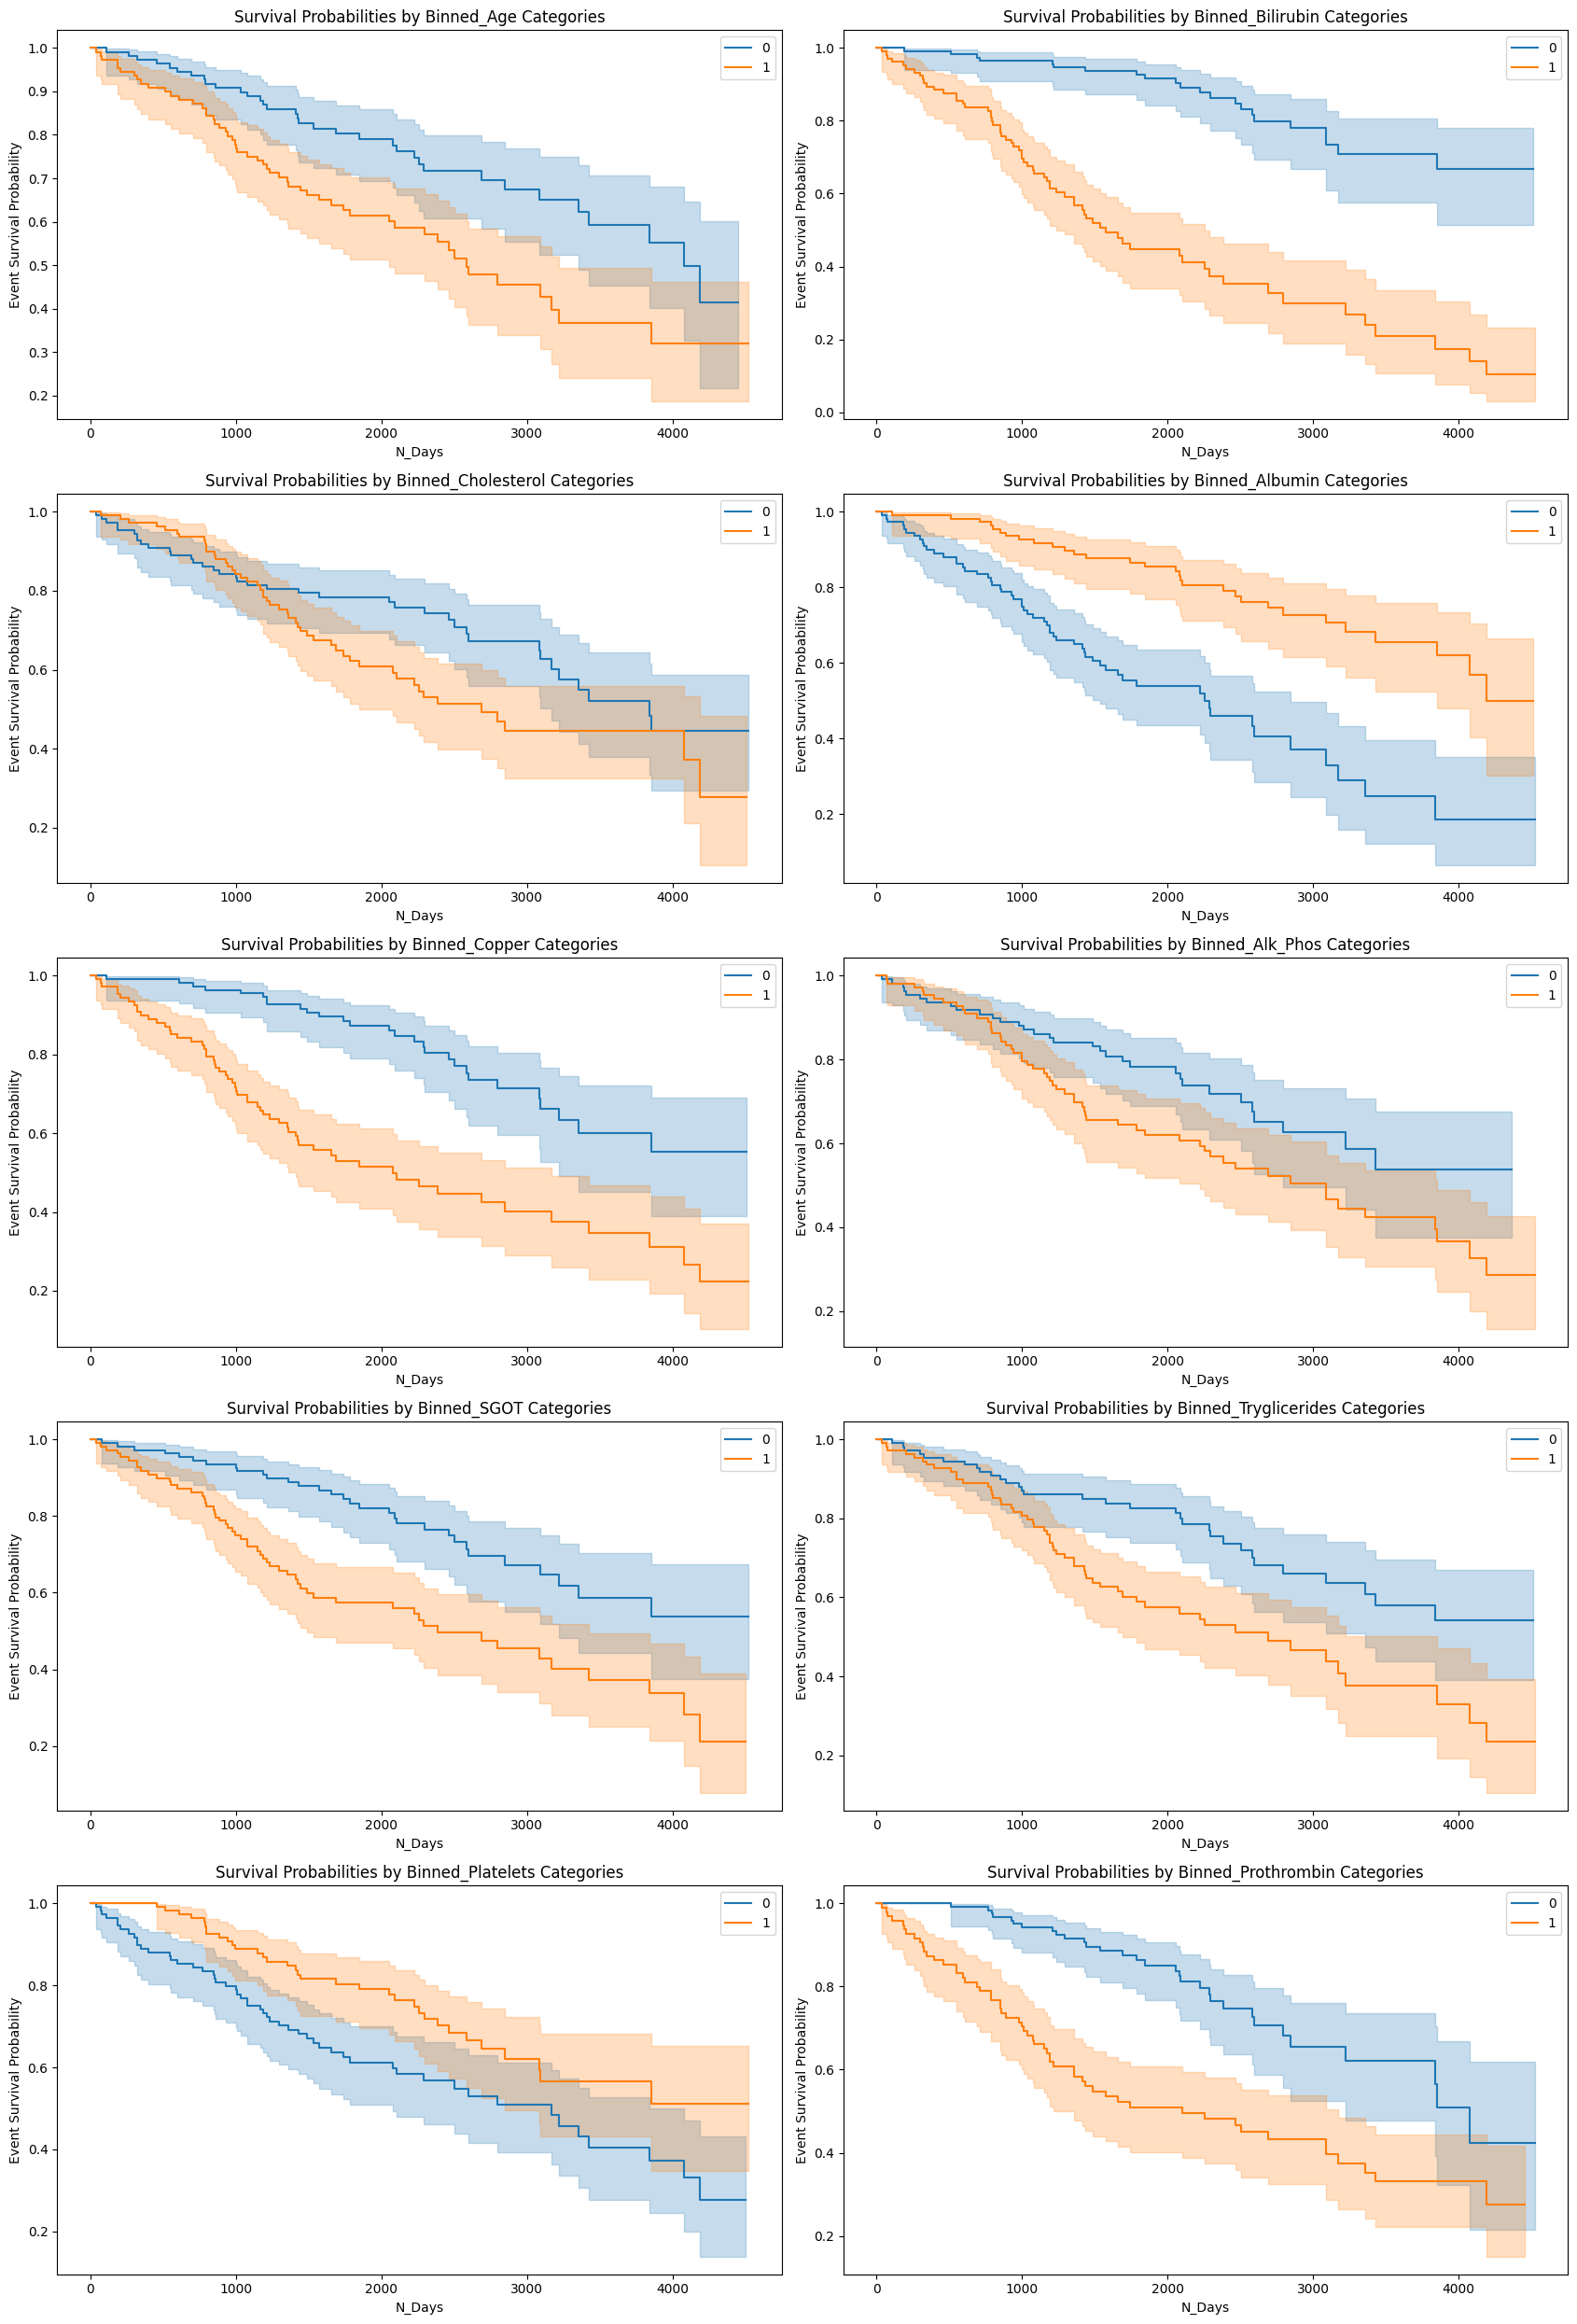

In [137]:
##################################
# Exploring the relationships between
# the binned numeric predictors with
# survival event and duration
##################################
plt.figure(figsize=(17, 25))
for i in range(0, len(cirrhosis_survival_binned_numeric_predictors)):
    ax = plt.subplot(5, 2, i+1)
    for group in [0,1]:
        kmf.fit(durations=cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[cirrhosis_survival_binned_numeric_predictors[i]] == group]['N_Days'],
                event_observed=cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[cirrhosis_survival_binned_numeric_predictors[i]] == group]['Status'], label=group)
        kmf.plot_survival_function(ax=ax)
    plt.title(f'Survival Probabilities by {cirrhosis_survival_binned_numeric_predictors[i]} Categories')
    plt.xlabel('N_Days')
    plt.ylabel('Event Survival Probability')
plt.tight_layout()
plt.show()

In [138]:
##################################
# Computing the log-rank test
# statistic and p-values
# between the event and duration variables
# with the binned numeric predictor columns
##################################
cirrhosis_survival_binned_numeric_lrtest_event = {}
for binned_numeric_column in cirrhosis_survival_binned_numeric_predictors:
    groups = [0,1]
    group_0_event = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[0]]['Status']
    group_1_event = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[1]]['Status']
    group_0_duration = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[0]]['N_Days']
    group_1_duration = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[1]]['N_Days']
    lr_test = logrank_test(group_0_duration, group_1_duration,event_observed_A=group_0_event, event_observed_B=group_1_event)
    cirrhosis_survival_binned_numeric_lrtest_event['Status_NDays_' + binned_numeric_column] = (lr_test.test_statistic, lr_test.p_value)

In [139]:
##################################
# Formulating the log-rank test summary
# between the event and duration variables
# with the binned numeric predictor columns
##################################
cirrhosis_survival_binned_numeric_lrtest_summary = cirrhosis_survival_train_EDA_binned.from_dict(cirrhosis_survival_binned_numeric_lrtest_event, orient='index')
cirrhosis_survival_binned_numeric_lrtest_summary.columns = ['LR.Test.Statistic', 'LR.Test.PValue']
display(cirrhosis_survival_binned_numeric_lrtest_summary.sort_values(by=['LR.Test.PValue'], ascending=True))

LR.Test.Statistic  LR.Test.PValue
Status_NDays_Binned_Bilirubin              62.559303    2.585412e-15
Status_NDays_Binned_Albumin                29.444808    5.753197e-08
Status_NDays_Binned_Copper                 27.452421    1.610072e-07
Status_NDays_Binned_Prothrombin            21.695995    3.194575e-06
Status_NDays_Binned_SGOT                   16.178483    5.764520e-05
Status_NDays_Binned_Tryglicerides          11.512960    6.911262e-04
Status_NDays_Binned_Age                     9.011700    2.682568e-03
Status_NDays_Binned_Platelets               6.741196    9.421142e-03
Status_NDays_Binned_Alk_Phos                5.503850    1.897465e-02
Status_NDays_Binned_Cholesterol             3.773953    5.205647e-02

### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. To improve interpretation, reduce dimensionality and avoid inducing design matrix singularity, 3 object predictors were dropped prior to modelling:
    * <span style="color: #FF0000">Stage_1.0</span>
    * <span style="color: #FF0000">Stage_2.0</span>
    * <span style="color: #FF0000">Stage_3.0</span>
2. To evaluate the feature selection capabilities of the candidate models, all remaining predictors were accounted during the model development process using the training subset:
    * **218 rows** (observations)
    * **19 columns** (variables)
        * **2/19 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/19 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **7/19 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_4.0</span>
3. Similarly, all remaining predictors were accounted during the model evaluation process using the testing subset:
    * **94 rows** (observations)
    * **19 columns** (variables)
        * **2/19 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/19 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **7/19 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_4.0</span>

In [140]:
##################################
# Formulating a complete dataframe
# from the training subset for modelling
##################################
cirrhosis_survival_y_train_cleaned.reset_index(drop=True, inplace=True)
cirrhosis_survival_train_modeling = pd.concat([cirrhosis_survival_y_train_cleaned,
                                               cirrhosis_survival_X_train_preprocessed],
                                              axis=1)
cirrhosis_survival_train_modeling.drop(columns=['Stage_1.0', 'Stage_2.0', 'Stage_3.0'], axis=1, inplace=True)
cirrhosis_survival_train_modeling['Stage_4.0'] = cirrhosis_survival_train_modeling['Stage_4.0'].replace({True: 1, False: 0})
cirrhosis_survival_train_modeling.head()

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0   False    2475 -1.342097   0.863802     0.886087 -0.451884 -0.972098   
1   False     877 -1.470901   0.516350     1.554523  0.827618  0.467579   
2   False    3050 -0.239814  -0.625875     0.293280  0.646582 -0.241205   
3    True     110 -0.052733   0.559437    -1.534283  0.354473 -0.284113   
4    True    3839 -0.795010   1.142068    -0.108933 -0.272913  0.618030   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  Drug  Sex  \
0  0.140990  0.104609       0.155130   0.540960     0.747580     1    1   
1 -0.705337  0.301441       1.275222   0.474140    -0.315794     1    0   
2 -0.848544  0.275723      -1.684460   0.756741     0.087130     1    1   
3 -0.014525  0.162878      -0.189139  -1.735375     0.649171     0    1   
4  2.071847  1.434674      -0.212684  -0.675951    -0.315794     0    1   

   Ascites  Hepatomegaly  Spiders  Edema  Stage_4.0  
0        0             0        0      0          0  
1        0             0        0      0          0  
2        0             0        0      0          0  
3        1             1        1      1          1  
4        0             1        0      0          0

In [141]:
##################################
# Formulating a complete dataframe
# from the testing subset for modelling
##################################
cirrhosis_survival_y_test_cleaned.reset_index(drop=True, inplace=True)
cirrhosis_survival_test_modeling = pd.concat([cirrhosis_survival_y_test_cleaned,
                                               cirrhosis_survival_X_test_preprocessed],
                                              axis=1)
cirrhosis_survival_test_modeling.drop(columns=['Stage_1.0', 'Stage_2.0', 'Stage_3.0'], axis=1, inplace=True)
cirrhosis_survival_test_modeling['Stage_4.0'] = cirrhosis_survival_test_modeling['Stage_4.0'].replace({True: 1, False: 0})
cirrhosis_survival_test_modeling.head()

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0   False    3336  1.043704   0.744396     0.922380  0.240951  0.045748   
1   False    1321 -1.936476  -0.764558     0.160096 -0.600950 -0.179138   
2   False    1435 -1.749033   0.371523     0.558115  0.646582 -0.159024   
3   False    4459 -0.485150  -0.918484    -0.690904  1.629765  0.028262   
4   False    2721 -0.815655   1.286438     2.610501 -0.722153  0.210203   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  Drug  Sex  \
0  0.317282 -0.078335       2.671950   1.654815    -0.948196     1    1   
1 -0.245613  0.472422      -0.359800   0.348533     0.439089     0    1   
2  0.339454  0.685117      -3.109146  -0.790172    -0.617113     1    1   
3  1.713791 -1.387751       0.155130   0.679704     0.087130     1    0   
4  0.602860  3.494936      -0.053214  -0.475634    -1.714435     0    1   

   Ascites  Hepatomegaly  Spiders  Edema  Stage_4.0  
0        0             0        1      1          0  
1        0             0        0      0          1  
2        0             1        0      0          1  
3        0             0        0      0          0  
4        0             1        0      0          0

### 1.6.2 Cox Regression with No Penalty <a class="anchor" id="1.6.2"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[No Penalty](https://lifelines.readthedocs.io/en/latest/), or zero regularization in cox regression, applies no additional constraints to the coefficients. The model estimates the coefficients by maximizing the partial likelihood function without any regularization term. This approach can lead to overfitting, especially when the number of predictors is large or when there is multicollinearity among the predictors.

[Concordance Index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html) measures the model's ability to correctly order pairs of observations based on their predicted survival times. Values range from 0.5 to 1.0 indicating no predictive power (random guessing) and perfect predictions, respectively. As a metric, it provides a measure of discriminative ability and useful for ranking predictions. However, it does not provide information on the magnitude of errors and may be insensitive to the calibration of predicted survival probabilities.

1. The [cox proportional hazards regression model](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html) from the <mark style="background-color: #CCECFF"><b>lifelines.CoxPHFitter</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">penalizer</span> = penalty to the size of the coefficients during regression fixed at a value = 0.00
    * <span style="color: #FF0000">l1_ratio</span> = proportion of the L1 versus L2 penalty fixed at a value = 0.00
3. All 17 variables were used for prediction given the non-zero values of the model coefficients.
4. Out of all 17 predictors, only 3 variables were statistically significant:
    * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Prothrombin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Age</span>: Increase in value associated with a more elevated hazard 
5. The cross-validated model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8024
6. The apparent model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8478
7. The independent test model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8480
8. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
9. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
10. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
11. SHAP values were computed for the significant predictors, with contributions to the model output ranked as follows:
    * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Prothrombin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Age</span> result to increased event risk

In [142]:
##################################
# Formulating the Cox Regression model
# with No Penalty
# and generating the summary
##################################
cirrhosis_survival_coxph_L1_0_L2_0 = CoxPHFitter(penalizer=0.00, l1_ratio=0.00)
cirrhosis_survival_coxph_L1_0_L2_0.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
cirrhosis_survival_coxph_L1_0_L2_0.summary

coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                      
Age            0.376767   1.457565  0.138099        0.106098        0.647436   
Bilirubin      0.762501   2.143630  0.217243        0.336713        1.188289   
Cholesterol    0.061307   1.063225  0.163017       -0.258200        0.380814   
Albumin       -0.121698   0.885416  0.150453       -0.416580        0.173184   
Copper         0.106671   1.112568  0.166238       -0.219149        0.432492   
Alk_Phos       0.009525   1.009570  0.149078       -0.282664        0.301713   
SGOT           0.175013   1.191261  0.155532       -0.129825        0.479850   
Tryglicerides  0.134283   1.143716  0.138146       -0.136478        0.405044   
Platelets     -0.039691   0.961087  0.129440       -0.293388        0.214007   
Prothrombin    0.359660   1.432843  0.139796        0.085665        0.633656   
Drug          -0.236093   0.789708  0.250917       -0.727881        0.255696   
Sex            0.088317   1.092335  0.354036       -0.605581        0.782216   
Ascites        0.101744   1.107100  0.401745       -0.685661        0.889150   
Hepatomegaly   0.050489   1.051785  0.282509       -0.503219        0.604197   
Spiders       -0.043470   0.957461  0.288959       -0.609820        0.522879   
Edema          0.544039   1.722952  0.309540       -0.062647        1.150726   
Stage_4.0      0.224185   1.251302  0.301255       -0.366264        0.814633   

               exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                   
Age                       1.111931             1.910636     0.0  2.728240   
Bilirubin                 1.400337             3.281461     0.0  3.509901   
Cholesterol               0.772441             1.463476     0.0  0.376078   
Albumin                   0.659298             1.189085     0.0 -0.808879   
Copper                    0.803202             1.541093     0.0  0.641678   
Alk_Phos                  0.753773             1.352173     0.0  0.063890   
SGOT                      0.878249             1.615832     0.0  1.125249   
Tryglicerides             0.872425             1.499369     0.0  0.972036   
Platelets                 0.745733             1.238631     0.0 -0.306634   
Prothrombin               1.089441             1.884487     0.0  2.572748   
Drug                      0.482931             1.291360     0.0 -0.940919   
Sex                       0.545757             2.186311     0.0  0.249459   
Ascites                   0.503757             2.433060     0.0  0.253256   
Hepatomegaly              0.604581             1.829782     0.0  0.178715   
Spiders                   0.543449             1.686878     0.0 -0.150438   
Edema                     0.939275             3.160486     0.0  1.757576   
Stage_4.0                 0.693320             2.258347     0.0  0.744169   

                      p   -log2(p)  
covariate                           
Age            0.006367   7.295096  
Bilirubin      0.000448  11.123334  
Cholesterol    0.706859   0.500505  
Albumin        0.418585   1.256408  
Copper         0.521083   0.940416  
Alk_Phos       0.949058   0.075432  
SGOT           0.260483   1.940736  
Tryglicerides  0.331032   1.594955  
Platelets      0.759122   0.397596  
Prothrombin    0.010089   6.631007  
Drug           0.346746   1.528048  
Sex            0.803006   0.316517  
Ascites        0.800071   0.321801  
Hepatomegaly   0.858161   0.220679  
Spiders        0.880419   0.183737  
Edema          0.078820   3.665300  
Stage_4.0      0.456774   1.130447

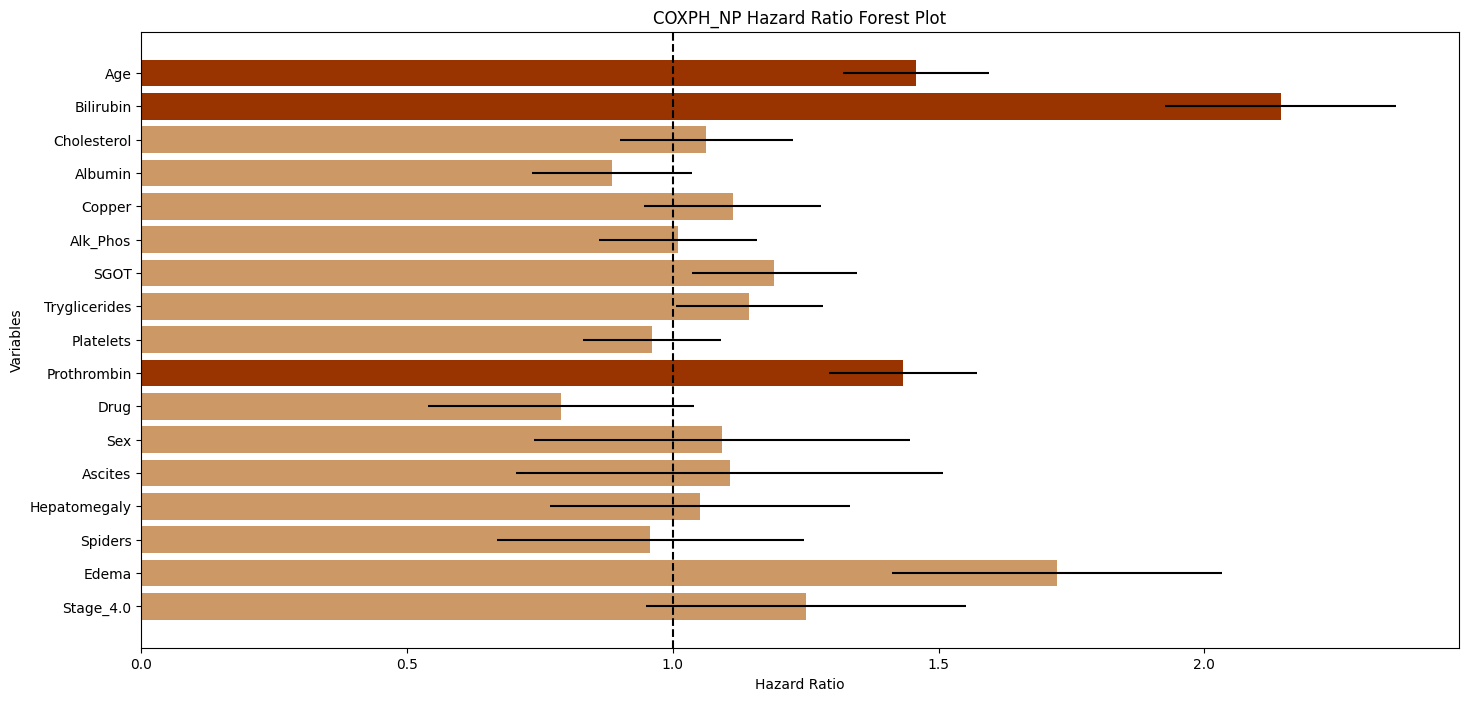

In [143]:
##################################
# Plotting the hazard ratio of the
# formulated Cox Regression model
# with No Penalty
##################################
cirrhosis_survival_coxph_L1_0_L2_0_summary = cirrhosis_survival_coxph_L1_0_L2_0.summary
cirrhosis_survival_coxph_L1_0_L2_0_summary['hazard_ratio'] = np.exp(cirrhosis_survival_coxph_L1_0_L2_0_summary['coef'])
significant = cirrhosis_survival_coxph_L1_0_L2_0_summary['p'] < 0.05
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]

plt.barh(cirrhosis_survival_coxph_L1_0_L2_0_summary.index, 
         cirrhosis_survival_coxph_L1_0_L2_0_summary['hazard_ratio'], 
         xerr=cirrhosis_survival_coxph_L1_0_L2_0_summary['se(coef)'], 
         color=colors)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('COXPH_NP Hazard Ratio Forest Plot')
plt.axvline(x=1, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

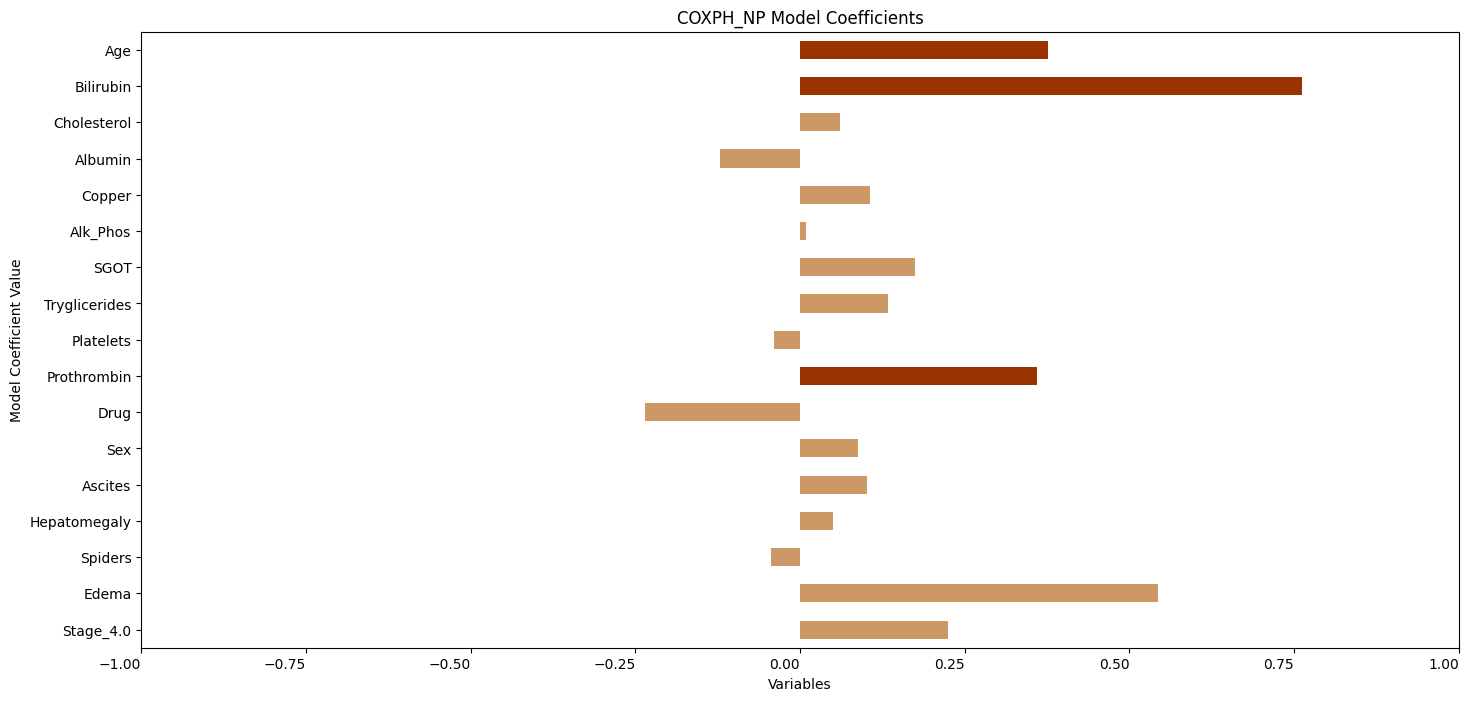

In [144]:
##################################
# Plotting the coefficient magnitude
# of the formulated Cox Regression model
# with No Penalty
##################################
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]
cirrhosis_survival_coxph_L1_0_L2_0_summary['coef'].plot(kind='barh', color=colors)
plt.xlabel('Variables')
plt.ylabel('Model Coefficient Value')
plt.title('COXPH_NP Model Coefficients')
plt.xticks(rotation=0, ha='right')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

In [145]:
##################################
# Determining the number of
# selected and significant predictors
##################################
coxph_L1_0_L2_0_selected = sum((cirrhosis_survival_coxph_L1_0_L2_0_summary['coef']>0.001) | (-cirrhosis_survival_coxph_L1_0_L2_0_summary['coef']>0.001))
coxph_L1_0_L2_0_significant = sum(cirrhosis_survival_coxph_L1_0_L2_0_summary['p'] < 0.05)
display(f"Number of Selected Predictors: {coxph_L1_0_L2_0_selected}, Number of Significant Predictors: {coxph_L1_0_L2_0_significant}")

'Number of Selected Predictors: 17, Number of Significant Predictors: 3'

In [146]:
##################################
# Gathering the apparent model performance
# as baseline for evaluating overfitting
##################################
cirrhosis_survival_coxph_L1_0_L2_0.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
train_predictions = cirrhosis_survival_coxph_L1_0_L2_0.predict_partial_hazard(cirrhosis_survival_train_modeling)
cirrhosis_survival_coxph_L1_0_L2_0_train_ci = concordance_index(cirrhosis_survival_train_modeling['N_Days'], 
                                                                     -train_predictions, 
                                                                     cirrhosis_survival_train_modeling['Status'])
display(f"Apparent Concordance Index: {cirrhosis_survival_coxph_L1_0_L2_0_train_ci}")

'Apparent Concordance Index: 0.8478543563068921'

In [147]:
##################################
# Performing 5-Fold Cross-Validation
# on the training data
##################################
kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
c_index_scores = []

for train_index, val_index in kf.split(cirrhosis_survival_train_modeling):
    df_train_fold = cirrhosis_survival_train_modeling.iloc[train_index]
    df_val_fold = cirrhosis_survival_train_modeling.iloc[val_index]
    
    cirrhosis_survival_coxph_L1_0_L2_0.fit(df_train_fold, duration_col='N_Days', event_col='Status')
    val_predictions = cirrhosis_survival_coxph_L1_0_L2_0.predict_partial_hazard(df_val_fold)
    c_index = concordance_index(df_val_fold['N_Days'], -val_predictions, df_val_fold['Status'])
    c_index_scores.append(c_index)

cirrhosis_survival_coxph_L1_0_L2_0_cv_ci_mean = np.mean(c_index_scores)
cirrhosis_survival_coxph_L1_0_L2_0_cv_ci_std = np.std(c_index_scores)

display(f"Cross-Validated Concordance Index: {cirrhosis_survival_coxph_L1_0_L2_0_cv_ci_mean}")

'Cross-Validated Concordance Index: 0.8023642721538025'

In [148]:
##################################
# Evaluating the model performance
# on test data
##################################
test_predictions = cirrhosis_survival_coxph_L1_0_L2_0.predict_partial_hazard(cirrhosis_survival_test_modeling)
cirrhosis_survival_coxph_L1_0_L2_0_test_ci = concordance_index(cirrhosis_survival_test_modeling['N_Days'], 
                                                                     -test_predictions, 
                                                                     cirrhosis_survival_test_modeling['Status'])
display(f"Test Concordance Index: {cirrhosis_survival_coxph_L1_0_L2_0_test_ci}")

'Test Concordance Index: 0.8480725623582767'

In [149]:
##################################
# Gathering the concordance indices
# from training, cross-validation and test
##################################
coxph_L1_0_L2_0_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_L1_0_L2_0_ci_values = pd.DataFrame([cirrhosis_survival_coxph_L1_0_L2_0_train_ci,
                                           cirrhosis_survival_coxph_L1_0_L2_0_cv_ci_mean,
                                           cirrhosis_survival_coxph_L1_0_L2_0_test_ci])
coxph_L1_0_L2_0_method = pd.DataFrame(["COXPH_NP"]*3)
coxph_L1_0_L2_0_summary = pd.concat([coxph_L1_0_L2_0_set, 
                                     coxph_L1_0_L2_0_ci_values,
                                     coxph_L1_0_L2_0_method], 
                                    axis=1)
coxph_L1_0_L2_0_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_L1_0_L2_0_summary.reset_index(inplace=True, drop=True)
display(coxph_L1_0_L2_0_summary)

Set  Concordance.Index    Method
0             Train           0.847854  COXPH_NP
1  Cross-Validation           0.802364  COXPH_NP
2              Test           0.848073  COXPH_NP

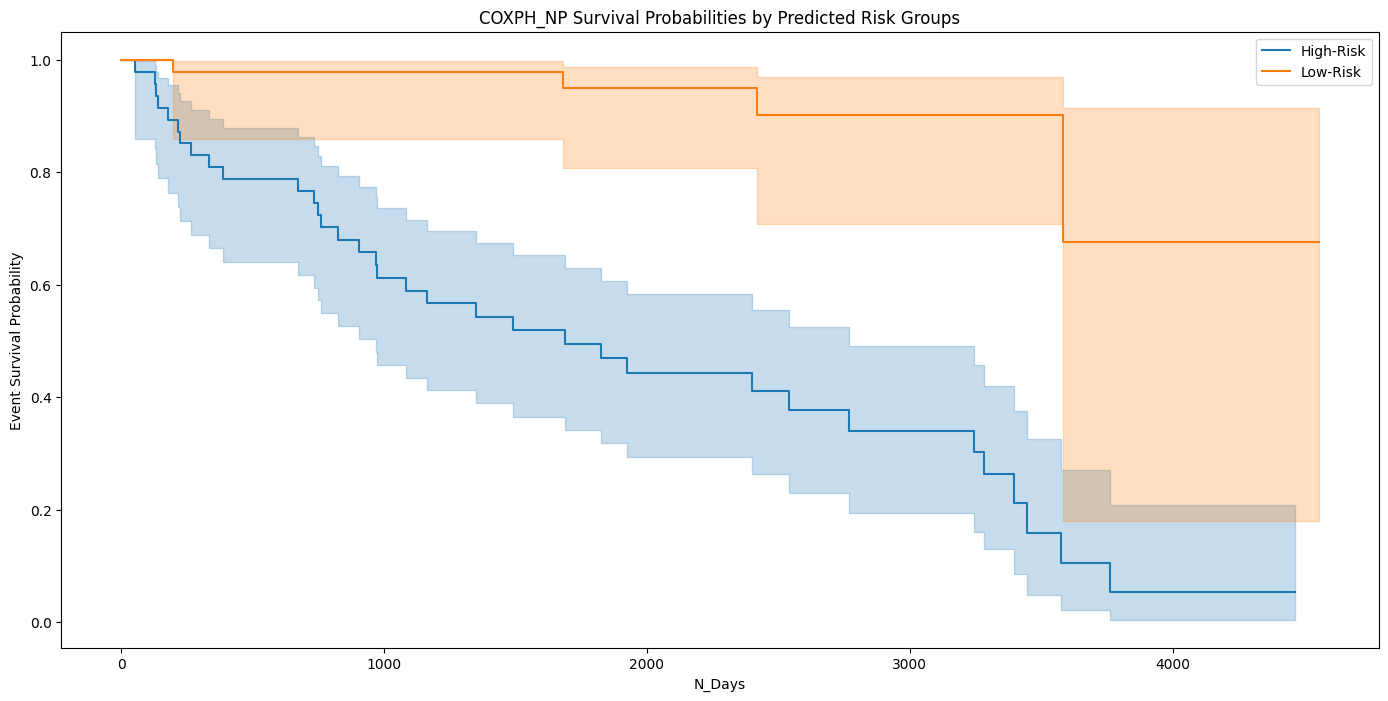

In [150]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_NP'] = test_predictions
cirrhosis_survival_test_modeling['Predicted_RiskGroups_COXPH_NP'] = risk_groups = pd.qcut(cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_NP'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test_modeling[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH_NP Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [151]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
10    True    1827  0.226982   1.530100     1.302295  1.331981  1.916467   
20   False    1447 -0.147646   0.061189     0.793618 -1.158235  0.861264   
30   False    2574  0.296370  -1.283677     0.169685  3.237777 -1.008276   
40    True    3762  0.392609  -0.096645    -0.486337  1.903146 -0.546292   
50   False     837 -0.813646   1.089037     0.064451  0.212865  2.063138   

    Alk_Phos      SGOT  Tryglicerides  ...  Prothrombin  Drug  Sex  Ascites  \
10 -0.477846 -0.451305       2.250260  ...     0.546417     1    1        0   
20  0.625621  0.319035       0.446026  ...    -1.508571     1    1        0   
30 -0.873566 -0.845549      -0.351236  ...    -0.617113     1    1        0   
40 -0.247141 -0.720619      -0.810790  ...     1.402075     0    1        0   
50 -0.224432  0.074987       2.333282  ...    -1.125995     0    1        0   

    Hepatomegaly  Spiders  Edema  Stage_4.0  Predicted_Risks_COXPH_NP  \
10             1        1      0          1                  8.397958   
20             0        0      0          1                  0.466233   
30             0        0      0          0                  0.153047   
40             1        1      0          1                  2.224881   
50             1        1      0          1                  2.886051   

    Predicted_RiskGroups_COXPH_NP  
10                      High-Risk  
20                       Low-Risk  
30                       Low-Risk  
40                      High-Risk  
50                      High-Risk  

[5 rows x 21 columns]

In [152]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test_modeling.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_COXPH_NP']])

   Predicted_RiskGroups_COXPH_NP
10                     High-Risk
20                      Low-Risk
30                      Low-Risk
40                     High-Risk
50                     High-Risk


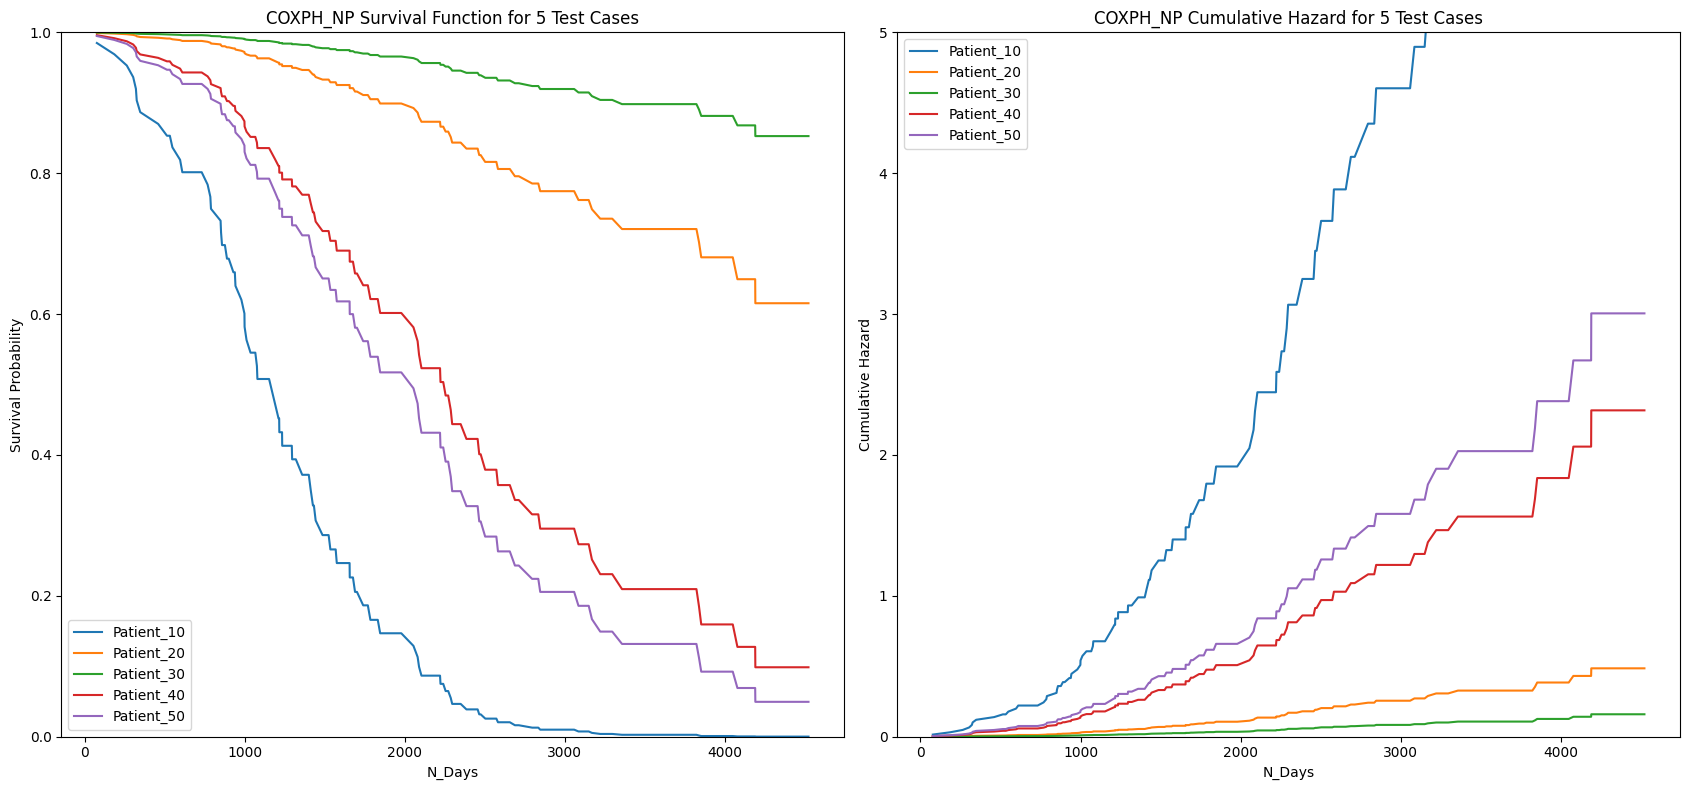

In [153]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50']

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
for i, (index, row) in enumerate(test_case.iterrows()):
    survival_function = cirrhosis_survival_coxph_L1_0_L2_0.predict_survival_function(row.to_frame().T)
    axes[0].plot(survival_function, label=f'Sample {i+1}')
axes[0].set_title('COXPH_NP Survival Function for 5 Test Cases')
axes[0].set_xlabel('N_Days')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Survival Probability')
axes[0].legend(test_case_labels, loc="lower left")
for i, (index, row) in enumerate(test_case.iterrows()):
    hazard_function = cirrhosis_survival_coxph_L1_0_L2_0.predict_cumulative_hazard(row.to_frame().T)
    axes[1].plot(hazard_function, label=f'Sample {i+1}')
axes[1].set_title('COXPH_NP Cumulative Hazard for 5 Test Cases')
axes[1].set_xlabel('N_Days')
axes[1].set_ylim(0,5)
axes[1].set_ylabel('Cumulative Hazard')
axes[1].legend(test_case_labels, loc="upper left")
plt.tight_layout()
plt.show()

In [154]:
##################################
# Creating the explainer object
##################################
cirrhosis_survival_coxph_L1_0_L2_0_explainer = shap.Explainer(cirrhosis_survival_coxph_L1_0_L2_0.predict_partial_hazard, 
                                                              cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))
cirrhosis_survival_coxph_L1_0_L2_0_shap_values = cirrhosis_survival_coxph_L1_0_L2_0_explainer(cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))

PermutationExplainer explainer: 219it [00:18,  7.11it/s]                                                               


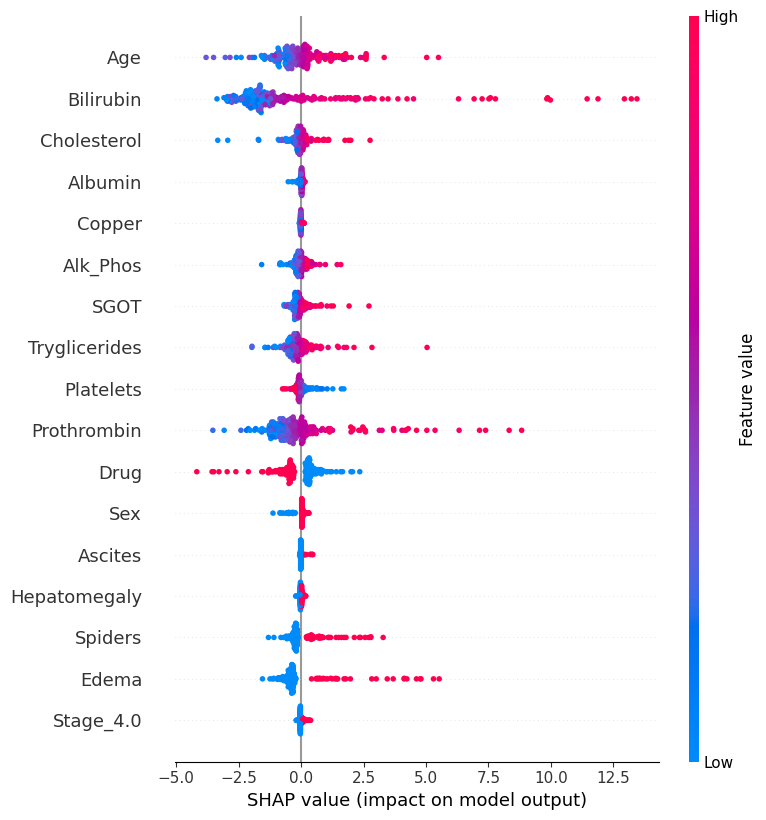

In [155]:
##################################
# Plotting the SHAP summary plot
##################################
shap.summary_plot(cirrhosis_survival_coxph_L1_0_L2_0_shap_values, 
                  cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]),
                  sort=False)

### 1.6.3 Cox Regression With Full L1 Penalty <a class="anchor" id="1.6.3"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[Lasso Penalty](https://lifelines.readthedocs.io/en/latest/), or L1 regularization in cox regression, adds a constraint to the sum of the absolute values of the coefficients. The penalized log-likelihood function is composed of the partial likelihood of the cox model, a tuning parameter that controls the strength of the penalty, and the sum of the absolute model coefficients. The Lasso penalty encourages sparsity in the coefficients, meaning it tends to set some coefficients exactly to zero, effectively performing variable selection.

[Concordance Index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html) measures the model's ability to correctly order pairs of observations based on their predicted survival times. Values range from 0.5 to 1.0 indicating no predictive power (random guessing) and perfect predictions, respectively. As a metric, it provides a measure of discriminative ability and useful for ranking predictions. However, it does not provide information on the magnitude of errors and may be insensitive to the calibration of predicted survival probabilities.

1. The [cox proportional hazards regression model](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html) from the <mark style="background-color: #CCECFF"><b>lifelines.CoxPHFitter</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">penalizer</span> = penalty to the size of the coefficients during regression fixed at a value = 0.10
    * <span style="color: #FF0000">l1_ratio</span> = proportion of the L1 versus L2 penalty fixed at a value = 1.00
3. Only 8 out of the 17 variables were used for prediction given the non-zero values of the model coefficients.
4. Out of all 8 predictors, only 1 variable was statistically significant:
    * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
5. The cross-validated model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8111
6. The apparent model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8313
7. The independent test model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8426
8. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of minimal model overfitting.
9. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
10. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
11. SHAP values were computed for the significant predictors, with contributions to the model output ranked as follows:
    * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk

In [156]:
##################################
# Formulating the Cox Regression model
# with Full L1 Penalty
# and generating the summary
##################################
cirrhosis_survival_coxph_L1_100_L2_0 = CoxPHFitter(penalizer=0.10, l1_ratio=1.00)
cirrhosis_survival_coxph_L1_100_L2_0.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
cirrhosis_survival_coxph_L1_100_L2_0.print_summary()

<lifelines.CoxPHFitter: fitted with 218 total observations, 131 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 218
number of events observed = 87
   partial log-likelihood = -391.01
         time fit was run = 2024-10-14 07:04:52 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Age            0.10      1.11      0.11           -0.12            0.32                0.89                1.38
Bilirubin      0.72      2.06      0.16            0.42            1.02                1.52                2.79
Cholesterol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Albumin       -0.06      0.94      0.13           -0.32            0.20                0.73                1.22
Copper         0.03      1.03      0.13           -0.24            0.29                0.79                1.33
Alk_Phos       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SGOT           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tryglicerides  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Platelets     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Prothrombin    0.21      1.23      0.13           -0.04            0.47                0.96                1.59
Drug          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Sex           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Ascites        0.16      1.17      0.41           -0.64            0.97                0.53                2.63
Hepatomegaly   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Spiders        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Edema          0.17      1.18      0.32           -0.45            0.79                0.64                2.20
Stage_4.0      0.03      1.03      0.27           -0.50            0.56                0.61                1.75

               cmp to     z      p  -log2(p)
covariate                                   
Age              0.00  0.90   0.37      1.44
Bilirubin        0.00  4.64 <0.005     18.14
Cholesterol      0.00  0.00   1.00      0.00
Albumin          0.00 -0.45   0.65      0.61
Copper           0.00  0.19   0.85      0.24
Alk_Phos         0.00  0.00   1.00      0.00
SGOT             0.00  0.00   1.00      0.00
Tryglicerides    0.00  0.00   1.00      0.00
Platelets        0.00 -0.00   1.00      0.00
Prothrombin      0.00  1.62   0.11      3.25
Drug             0.00 -0.00   1.00      0.00
Sex              0.00 -0.00   1.00      0.00
Ascites          0.00  0.39   0.70      0.52
Hepatomegaly     0.00  0.00   1.00      0.00
Spiders          0.00  0.00   1.00      0.00
Edema            0.00  0.53   0.60      0.75
Stage_4.0        0.00  0.12   0.91      0.14
---
Concordance = 0.83
Partial AIC = 816.03
log-likelihood ratio test = 52.70 on 17 df
-log2(p) of ll-ratio test = 15.94

In [157]:
##################################
# Consolidating the detailed values
# of the model coefficients
##################################
cirrhosis_survival_coxph_L1_100_L2_0.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                          
Age            1.019423e-01   1.107320  0.113381       -0.120280   
Bilirubin      7.205550e-01   2.055574  0.155250        0.416270   
Cholesterol    8.673030e-09   1.000000  0.000078       -0.000153   
Albumin       -5.899624e-02   0.942710  0.132000       -0.317712   
Copper         2.602826e-02   1.026370  0.133726       -0.236070   
Alk_Phos       6.649722e-08   1.000000  0.000088       -0.000172   
SGOT           1.196063e-07   1.000000  0.000112       -0.000219   
Tryglicerides  1.859293e-07   1.000000  0.000168       -0.000329   
Platelets     -1.591429e-07   1.000000  0.000141       -0.000277   
Prothrombin    2.106760e-01   1.234512  0.130005       -0.044129   
Drug          -2.885452e-08   1.000000  0.000157       -0.000308   
Sex           -2.332571e-07   1.000000  0.000274       -0.000538   
Ascites        1.608914e-01   1.174557  0.410628       -0.643925   
Hepatomegaly   3.202570e-07   1.000000  0.000284       -0.000557   
Spiders        1.774944e-07   1.000000  0.000208       -0.000407   
Edema          1.676711e-01   1.182548  0.315894       -0.451471   
Stage_4.0      3.156528e-02   1.032069  0.270735       -0.499066   

               coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                 
Age                  0.324165             0.886672             1.382875   
Bilirubin            1.024840             1.516295             2.786650   
Cholesterol          0.000153             0.999847             1.000153   
Albumin              0.199719             0.727813             1.221060   
Copper               0.288127             0.789725             1.333926   
Alk_Phos             0.000172             0.999828             1.000172   
SGOT                 0.000219             0.999781             1.000219   
Tryglicerides        0.000330             0.999671             1.000330   
Platelets            0.000277             0.999723             1.000277   
Prothrombin          0.465481             0.956830             1.592780   
Drug                 0.000308             0.999692             1.000308   
Sex                  0.000537             0.999462             1.000537   
Ascites              0.965708             0.525227             2.626647   
Hepatomegaly         0.000557             0.999443             1.000558   
Spiders              0.000408             0.999593             1.000408   
Edema                0.786813             0.636691             2.196385   
Stage_4.0            0.562196             0.607098             1.754521   

               cmp to         z         p   -log2(p)  
covariate                                             
Age               0.0  0.899114  0.368592   1.439903  
Bilirubin         0.0  4.641247  0.000003  18.139495  
Cholesterol       0.0  0.000111  0.999911   0.000128  
Albumin           0.0 -0.446941  0.654918   0.610614  
Copper            0.0  0.194639  0.845676   0.241823  
Alk_Phos          0.0  0.000757  0.999396   0.000872  
SGOT              0.0  0.001069  0.999147   0.001232  
Tryglicerides     0.0  0.001106  0.999118   0.001273  
Platelets         0.0 -0.001127  0.999101   0.001298  
Prothrombin       0.0  1.620523  0.105120   3.249890  
Drug              0.0 -0.000184  0.999853   0.000212  
Sex               0.0 -0.000851  0.999321   0.000979  
Ascites           0.0  0.391818  0.695193   0.524514  
Hepatomegaly      0.0  0.001127  0.999101   0.001298  
Spiders           0.0  0.000854  0.999319   0.000983  
Edema             0.0  0.530782  0.595570   0.747657  
Stage_4.0         0.0  0.116591  0.907184   0.140533

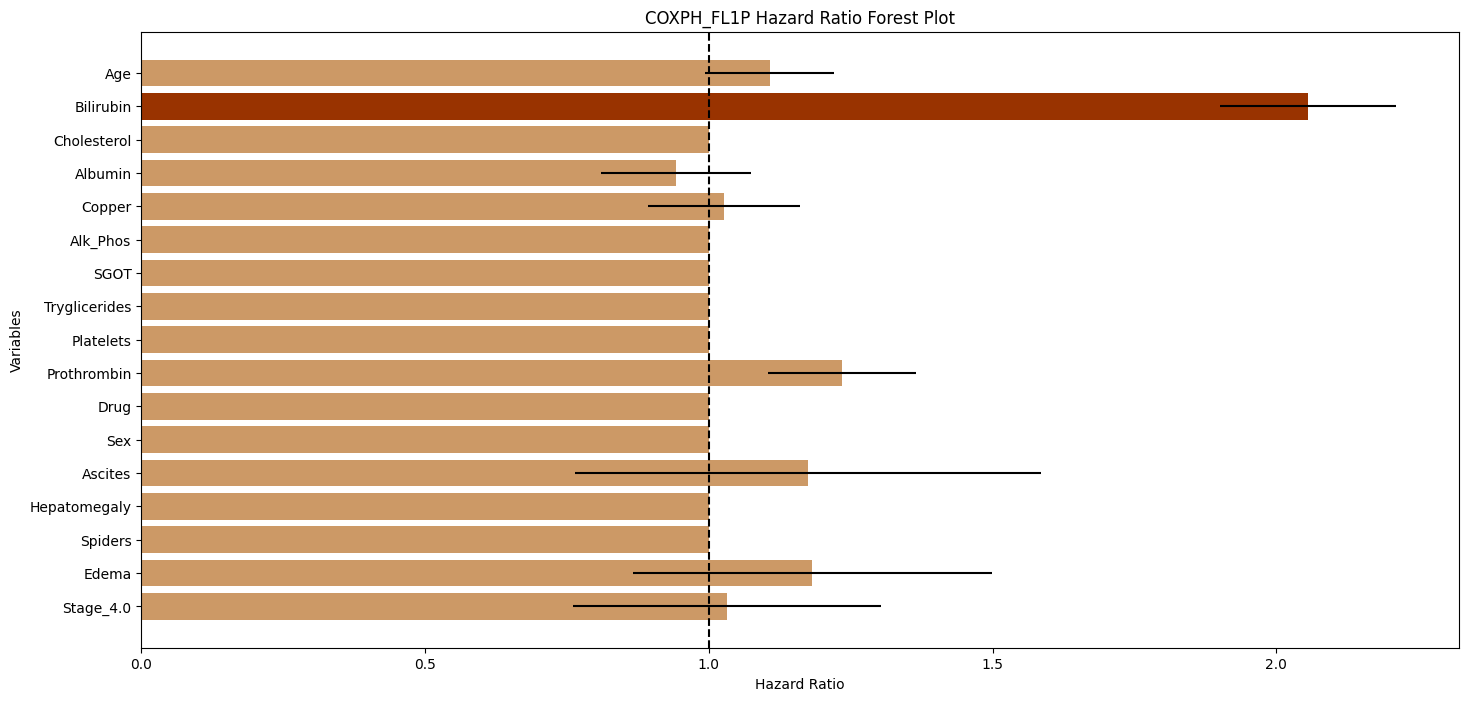

In [158]:
##################################
# Plotting the hazard ratio of the
# formulated Cox Regression model
# with Full L1 Penalty
##################################
cirrhosis_survival_coxph_L1_100_L2_0_summary = cirrhosis_survival_coxph_L1_100_L2_0.summary
cirrhosis_survival_coxph_L1_100_L2_0_summary['hazard_ratio'] = np.exp(cirrhosis_survival_coxph_L1_100_L2_0_summary['coef'])
significant = cirrhosis_survival_coxph_L1_100_L2_0_summary['p'] < 0.05
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]

plt.barh(cirrhosis_survival_coxph_L1_100_L2_0_summary.index, 
         cirrhosis_survival_coxph_L1_100_L2_0_summary['hazard_ratio'], 
         xerr=cirrhosis_survival_coxph_L1_100_L2_0_summary['se(coef)'], 
         color=colors)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('COXPH_FL1P Hazard Ratio Forest Plot')
plt.axvline(x=1, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

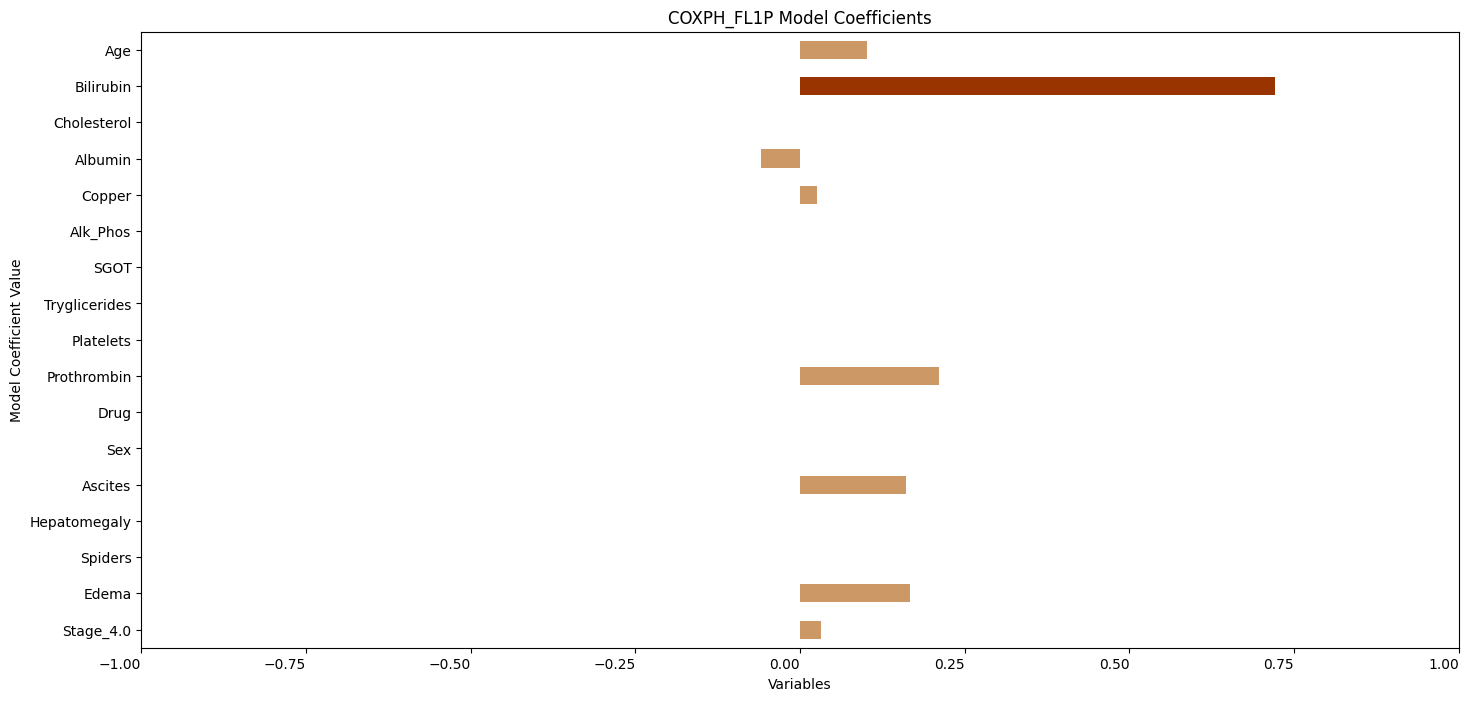

In [159]:
##################################
# Plotting the coefficient magnitude
# of the formulated Cox Regression model
# with Full L1 Penalty
##################################
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]
cirrhosis_survival_coxph_L1_100_L2_0_summary['coef'].plot(kind='barh', color=colors)
plt.xlabel('Variables')
plt.ylabel('Model Coefficient Value')
plt.title('COXPH_FL1P Model Coefficients')
plt.xticks(rotation=0, ha='right')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

In [160]:
##################################
# Determining the number of
# selected and significant predictors
##################################
coxph_L1_100_L2_0_selected = sum((cirrhosis_survival_coxph_L1_100_L2_0_summary['coef']>0.001) | (-cirrhosis_survival_coxph_L1_100_L2_0_summary['coef']>0.001))
coxph_L1_100_L2_0_significant = sum(cirrhosis_survival_coxph_L1_100_L2_0_summary['p'] < 0.05)
display(f"Number of Selected Predictors: {coxph_L1_100_L2_0_selected}, Number of Significant Predictors: {coxph_L1_100_L2_0_significant}")

'Number of Selected Predictors: 8, Number of Significant Predictors: 1'

In [161]:
##################################
# Gathering the apparent model performance
# as baseline for evaluating overfitting
##################################
cirrhosis_survival_coxph_L1_100_L2_0.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
train_predictions = cirrhosis_survival_coxph_L1_100_L2_0.predict_partial_hazard(cirrhosis_survival_train_modeling)
cirrhosis_survival_coxph_L1_100_L2_0_train_ci = concordance_index(cirrhosis_survival_train_modeling['N_Days'], 
                                                                     -train_predictions, 
                                                                     cirrhosis_survival_train_modeling['Status'])
display(f"Apparent Concordance Index: {cirrhosis_survival_coxph_L1_100_L2_0_train_ci}")

'Apparent Concordance Index: 0.8313556566970091'

In [162]:
##################################
# Performing 5-Fold Cross-Validation
# on the training data
##################################
kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
c_index_scores = []

for train_index, val_index in kf.split(cirrhosis_survival_train_modeling):
    df_train_fold = cirrhosis_survival_train_modeling.iloc[train_index]
    df_val_fold = cirrhosis_survival_train_modeling.iloc[val_index]
    
    cirrhosis_survival_coxph_L1_100_L2_0.fit(df_train_fold, duration_col='N_Days', event_col='Status')
    val_predictions = cirrhosis_survival_coxph_L1_100_L2_0.predict_partial_hazard(df_val_fold)
    c_index = concordance_index(df_val_fold['N_Days'], -val_predictions, df_val_fold['Status'])
    c_index_scores.append(c_index)

cirrhosis_survival_coxph_L1_100_L2_0_cv_ci_mean = np.mean(c_index_scores)
cirrhosis_survival_coxph_L1_100_L2_0_cv_ci_std = np.std(c_index_scores)

display(f"Cross-Validated Concordance Index: {cirrhosis_survival_coxph_L1_100_L2_0_cv_ci_mean}")

'Cross-Validated Concordance Index: 0.8111973914136674'

In [163]:
##################################
# Evaluating the model performance
# on test data
##################################
test_predictions = cirrhosis_survival_coxph_L1_100_L2_0.predict_partial_hazard(cirrhosis_survival_test_modeling)
cirrhosis_survival_coxph_L1_100_L2_0_test_ci = concordance_index(cirrhosis_survival_test_modeling['N_Days'], 
                                                                     -test_predictions, 
                                                                     cirrhosis_survival_test_modeling['Status'])
display(f"Test Concordance Index: {cirrhosis_survival_coxph_L1_100_L2_0_test_ci}")

'Test Concordance Index: 0.8426303854875283'

In [164]:
##################################
# Gathering the concordance indices
# from training, cross-validation and test
##################################
coxph_L1_100_L2_0_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_L1_100_L2_0_ci_values = pd.DataFrame([cirrhosis_survival_coxph_L1_100_L2_0_train_ci,
                                           cirrhosis_survival_coxph_L1_100_L2_0_cv_ci_mean,
                                           cirrhosis_survival_coxph_L1_100_L2_0_test_ci])
coxph_L1_100_L2_0_method = pd.DataFrame(["COXPH_FL1P"]*3)
coxph_L1_100_L2_0_summary = pd.concat([coxph_L1_100_L2_0_set, 
                                     coxph_L1_100_L2_0_ci_values,
                                     coxph_L1_100_L2_0_method], 
                                    axis=1)
coxph_L1_100_L2_0_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_L1_100_L2_0_summary.reset_index(inplace=True, drop=True)
display(coxph_L1_100_L2_0_summary)

Set  Concordance.Index      Method
0             Train           0.831356  COXPH_FL1P
1  Cross-Validation           0.811197  COXPH_FL1P
2              Test           0.842630  COXPH_FL1P

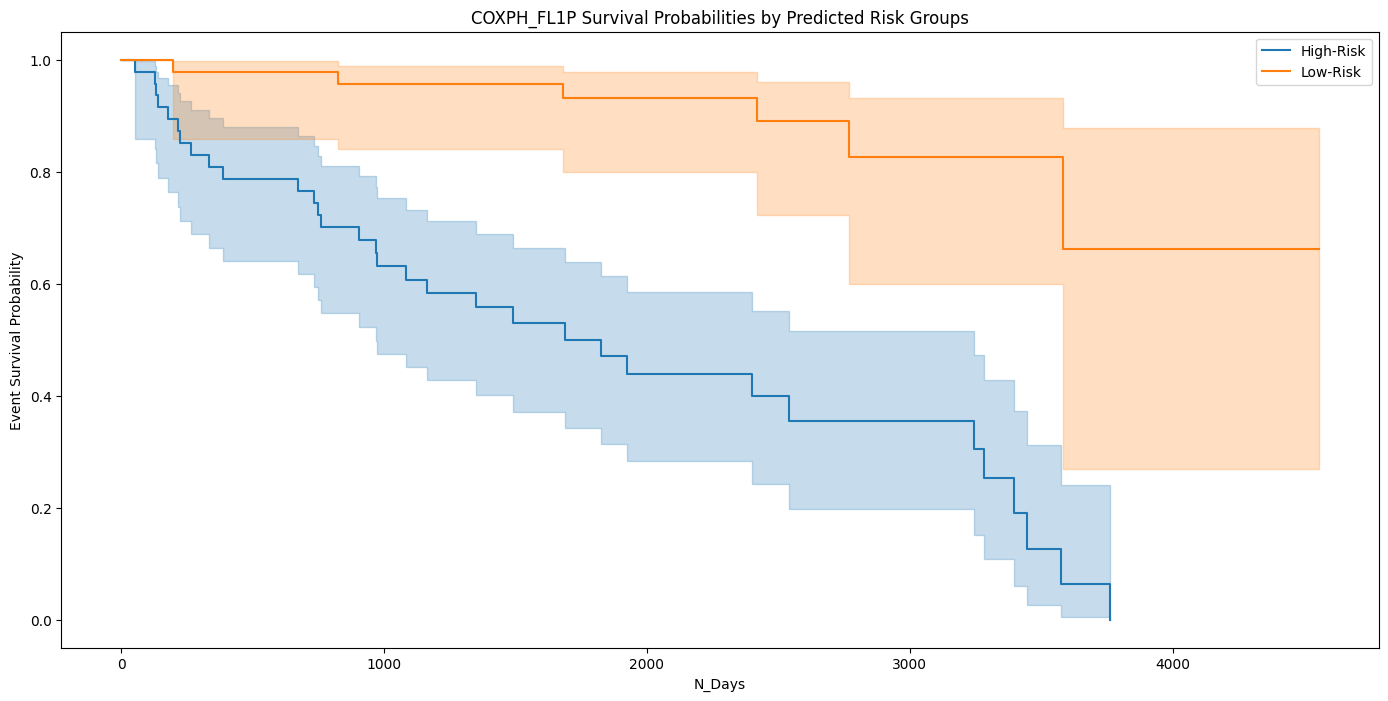

In [165]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_FL1P'] = test_predictions
cirrhosis_survival_test_modeling['Predicted_RiskGroups_COXPH_FL1P'] = risk_groups = pd.qcut(cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_FL1P'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test_modeling[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH_FL1P Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [166]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
10    True    1827  0.226982   1.530100     1.302295  1.331981  1.916467   
20   False    1447 -0.147646   0.061189     0.793618 -1.158235  0.861264   
30   False    2574  0.296370  -1.283677     0.169685  3.237777 -1.008276   
40    True    3762  0.392609  -0.096645    -0.486337  1.903146 -0.546292   
50   False     837 -0.813646   1.089037     0.064451  0.212865  2.063138   

    Alk_Phos      SGOT  Tryglicerides  ...  Sex  Ascites  Hepatomegaly  \
10 -0.477846 -0.451305       2.250260  ...    1        0             1   
20  0.625621  0.319035       0.446026  ...    1        0             0   
30 -0.873566 -0.845549      -0.351236  ...    1        0             0   
40 -0.247141 -0.720619      -0.810790  ...    1        0             1   
50 -0.224432  0.074987       2.333282  ...    1        0             1   

    Spiders  Edema  Stage_4.0  Predicted_Risks_COXPH_NP  \
10        1      0          1                  8.397958   
20        0      0          1                  0.466233   
30        0      0          0                  0.153047   
40        1      0          1                  2.224881   
50        1      0          1                  2.886051   

    Predicted_RiskGroups_COXPH_NP  Predicted_Risks_COXPH_FL1P  \
10                      High-Risk                    3.515780   
20                       Low-Risk                    0.769723   
30                       Low-Risk                    0.320200   
40                      High-Risk                    1.167777   
50                      High-Risk                    1.832490   

    Predicted_RiskGroups_COXPH_FL1P  
10                        High-Risk  
20                         Low-Risk  
30                         Low-Risk  
40                        High-Risk  
50                        High-Risk  

[5 rows x 23 columns]

In [167]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test_modeling.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_COXPH_FL1P']])

   Predicted_RiskGroups_COXPH_FL1P
10                       High-Risk
20                        Low-Risk
30                        Low-Risk
40                       High-Risk
50                       High-Risk


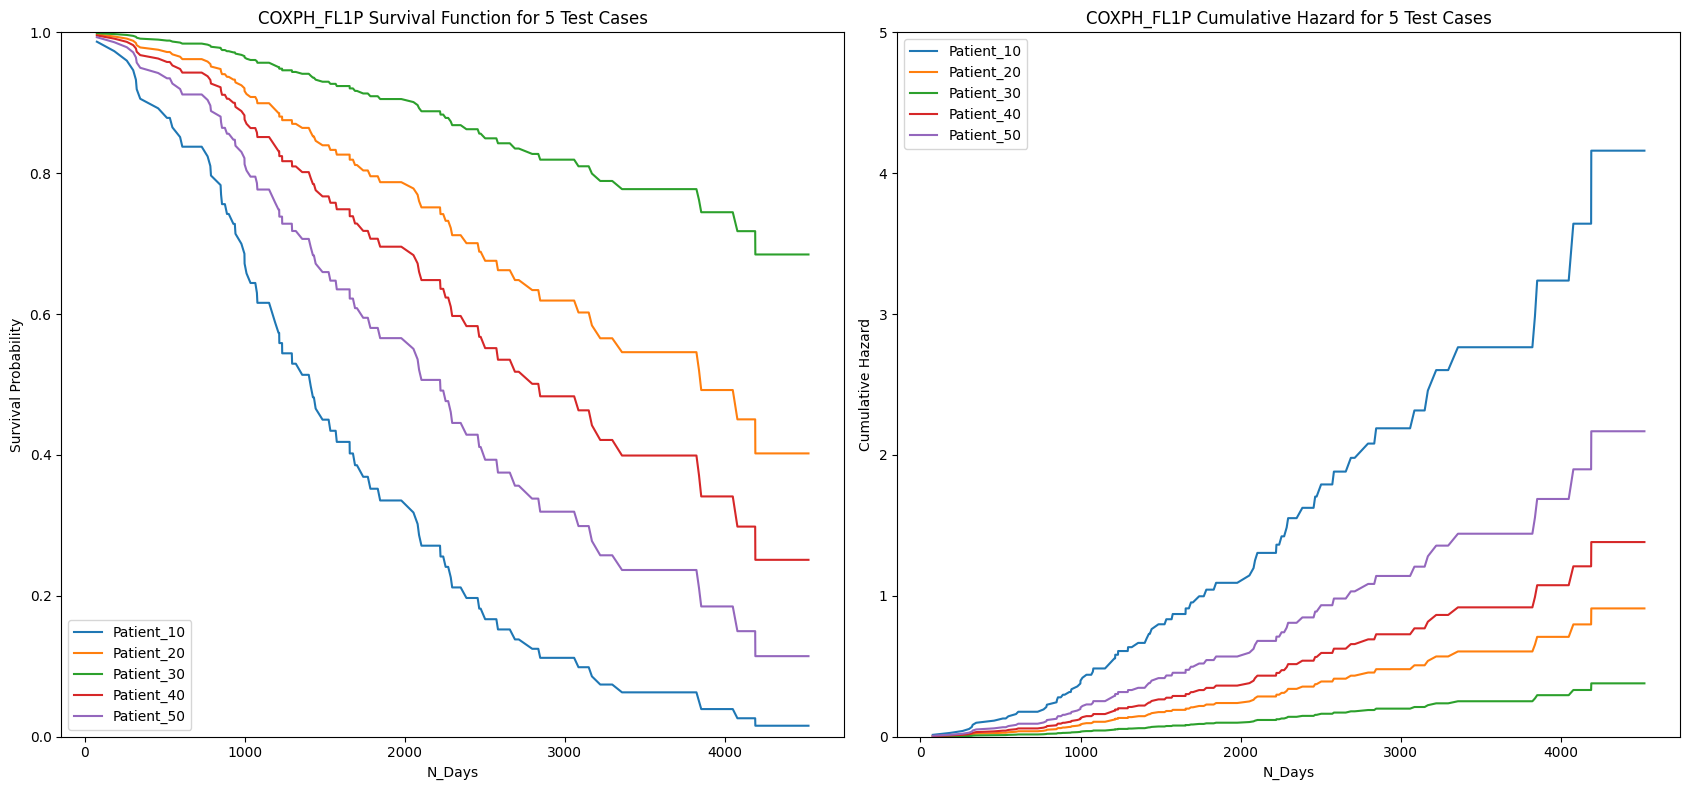

In [168]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50']

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
for i, (index, row) in enumerate(test_case.iterrows()):
    survival_function = cirrhosis_survival_coxph_L1_100_L2_0.predict_survival_function(row.to_frame().T)
    axes[0].plot(survival_function, label=f'Sample {i+1}')
axes[0].set_title('COXPH_FL1P Survival Function for 5 Test Cases')
axes[0].set_xlabel('N_Days')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Survival Probability')
axes[0].legend(test_case_labels, loc="lower left")
for i, (index, row) in enumerate(test_case.iterrows()):
    hazard_function = cirrhosis_survival_coxph_L1_100_L2_0.predict_cumulative_hazard(row.to_frame().T)
    axes[1].plot(hazard_function, label=f'Sample {i+1}')
axes[1].set_title('COXPH_FL1P Cumulative Hazard for 5 Test Cases')
axes[1].set_xlabel('N_Days')
axes[1].set_ylim(0,5)
axes[1].set_ylabel('Cumulative Hazard')
axes[1].legend(test_case_labels, loc="upper left")
plt.tight_layout()
plt.show()

In [169]:
##################################
# Creating the explainer object
##################################
cirrhosis_survival_coxph_L1_100_L2_0_explainer = shap.Explainer(cirrhosis_survival_coxph_L1_100_L2_0.predict_partial_hazard, 
                                                    cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))
cirrhosis_survival_coxph_L1_100_L2_0_shap_values = cirrhosis_survival_coxph_L1_100_L2_0_explainer(cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))

PermutationExplainer explainer: 219it [00:12,  3.75it/s]                                                               


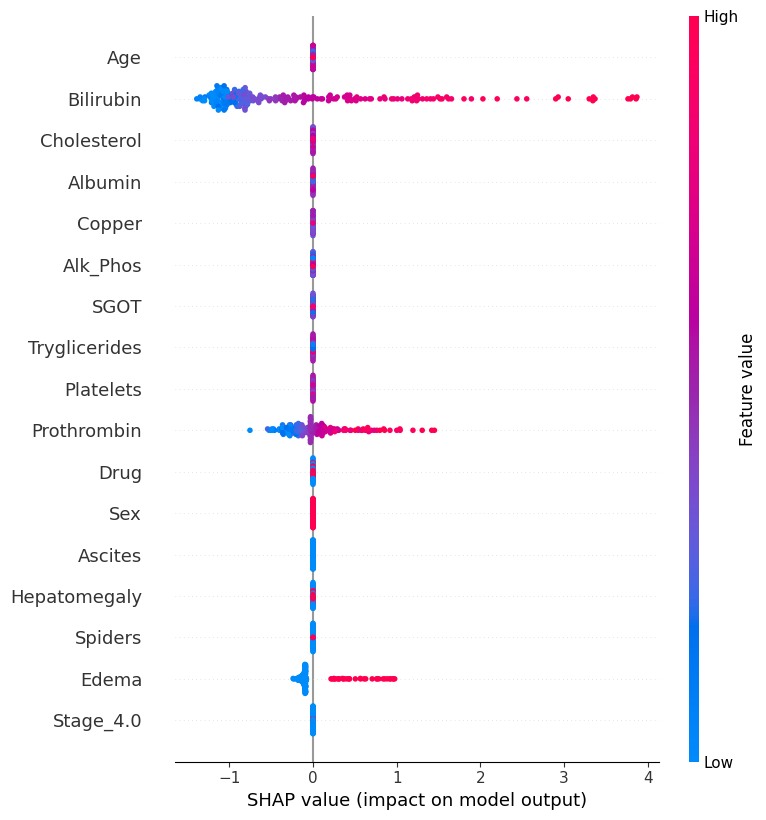

In [170]:
##################################
# Plotting the SHAP summary plot
##################################
shap.summary_plot(cirrhosis_survival_coxph_L1_100_L2_0_shap_values, 
                  cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]),
                  sort=False)

### 1.6.4 Cox Regression With Full L2 Penalty <a class="anchor" id="1.6.4"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[Ridge Penalty](https://lifelines.readthedocs.io/en/latest/), or L2 regularization in cox regression, adds a constraint to the sum of the squared values of the coefficients. The penalized log-likelihood function is composed of the partial likelihood of the cox model, a tuning parameter that controls the strength of the penalty, and the sum of the squared model coefficients. The Ridge penalty shrinks the coefficients towards zero but does not set them exactly to zero, which can be beneficial in dealing with multicollinearity among predictors.

[Concordance Index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html) measures the model's ability to correctly order pairs of observations based on their predicted survival times. Values range from 0.5 to 1.0 indicating no predictive power (random guessing) and perfect predictions, respectively. As a metric, it provides a measure of discriminative ability and useful for ranking predictions. However, it does not provide information on the magnitude of errors and may be insensitive to the calibration of predicted survival probabilities.

1. The [cox proportional hazards regression model](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html) from the <mark style="background-color: #CCECFF"><b>lifelines.CoxPHFitter</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">penalizer</span> = penalty to the size of the coefficients during regression fixed at a value = 0.10
    * <span style="color: #FF0000">l1_ratio</span> = proportion of the L1 versus L2 penalty fixed at a value = 0.00
3. All 17 variables were used for prediction given the non-zero values of the model coefficients.
4. Out of all 17 predictors, only 3 variables were statistically significant:
    * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Prothrombin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Age</span>: Increase in value associated with a more elevated hazard 
5. The cross-validated model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8099
6. The apparent model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8533
7. The independent test model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8675
8. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
9. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
10. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
11. SHAP values were computed for the significant predictors, with contributions to the model output ranked as follows:
    * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Prothrombin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Age</span> result to increased event risk

In [171]:
##################################
# Formulating the Cox Regression model
# with Full L2 Penalty and generating the summary
##################################
cirrhosis_survival_coxph_L1_0_L2_100 = CoxPHFitter(penalizer=0.10, l1_ratio=0.00)
cirrhosis_survival_coxph_L1_0_L2_100.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
cirrhosis_survival_coxph_L1_0_L2_100.print_summary()

<lifelines.CoxPHFitter: fitted with 218 total observations, 131 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 218
number of events observed = 87
   partial log-likelihood = -360.56
         time fit was run = 2024-10-14 07:05:10 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Age            0.27      1.31      0.11            0.06            0.49                1.06                1.63
Bilirubin      0.49      1.63      0.14            0.22            0.77                1.24                2.15
Cholesterol    0.08      1.09      0.12           -0.16            0.32                0.86                1.38
Albumin       -0.14      0.87      0.12           -0.38            0.09                0.69                1.09
Copper         0.16      1.18      0.12           -0.07            0.40                0.93                1.49
Alk_Phos       0.04      1.04      0.12           -0.19            0.27                0.83                1.30
SGOT           0.17      1.19      0.12           -0.06            0.40                0.94                1.49
Tryglicerides  0.10      1.11      0.11           -0.11            0.32                0.89                1.37
Platelets     -0.07      0.93      0.11           -0.27            0.14                0.76                1.15
Prothrombin    0.29      1.34      0.11            0.07            0.52                1.07                1.67
Drug          -0.17      0.85      0.21           -0.57            0.24                0.56                1.28
Sex            0.01      1.01      0.29           -0.55            0.58                0.57                1.79
Ascites        0.23      1.26      0.35           -0.46            0.91                0.63                2.49
Hepatomegaly   0.14      1.15      0.23           -0.31            0.58                0.73                1.79
Spiders        0.03      1.03      0.24           -0.43            0.50                0.65                1.65
Edema          0.51      1.67      0.27           -0.01            1.04                0.99                2.82
Stage_4.0      0.24      1.27      0.24           -0.23            0.71                0.79                2.04

               cmp to     z      p  -log2(p)
covariate                                   
Age              0.00  2.48   0.01      6.25
Bilirubin        0.00  3.50 <0.005     11.08
Cholesterol      0.00  0.68   0.50      1.01
Albumin          0.00 -1.20   0.23      2.13
Copper           0.00  1.34   0.18      2.48
Alk_Phos         0.00  0.34   0.73      0.45
SGOT             0.00  1.47   0.14      2.81
Tryglicerides    0.00  0.92   0.36      1.49
Platelets        0.00 -0.64   0.52      0.94
Prothrombin      0.00  2.54   0.01      6.51
Drug             0.00 -0.79   0.43      1.23
Sex              0.00  0.05   0.96      0.06
Ascites          0.00  0.66   0.51      0.97
Hepatomegaly     0.00  0.60   0.55      0.87
Spiders          0.00  0.14   0.89      0.17
Edema            0.00  1.91   0.06      4.16
Stage_4.0        0.00  0.99   0.32      1.63
---
Concordance = 0.85
Partial AIC = 755.12
log-likelihood ratio test = 113.61 on 17 df
-log2(p) of ll-ratio test = 51.82

In [172]:
##################################
# Consolidating the detailed values
# of the model coefficients
##################################
cirrhosis_survival_coxph_L1_0_L2_100.summary

coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                      
Age            0.273503   1.314562  0.110305        0.057310        0.489697   
Bilirubin      0.491176   1.634238  0.140256        0.216279        0.766073   
Cholesterol    0.081915   1.085364  0.120941       -0.155125        0.318956   
Albumin       -0.143698   0.866150  0.119365       -0.377650        0.090254   
Copper         0.163286   1.177373  0.121420       -0.074692        0.401264   
Alk_Phos       0.039447   1.040236  0.115607       -0.187139        0.266034   
SGOT           0.171530   1.187119  0.116855       -0.057501        0.400561   
Tryglicerides  0.100959   1.106231  0.109604       -0.113861        0.315779   
Platelets     -0.067680   0.934559  0.105398       -0.274257        0.138897   
Prothrombin    0.290927   1.337667  0.114357        0.066792        0.515062   
Drug          -0.165487   0.847480  0.208410       -0.573964        0.242989   
Sex            0.013801   1.013897  0.289483       -0.553576        0.581178   
Ascites        0.229115   1.257486  0.349057       -0.455025        0.913254   
Hepatomegaly   0.136962   1.146785  0.227782       -0.309482        0.583406   
Spiders        0.032709   1.033250  0.238344       -0.434436        0.499855   
Edema          0.512456   1.669387  0.268173       -0.013154        1.038067   
Stage_4.0      0.238038   1.268758  0.241160       -0.234626        0.710703   

               exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                   
Age                       1.058984             1.631822     0.0  2.479520   
Bilirubin                 1.241449             2.151303     0.0  3.501995   
Cholesterol               0.856308             1.375691     0.0  0.677314   
Albumin                   0.685471             1.094452     0.0 -1.203847   
Copper                    0.928029             1.493712     0.0  1.344807   
Alk_Phos                  0.829328             1.304779     0.0  0.341217   
SGOT                      0.944121             1.492661     0.0  1.467888   
Tryglicerides             0.892382             1.371327     0.0  0.921122   
Platelets                 0.760137             1.149006     0.0 -0.642136   
Prothrombin               1.069073             1.673742     0.0  2.544032   
Drug                      0.563288             1.275055     0.0 -0.794046   
Sex                       0.574890             1.788144     0.0  0.047674   
Ascites                   0.634432             2.492420     0.0  0.656382   
Hepatomegaly              0.733827             1.792132     0.0  0.601287   
Spiders                   0.647630             1.648482     0.0  0.137235   
Edema                     0.986932             2.823753     0.0  1.910914   
Stage_4.0                 0.790866             2.035421     0.0  0.987056   

                      p   -log2(p)  
covariate                           
Age            0.013156   6.248144  
Bilirubin      0.000462  11.080482  
Cholesterol    0.498207   1.005184  
Albumin        0.228649   2.128796  
Copper         0.178687   2.484490  
Alk_Phos       0.732941   0.448232  
SGOT           0.142135   2.814669  
Tryglicerides  0.356987   1.486058  
Platelets      0.520785   0.941240  
Prothrombin    0.010958   6.511858  
Drug           0.427168   1.227123  
Sex            0.961976   0.055928  
Ascites        0.511579   0.966972  
Hepatomegaly   0.547649   0.868676  
Spiders        0.890845   0.166753  
Edema          0.056016   4.158026  
Stage_4.0      0.323615   1.627650

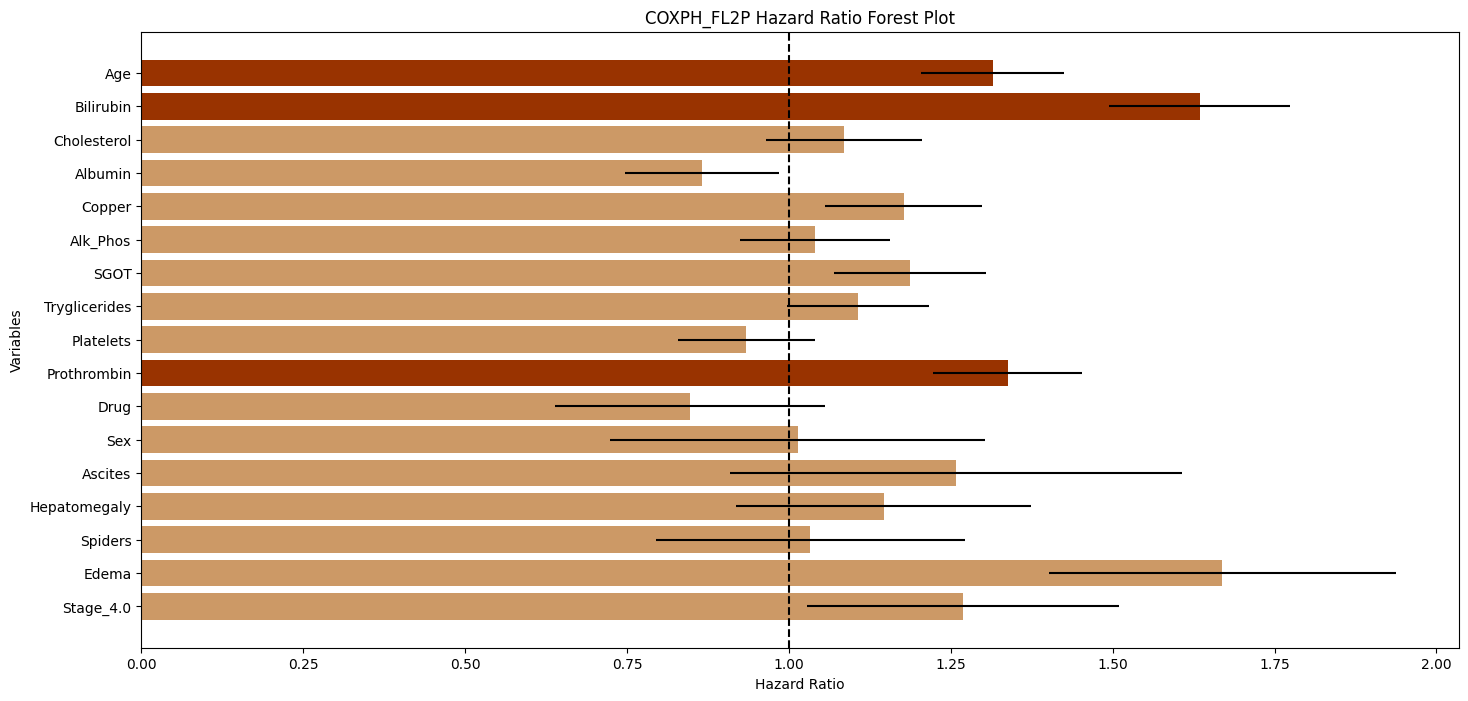

In [173]:
##################################
# Plotting the hazard ratio of the
# formulated Cox Regression model
# with Full L2 Penalty
##################################
cirrhosis_survival_coxph_L1_0_L2_100_summary = cirrhosis_survival_coxph_L1_0_L2_100.summary
cirrhosis_survival_coxph_L1_0_L2_100_summary['hazard_ratio'] = np.exp(cirrhosis_survival_coxph_L1_0_L2_100_summary['coef'])
significant = cirrhosis_survival_coxph_L1_0_L2_100_summary['p'] < 0.05
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]

plt.barh(cirrhosis_survival_coxph_L1_0_L2_100_summary.index, 
         cirrhosis_survival_coxph_L1_0_L2_100_summary['hazard_ratio'], 
         xerr=cirrhosis_survival_coxph_L1_0_L2_100_summary['se(coef)'], 
         color=colors)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('COXPH_FL2P Hazard Ratio Forest Plot')
plt.axvline(x=1, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

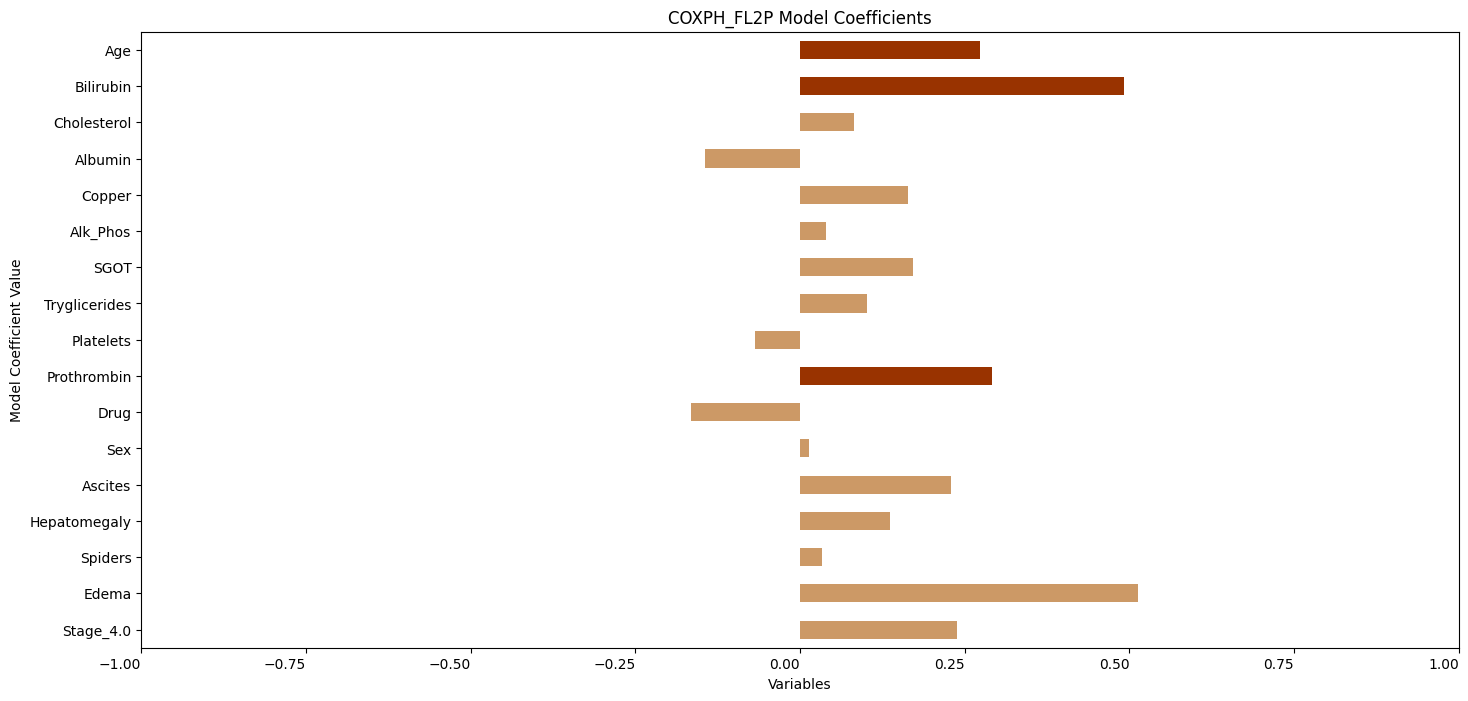

In [174]:
##################################
# Plotting the coefficient magnitude
# of the formulated Cox Regression model
# with Full L2 Penalty
##################################
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]
cirrhosis_survival_coxph_L1_0_L2_100_summary['coef'].plot(kind='barh', color=colors)
plt.xlabel('Variables')
plt.ylabel('Model Coefficient Value')
plt.title('COXPH_FL2P Model Coefficients')
plt.xticks(rotation=0, ha='right')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

In [175]:
##################################
# Determining the number of
# selected and significant predictors
##################################
coxph_L1_0_L2_100_selected = sum((cirrhosis_survival_coxph_L1_0_L2_100_summary['coef']>0.001) | (-cirrhosis_survival_coxph_L1_0_L2_100_summary['coef']>0.001))
coxph_L1_0_L2_100_significant = sum(cirrhosis_survival_coxph_L1_0_L2_100_summary['p'] < 0.05)
display(f"Number of Selected Predictors: {coxph_L1_0_L2_100_selected}, Number of Significant Predictors: {coxph_L1_0_L2_100_significant}")

'Number of Selected Predictors: 17, Number of Significant Predictors: 3'

In [176]:
##################################
# Gathering the apparent model performance
# as baseline for evaluating overfitting
##################################
cirrhosis_survival_coxph_L1_0_L2_100.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
train_predictions = cirrhosis_survival_coxph_L1_0_L2_100.predict_partial_hazard(cirrhosis_survival_train_modeling)
cirrhosis_survival_coxph_L1_0_L2_100_train_ci = concordance_index(cirrhosis_survival_train_modeling['N_Days'], 
                                                                     -train_predictions, 
                                                                     cirrhosis_survival_train_modeling['Status'])
display(f"Apparent Concordance Index: {cirrhosis_survival_coxph_L1_0_L2_100_train_ci}")

'Apparent Concordance Index: 0.8533810143042913'

In [177]:
##################################
# Performing 5-Fold Cross-Validation
# on the training data
##################################
kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
c_index_scores = []

for train_index, val_index in kf.split(cirrhosis_survival_train_modeling):
    df_train_fold = cirrhosis_survival_train_modeling.iloc[train_index]
    df_val_fold = cirrhosis_survival_train_modeling.iloc[val_index]
    
    cirrhosis_survival_coxph_L1_0_L2_100.fit(df_train_fold, duration_col='N_Days', event_col='Status')
    val_predictions = cirrhosis_survival_coxph_L1_0_L2_100.predict_partial_hazard(df_val_fold)
    c_index = concordance_index(df_val_fold['N_Days'], -val_predictions, df_val_fold['Status'])
    c_index_scores.append(c_index)

cirrhosis_survival_coxph_L1_0_L2_100_cv_ci_mean = np.mean(c_index_scores)
cirrhosis_survival_coxph_L1_0_L2_100_cv_ci_std = np.std(c_index_scores)

display(f"Cross-Validated Concordance Index: {cirrhosis_survival_coxph_L1_0_L2_100_cv_ci_mean}")

'Cross-Validated Concordance Index: 0.8099834493754214'

In [178]:
##################################
# Evaluating the model performance
# on test data
##################################
test_predictions = cirrhosis_survival_coxph_L1_0_L2_100.predict_partial_hazard(cirrhosis_survival_test_modeling)
cirrhosis_survival_coxph_L1_0_L2_100_test_ci = concordance_index(cirrhosis_survival_test_modeling['N_Days'], 
                                                                     -test_predictions, 
                                                                     cirrhosis_survival_test_modeling['Status'])
display(f"Test Concordance Index: {cirrhosis_survival_coxph_L1_0_L2_100_test_ci}")

'Test Concordance Index: 0.8675736961451247'

In [179]:
##################################
# Gathering the concordance indices
# from training, cross-validation and test
##################################
coxph_L1_0_L2_100_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_L1_0_L2_100_ci_values = pd.DataFrame([cirrhosis_survival_coxph_L1_0_L2_100_train_ci,
                                           cirrhosis_survival_coxph_L1_0_L2_100_cv_ci_mean,
                                           cirrhosis_survival_coxph_L1_0_L2_100_test_ci])
coxph_L1_0_L2_100_method = pd.DataFrame(["COXPH_FL2P"]*3)
coxph_L1_0_L2_100_summary = pd.concat([coxph_L1_0_L2_100_set, 
                                     coxph_L1_0_L2_100_ci_values,
                                     coxph_L1_0_L2_100_method], 
                                    axis=1)
coxph_L1_0_L2_100_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_L1_0_L2_100_summary.reset_index(inplace=True, drop=True)
display(coxph_L1_0_L2_100_summary)

Set  Concordance.Index      Method
0             Train           0.853381  COXPH_FL2P
1  Cross-Validation           0.809983  COXPH_FL2P
2              Test           0.867574  COXPH_FL2P

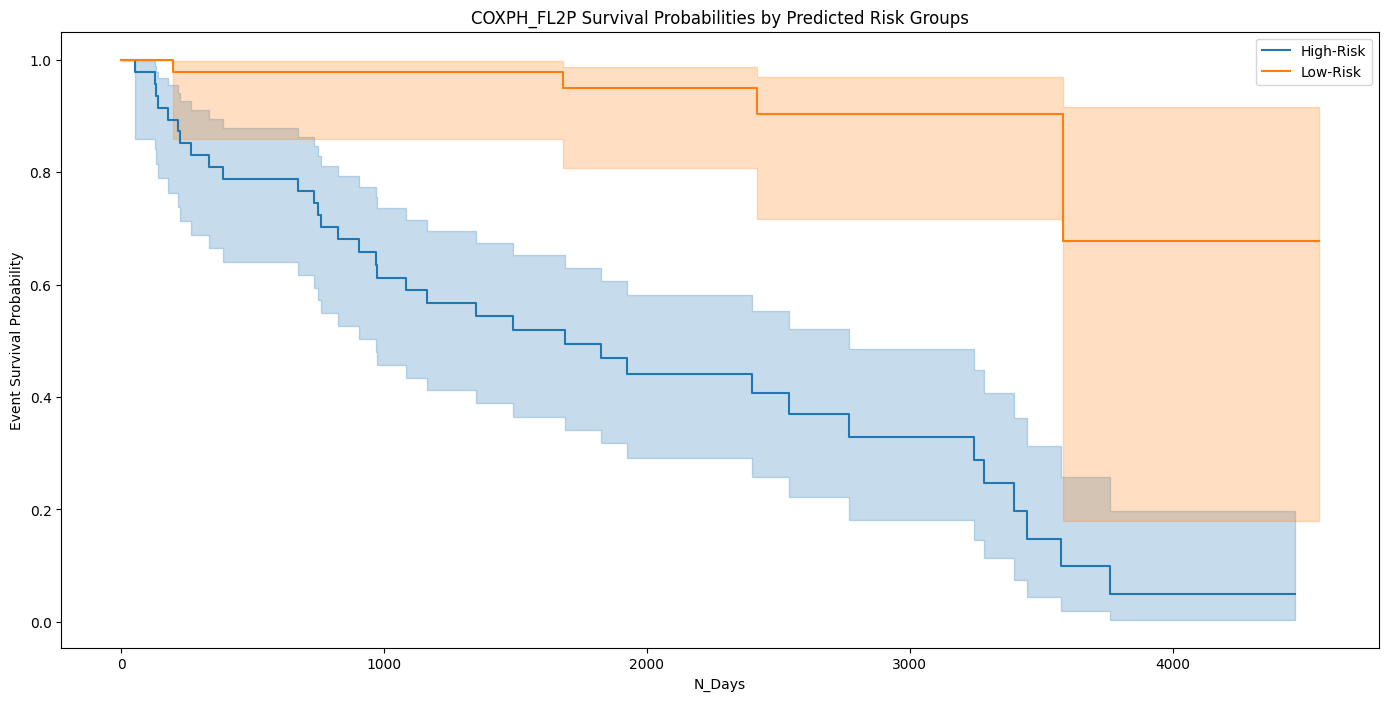

In [180]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_FL2P'] = test_predictions
cirrhosis_survival_test_modeling['Predicted_RiskGroups_COXPH_FL2P'] = risk_groups = pd.qcut(cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_FL2P'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test_modeling[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH_FL2P Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [181]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
10    True    1827  0.226982   1.530100     1.302295  1.331981  1.916467   
20   False    1447 -0.147646   0.061189     0.793618 -1.158235  0.861264   
30   False    2574  0.296370  -1.283677     0.169685  3.237777 -1.008276   
40    True    3762  0.392609  -0.096645    -0.486337  1.903146 -0.546292   
50   False     837 -0.813646   1.089037     0.064451  0.212865  2.063138   

    Alk_Phos      SGOT  Tryglicerides  ...  Hepatomegaly  Spiders  Edema  \
10 -0.477846 -0.451305       2.250260  ...             1        1      0   
20  0.625621  0.319035       0.446026  ...             0        0      0   
30 -0.873566 -0.845549      -0.351236  ...             0        0      0   
40 -0.247141 -0.720619      -0.810790  ...             1        1      0   
50 -0.224432  0.074987       2.333282  ...             1        1      0   

    Stage_4.0  Predicted_Risks_COXPH_NP  Predicted_RiskGroups_COXPH_NP  \
10          1                  8.397958                      High-Risk   
20          1                  0.466233                       Low-Risk   
30          0                  0.153047                       Low-Risk   
40          1                  2.224881                      High-Risk   
50          1                  2.886051                      High-Risk   

    Predicted_Risks_COXPH_FL1P  Predicted_RiskGroups_COXPH_FL1P  \
10                    3.515780                        High-Risk   
20                    0.769723                         Low-Risk   
30                    0.320200                         Low-Risk   
40                    1.167777                        High-Risk   
50                    1.832490                        High-Risk   

    Predicted_Risks_COXPH_FL2P  Predicted_RiskGroups_COXPH_FL2P  
10                    4.748349                        High-Risk  
20                    0.681968                         Low-Risk  
30                    0.165574                         Low-Risk  
40                    1.591530                        High-Risk  
50                    2.541904                        High-Risk  

[5 rows x 25 columns]

In [182]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test_modeling.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_COXPH_FL2P']])

   Predicted_RiskGroups_COXPH_FL2P
10                       High-Risk
20                        Low-Risk
30                        Low-Risk
40                       High-Risk
50                       High-Risk


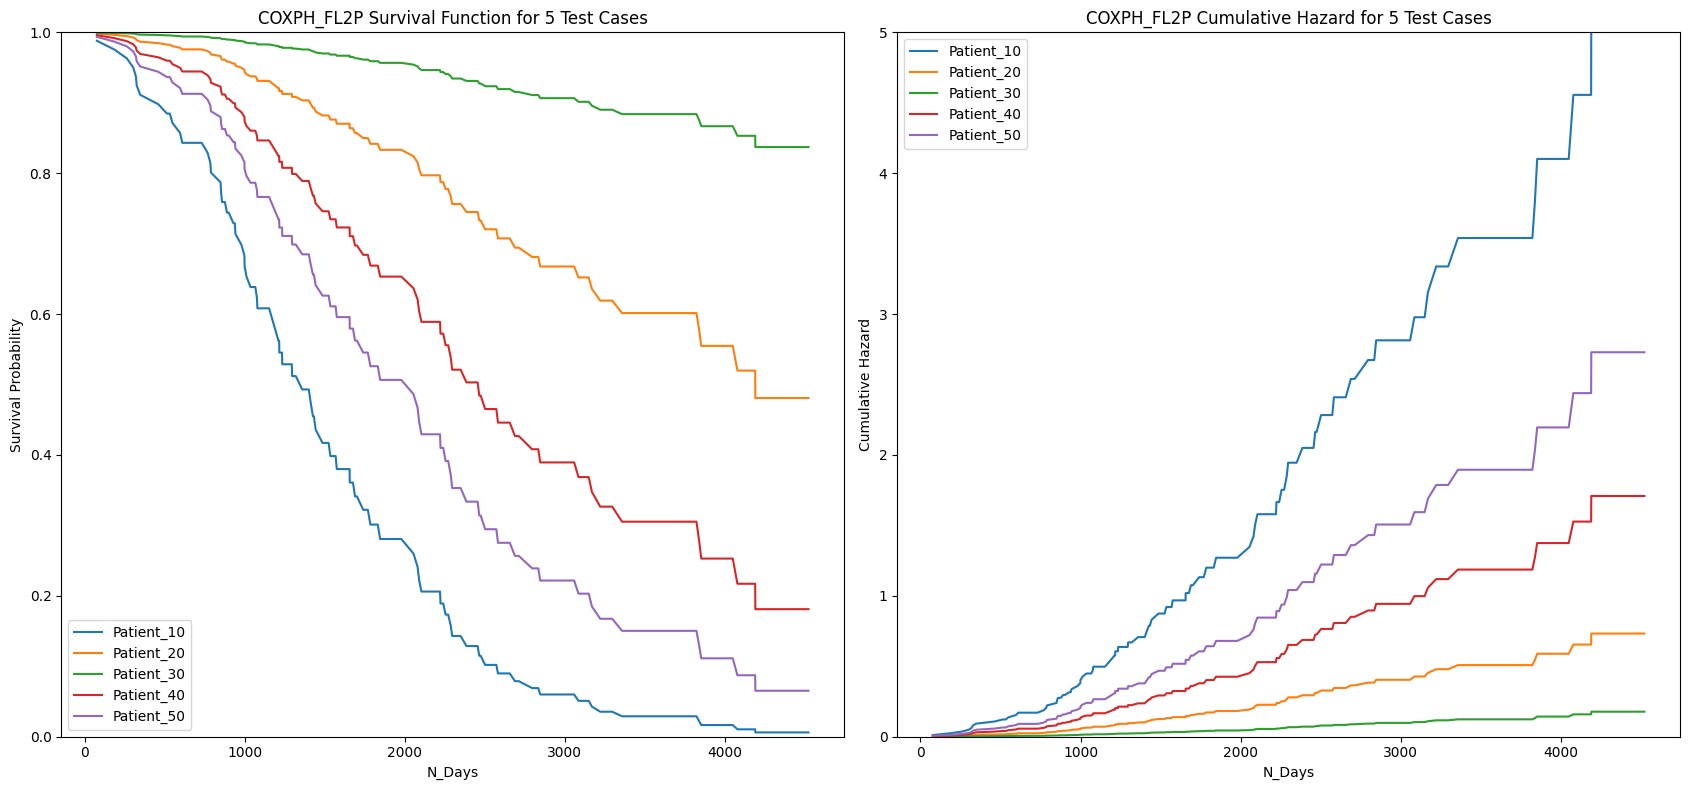

In [183]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50']

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
for i, (index, row) in enumerate(test_case.iterrows()):
    survival_function = cirrhosis_survival_coxph_L1_0_L2_100.predict_survival_function(row.to_frame().T)
    axes[0].plot(survival_function, label=f'Sample {i+1}')
axes[0].set_title('COXPH_FL2P Survival Function for 5 Test Cases')
axes[0].set_xlabel('N_Days')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Survival Probability')
axes[0].legend(test_case_labels, loc="lower left")
for i, (index, row) in enumerate(test_case.iterrows()):
    hazard_function = cirrhosis_survival_coxph_L1_0_L2_100.predict_cumulative_hazard(row.to_frame().T)
    axes[1].plot(hazard_function, label=f'Sample {i+1}')
axes[1].set_title('COXPH_FL2P Cumulative Hazard for 5 Test Cases')
axes[1].set_xlabel('N_Days')
axes[1].set_ylim(0,5)
axes[1].set_ylabel('Cumulative Hazard')
axes[1].legend(test_case_labels, loc="upper left")
plt.tight_layout()
plt.show()

In [184]:
##################################
# Creating the explainer object
##################################
cirrhosis_survival_coxph_L1_0_L2_100_explainer = shap.Explainer(cirrhosis_survival_coxph_L1_0_L2_100.predict_partial_hazard, 
                                                    cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))
cirrhosis_survival_coxph_L1_0_L2_100_shap_values = cirrhosis_survival_coxph_L1_0_L2_100_explainer(cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))

PermutationExplainer explainer: 219it [00:13,  4.58it/s]                                                               


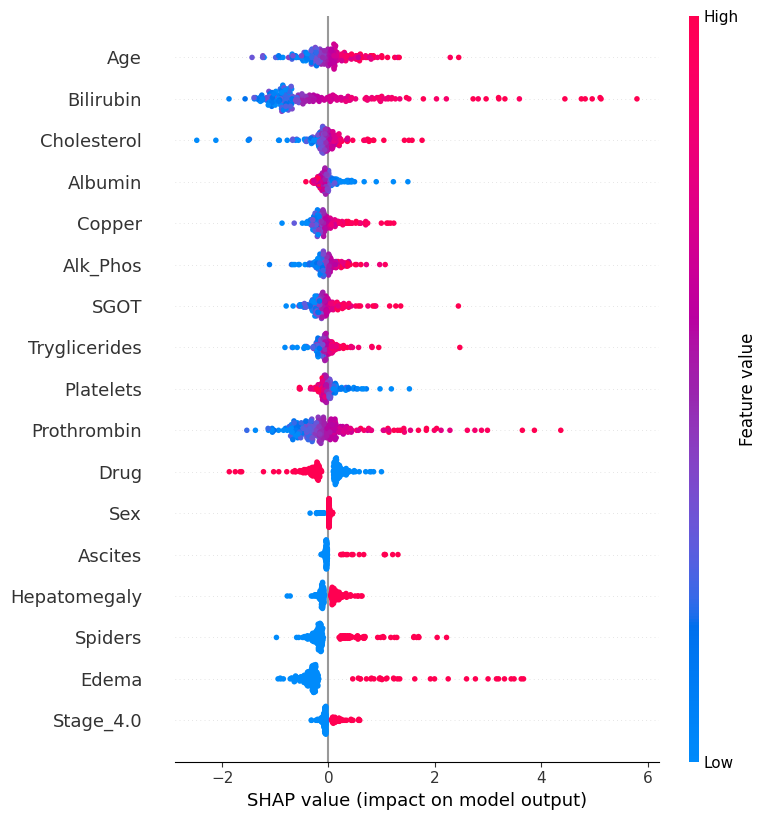

In [185]:
##################################
# Plotting the SHAP summary plot
##################################
shap.summary_plot(cirrhosis_survival_coxph_L1_0_L2_100_shap_values, 
                  cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]),
                  sort=False)

### 1.6.5 Cox Regression With Equal L1 | L2 Penalty <a class="anchor" id="1.6.5"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[Elastic Net Penalty](https://lifelines.readthedocs.io/en/latest/), or combined L1 and L2 regularization in cox regression, adds a constraint to both the sum of the absolute and squared values of the coefficients. The penalized log-likelihood function is composed of the partial likelihood of the cox model, a tuning parameter that controls the strength of both lasso and ridge penalties, the sum of the absolute model coefficients, and the sum of the squared model coefficients. The Elastic Net penalty combines the benefits of both Lasso and Ridge, promoting sparsity while also dealing with multicollinearity.

[Concordance Index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html) measures the model's ability to correctly order pairs of observations based on their predicted survival times. Values range from 0.5 to 1.0 indicating no predictive power (random guessing) and perfect predictions, respectively. As a metric, it provides a measure of discriminative ability and useful for ranking predictions. However, it does not provide information on the magnitude of errors and may be insensitive to the calibration of predicted survival probabilities.

1. The [cox proportional hazards regression model](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html) from the <mark style="background-color: #CCECFF"><b>lifelines.CoxPHFitter</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">penalizer</span> = penalty to the size of the coefficients during regression fixed at a value = 0.10
    * <span style="color: #FF0000">l1_ratio</span> = proportion of the L1 versus L2 penalty fixed at a value = 0.50
3. Only 10 out of the 17 variables were used for prediction given the non-zero values of the model coefficients.
4. Out of all 10 predictors, only 2 variables were statistically significant:
    * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Prothrombin</span>: Increase in value associated with a more elevated hazard 
5. The cross-validated model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8162
6. The apparent model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8465
7. The independent test model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8630
8. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of minimal model overfitting.
9. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
10. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
11. SHAP values were computed for the significant predictors, with contributions to the model output ranked as follows:
    * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Prothrombin</span> result to increased event risk

In [186]:
##################################
# Formulating the Cox Regression model
# with Equal L1 and l2 Penalty
# and generating the summary
##################################
cirrhosis_survival_coxph_L1_50_L2_50 = CoxPHFitter(penalizer=0.10, l1_ratio=0.50)
cirrhosis_survival_coxph_L1_50_L2_50.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
cirrhosis_survival_coxph_L1_50_L2_50.print_summary()

<lifelines.CoxPHFitter: fitted with 218 total observations, 131 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 0.5
      baseline estimation = breslow
   number of observations = 218
number of events observed = 87
   partial log-likelihood = -378.64
         time fit was run = 2024-10-14 07:05:26 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Age            0.17      1.19      0.11           -0.03            0.38                0.97                1.46
Bilirubin      0.62      1.86      0.15            0.32            0.92                1.38                2.52
Cholesterol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Albumin       -0.11      0.90      0.12           -0.35            0.14                0.70                1.15
Copper         0.12      1.13      0.12           -0.11            0.36                0.89                1.44
Alk_Phos       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SGOT           0.05      1.06      0.12           -0.19            0.30                0.83                1.34
Tryglicerides  0.05      1.05      0.11           -0.17            0.26                0.85                1.30
Platelets     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Prothrombin    0.25      1.29      0.12            0.01            0.49                1.01                1.63
Drug          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Sex           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Ascites        0.18      1.20      0.37           -0.54            0.91                0.58                2.47
Hepatomegaly   0.00      1.00      0.24           -0.47            0.47                0.63                1.60
Spiders        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Edema          0.36      1.44      0.28           -0.18            0.91                0.83                2.48
Stage_4.0      0.15      1.16      0.26           -0.35            0.66                0.70                1.93

               cmp to     z      p  -log2(p)
covariate                                   
Age              0.00  1.64   0.10      3.30
Bilirubin        0.00  4.07 <0.005     14.38
Cholesterol      0.00  0.00   1.00      0.00
Albumin          0.00 -0.86   0.39      1.35
Copper           0.00  1.03   0.30      1.72
Alk_Phos         0.00  0.00   1.00      0.00
SGOT             0.00  0.44   0.66      0.60
Tryglicerides    0.00  0.43   0.67      0.58
Platelets        0.00 -0.00   1.00      0.00
Prothrombin      0.00  2.07   0.04      4.71
Drug             0.00 -0.00   1.00      0.00
Sex              0.00 -0.00   1.00      0.00
Ascites          0.00  0.50   0.62      0.70
Hepatomegaly     0.00  0.00   1.00      0.00
Spiders          0.00  0.00   1.00      0.00
Edema            0.00  1.31   0.19      2.39
Stage_4.0        0.00  0.59   0.56      0.85
---
Concordance = 0.85
Partial AIC = 791.29
log-likelihood ratio test = 77.44 on 17 df
-log2(p) of ll-ratio test = 29.78

In [187]:
##################################
# Consolidating the detailed values
# of the model coefficients
##################################
cirrhosis_survival_coxph_L1_50_L2_50.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                          
Age            1.735119e-01   1.189475  0.105893       -0.034035   
Bilirubin      6.232373e-01   1.864956  0.153110        0.323146   
Cholesterol    1.027031e-07   1.000000  0.000158       -0.000310   
Albumin       -1.062850e-01   0.899168  0.124211       -0.349734   
Copper         1.247938e-01   1.132915  0.121539       -0.113419   
Alk_Phos       1.833222e-07   1.000000  0.000194       -0.000380   
SGOT           5.418539e-02   1.055680  0.123088       -0.187063   
Tryglicerides  4.676406e-02   1.047875  0.108783       -0.166447   
Platelets     -6.958869e-07   0.999999  0.001610       -0.003157   
Prothrombin    2.508953e-01   1.285176  0.121104        0.013535   
Drug          -1.917876e-07   1.000000  0.000314       -0.000615   
Sex           -3.698238e-07   1.000000  0.000495       -0.000970   
Ascites        1.846251e-01   1.202767  0.367758       -0.536167   
Hepatomegaly   5.622110e-04   1.000562  0.238476       -0.466841   
Spiders        3.890060e-07   1.000000  0.000424       -0.000831   
Edema          3.639376e-01   1.438984  0.278544       -0.182000   
Stage_4.0      1.520894e-01   1.164264  0.258242       -0.354055   

               coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                 
Age                  0.381059             0.966538             1.463834   
Bilirubin            0.923328             1.381468             2.517655   
Cholesterol          0.000311             0.999690             1.000311   
Albumin              0.137164             0.704875             1.147017   
Copper               0.363006             0.892777             1.437645   
Alk_Phos             0.000380             0.999620             1.000380   
SGOT                 0.295434             0.829391             1.343710   
Tryglicerides        0.259975             0.846668             1.296898   
Platelets            0.003155             0.996848             1.003160   
Prothrombin          0.488255             1.013627             1.629471   
Drug                 0.000614             0.999385             1.000615   
Sex                  0.000969             0.999030             1.000970   
Ascites              0.905418             0.584986             2.472964   
Hepatomegaly         0.467966             0.626980             1.596743   
Spiders              0.000832             0.999169             1.000832   
Edema                0.909875             0.833602             2.484011   
Stage_4.0            0.658234             0.701836             1.931379   

               cmp to         z         p   -log2(p)  
covariate                                             
Age               0.0  1.638554  0.101306   3.303207  
Bilirubin         0.0  4.070510  0.000047  14.379736  
Cholesterol       0.0  0.000648  0.999483   0.000746  
Albumin           0.0 -0.855681  0.392175   1.350432  
Copper            0.0  1.026777  0.304525   1.715365  
Alk_Phos          0.0  0.000945  0.999246   0.001089  
SGOT              0.0  0.440215  0.659781   0.599941  
Tryglicerides     0.0  0.429883  0.667280   0.583635  
Platelets         0.0 -0.000432  0.999655   0.000498  
Prothrombin       0.0  2.071730  0.038291   4.706865  
Drug              0.0 -0.000612  0.999512   0.000704  
Sex               0.0 -0.000748  0.999404   0.000861  
Ascites           0.0  0.502029  0.615647   0.699824  
Hepatomegaly      0.0  0.002358  0.998119   0.002716  
Spiders           0.0  0.000917  0.999268   0.001056  
Edema             0.0  1.306569  0.191359   2.385645  
Stage_4.0         0.0  0.588942  0.555900   0.847102

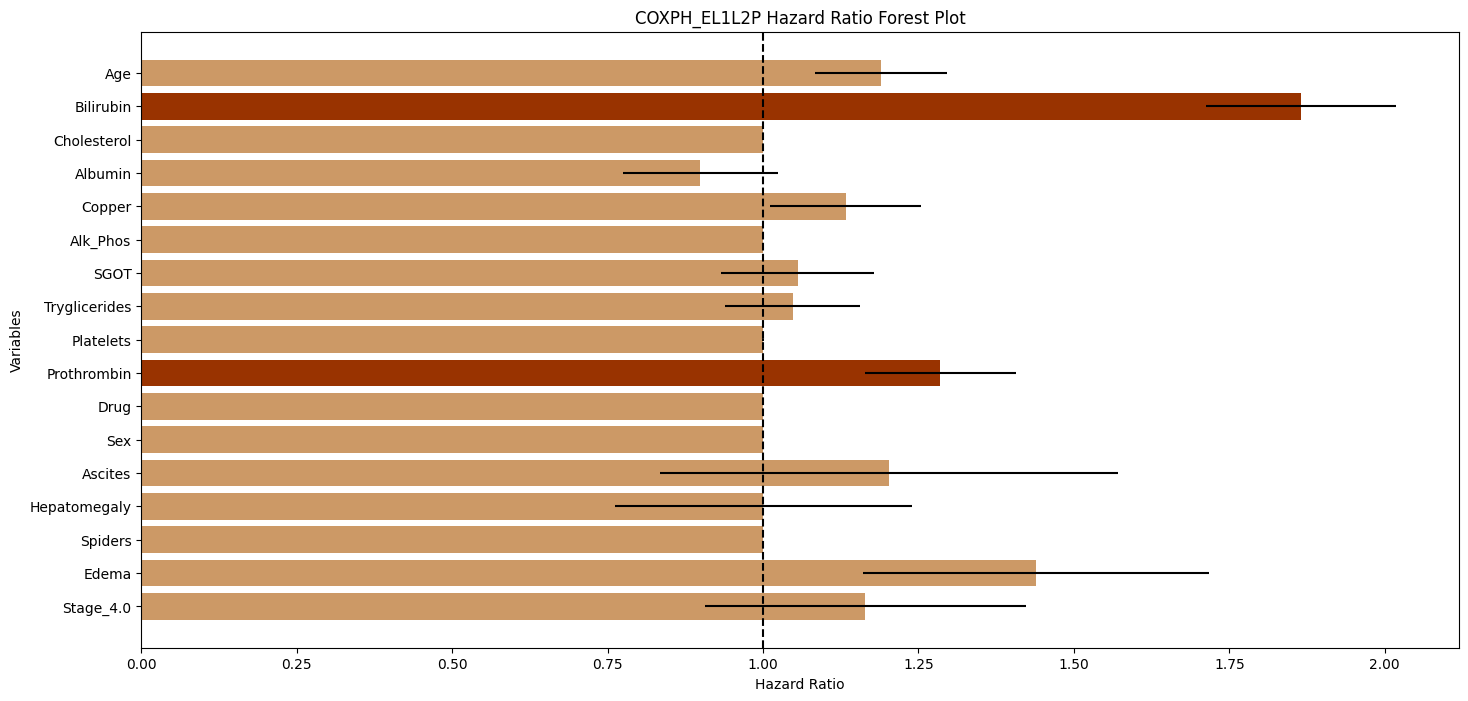

In [188]:
##################################
# Plotting the hazard ratio of the
# formulated Cox Regression model
# with Equal L1 and l2 Penalty
##################################
cirrhosis_survival_coxph_L1_50_L2_50_summary = cirrhosis_survival_coxph_L1_50_L2_50.summary
cirrhosis_survival_coxph_L1_50_L2_50_summary['hazard_ratio'] = np.exp(cirrhosis_survival_coxph_L1_50_L2_50_summary['coef'])
significant = cirrhosis_survival_coxph_L1_50_L2_50_summary['p'] < 0.05
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]

plt.barh(cirrhosis_survival_coxph_L1_50_L2_50_summary.index, 
         cirrhosis_survival_coxph_L1_50_L2_50_summary['hazard_ratio'], 
         xerr=cirrhosis_survival_coxph_L1_50_L2_50_summary['se(coef)'], 
         color=colors)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('COXPH_EL1L2P Hazard Ratio Forest Plot')
plt.axvline(x=1, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

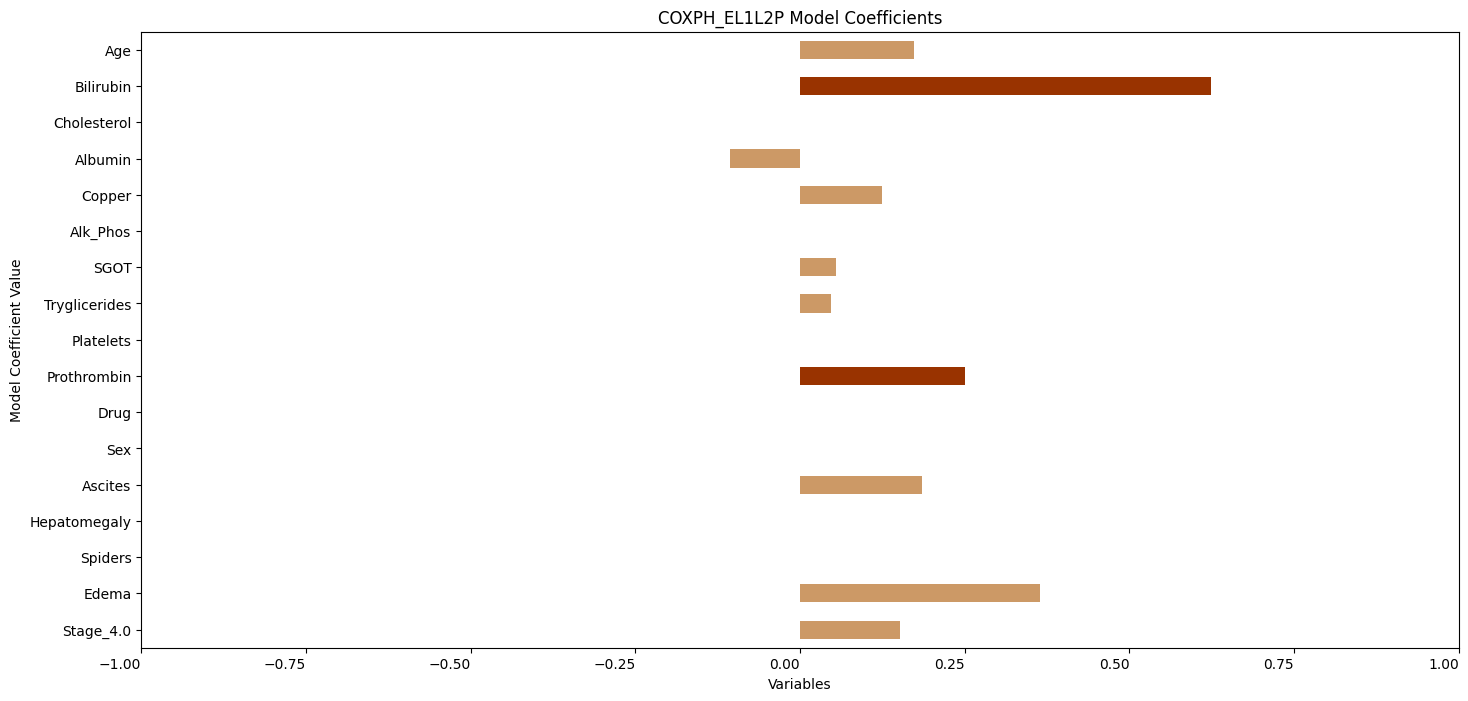

In [189]:
##################################
# Plotting the coefficient magnitude
# of the formulated Cox Regression model
# with Equal L1 and l2 Penalty
##################################
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]
cirrhosis_survival_coxph_L1_50_L2_50_summary['coef'].plot(kind='barh', color=colors)
plt.xlabel('Variables')
plt.ylabel('Model Coefficient Value')
plt.title('COXPH_EL1L2P Model Coefficients')
plt.xticks(rotation=0, ha='right')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

In [190]:
##################################
# Determining the number of
# selected and significant predictors
##################################
coxph_L1_50_L2_50_selected = sum((cirrhosis_survival_coxph_L1_50_L2_50_summary['coef']>0.001) | (-cirrhosis_survival_coxph_L1_50_L2_50_summary['coef']>0.001))
coxph_L1_50_L2_50_significant = sum(cirrhosis_survival_coxph_L1_50_L2_50_summary['p'] < 0.05)
display(f"Number of Selected Predictors: {coxph_L1_50_L2_50_selected}, Number of Significant Predictors: {coxph_L1_50_L2_50_significant}")

'Number of Selected Predictors: 10, Number of Significant Predictors: 2'

In [191]:
##################################
# Gathering the apparent model performance
# as baseline for evaluating overfitting
##################################
cirrhosis_survival_coxph_L1_50_L2_50.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
train_predictions = cirrhosis_survival_coxph_L1_50_L2_50.predict_partial_hazard(cirrhosis_survival_train_modeling)
cirrhosis_survival_coxph_L1_50_L2_50_train_ci = concordance_index(cirrhosis_survival_train_modeling['N_Days'], 
                                                                     -train_predictions, 
                                                                     cirrhosis_survival_train_modeling['Status'])
display(f"Apparent Concordance Index: {cirrhosis_survival_coxph_L1_50_L2_50_train_ci}")

'Apparent Concordance Index: 0.846553966189857'

In [192]:
##################################
# Performing 5-Fold Cross-Validation
# on the training data
##################################
kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
c_index_scores = []

for train_index, val_index in kf.split(cirrhosis_survival_train_modeling):
    df_train_fold = cirrhosis_survival_train_modeling.iloc[train_index]
    df_val_fold = cirrhosis_survival_train_modeling.iloc[val_index]
    
    cirrhosis_survival_coxph_L1_50_L2_50.fit(df_train_fold, duration_col='N_Days', event_col='Status')
    val_predictions = cirrhosis_survival_coxph_L1_50_L2_50.predict_partial_hazard(df_val_fold)
    c_index = concordance_index(df_val_fold['N_Days'], -val_predictions, df_val_fold['Status'])
    c_index_scores.append(c_index)

cirrhosis_survival_coxph_L1_50_L2_50_cv_ci_mean = np.mean(c_index_scores)
cirrhosis_survival_coxph_L1_50_L2_50_cv_ci_std = np.std(c_index_scores)

display(f"Cross-Validated Concordance Index: {cirrhosis_survival_coxph_L1_50_L2_50_cv_ci_mean}")

'Cross-Validated Concordance Index: 0.8162802125265027'

In [193]:
##################################
# Evaluating the model performance
# on test data
##################################
test_predictions = cirrhosis_survival_coxph_L1_50_L2_50.predict_partial_hazard(cirrhosis_survival_test_modeling)
cirrhosis_survival_coxph_L1_50_L2_50_test_ci = concordance_index(cirrhosis_survival_test_modeling['N_Days'], 
                                                                     -test_predictions, 
                                                                     cirrhosis_survival_test_modeling['Status'])
display(f"Test Concordance Index: {cirrhosis_survival_coxph_L1_50_L2_50_test_ci}")

'Test Concordance Index: 0.8630385487528345'

In [194]:
##################################
# Gathering the concordance indices
# from training, cross-validation and test
##################################
coxph_L1_50_L2_50_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_L1_50_L2_50_ci_values = pd.DataFrame([cirrhosis_survival_coxph_L1_50_L2_50_train_ci,
                                           cirrhosis_survival_coxph_L1_50_L2_50_cv_ci_mean,
                                           cirrhosis_survival_coxph_L1_50_L2_50_test_ci])
coxph_L1_50_L2_50_method = pd.DataFrame(["COXPH_EL1L2P"]*3)
coxph_L1_50_L2_50_summary = pd.concat([coxph_L1_50_L2_50_set, 
                                     coxph_L1_50_L2_50_ci_values,
                                     coxph_L1_50_L2_50_method], 
                                    axis=1)
coxph_L1_50_L2_50_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_L1_50_L2_50_summary.reset_index(inplace=True, drop=True)
display(coxph_L1_50_L2_50_summary)

Set  Concordance.Index        Method
0             Train           0.846554  COXPH_EL1L2P
1  Cross-Validation           0.816280  COXPH_EL1L2P
2              Test           0.863039  COXPH_EL1L2P

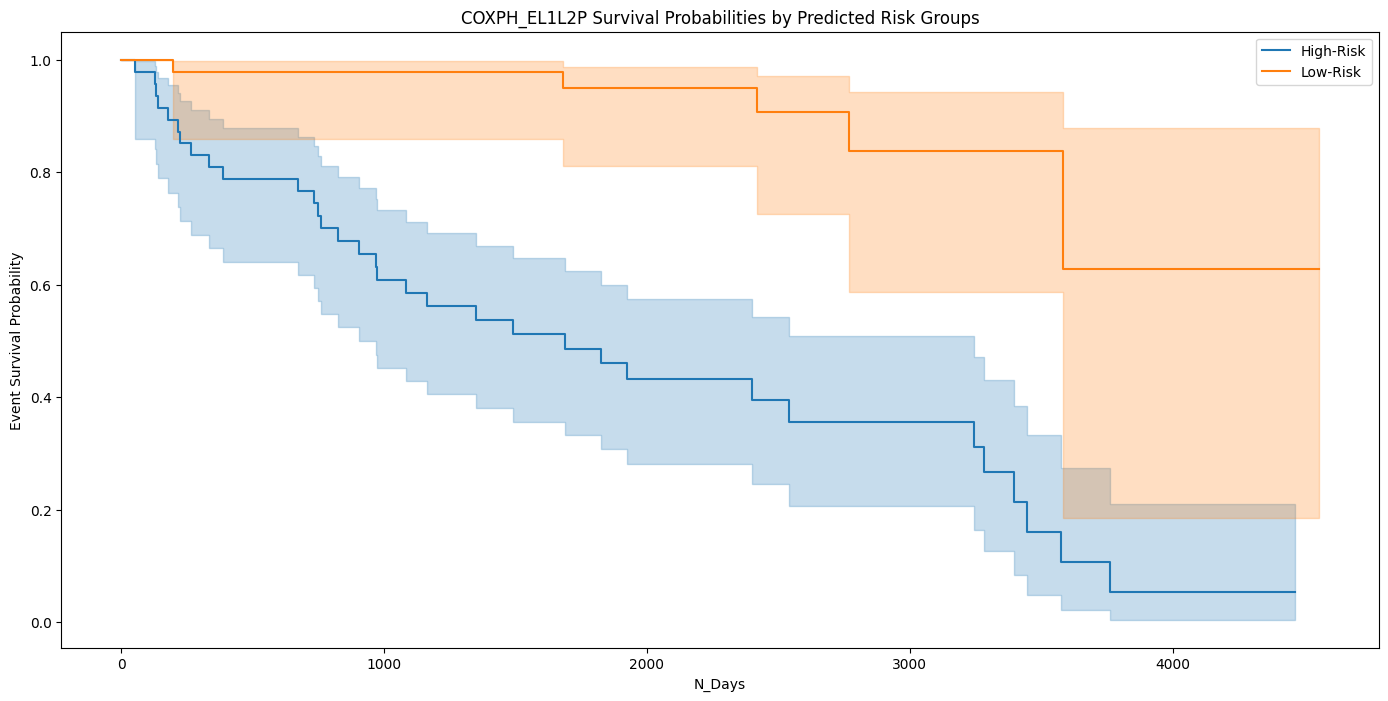

In [195]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_EL1L2P'] = test_predictions
cirrhosis_survival_test_modeling['Predicted_RiskGroups_COXPH_EL1L2P'] = risk_groups = pd.qcut(cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_EL1L2P'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test_modeling[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH_EL1L2P Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [196]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
10    True    1827  0.226982   1.530100     1.302295  1.331981  1.916467   
20   False    1447 -0.147646   0.061189     0.793618 -1.158235  0.861264   
30   False    2574  0.296370  -1.283677     0.169685  3.237777 -1.008276   
40    True    3762  0.392609  -0.096645    -0.486337  1.903146 -0.546292   
50   False     837 -0.813646   1.089037     0.064451  0.212865  2.063138   

    Alk_Phos      SGOT  Tryglicerides  ...  Edema  Stage_4.0  \
10 -0.477846 -0.451305       2.250260  ...      0          1   
20  0.625621  0.319035       0.446026  ...      0          1   
30 -0.873566 -0.845549      -0.351236  ...      0          0   
40 -0.247141 -0.720619      -0.810790  ...      0          1   
50 -0.224432  0.074987       2.333282  ...      0          1   

    Predicted_Risks_COXPH_NP  Predicted_RiskGroups_COXPH_NP  \
10                  8.397958                      High-Risk   
20                  0.466233                       Low-Risk   
30                  0.153047                       Low-Risk   
40                  2.224881                      High-Risk   
50                  2.886051                      High-Risk   

    Predicted_Risks_COXPH_FL1P  Predicted_RiskGroups_COXPH_FL1P  \
10                    3.515780                        High-Risk   
20                    0.769723                         Low-Risk   
30                    0.320200                         Low-Risk   
40                    1.167777                        High-Risk   
50                    1.832490                        High-Risk   

    Predicted_Risks_COXPH_FL2P  Predicted_RiskGroups_COXPH_FL2P  \
10                    4.748349                        High-Risk   
20                    0.681968                         Low-Risk   
30                    0.165574                         Low-Risk   
40                    1.591530                        High-Risk   
50                    2.541904                        High-Risk   

    Predicted_Risks_COXPH_EL1L2P  Predicted_RiskGroups_COXPH_EL1L2P  
10                      4.442277                          High-Risk  
20                      0.741410                           Low-Risk  
30                      0.255343                           Low-Risk  
40                      1.275445                          High-Risk  
50                      2.125042                          High-Risk  

[5 rows x 27 columns]

In [197]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test_modeling.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_COXPH_EL1L2P']])

   Predicted_RiskGroups_COXPH_EL1L2P
10                         High-Risk
20                          Low-Risk
30                          Low-Risk
40                         High-Risk
50                         High-Risk


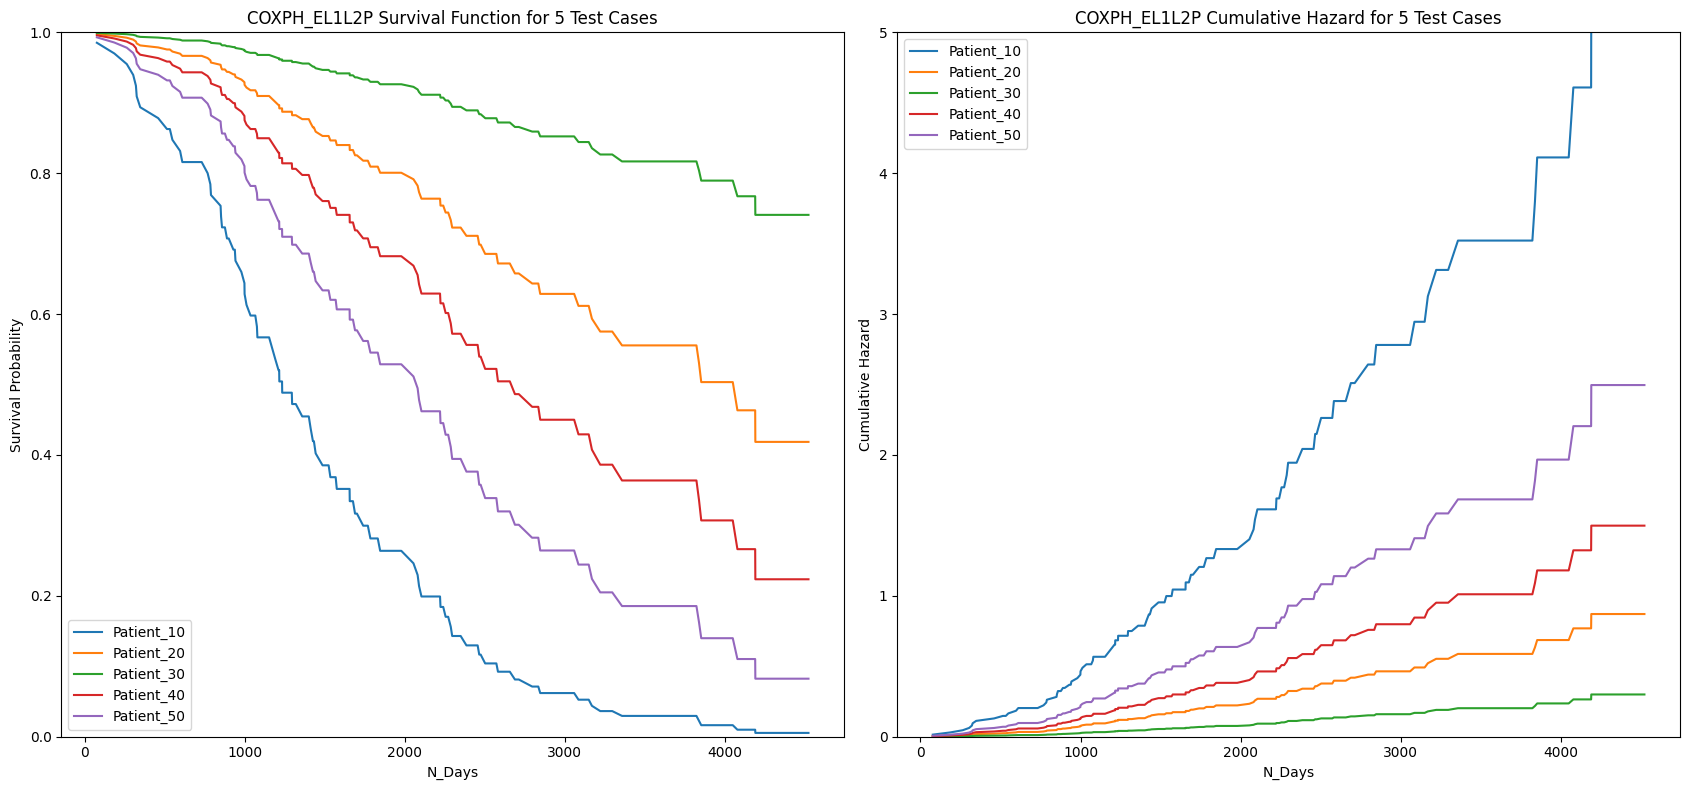

In [198]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50']

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
for i, (index, row) in enumerate(test_case.iterrows()):
    survival_function = cirrhosis_survival_coxph_L1_50_L2_50.predict_survival_function(row.to_frame().T)
    axes[0].plot(survival_function, label=f'Sample {i+1}')
axes[0].set_title('COXPH_EL1L2P Survival Function for 5 Test Cases')
axes[0].set_xlabel('N_Days')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Survival Probability')
axes[0].legend(test_case_labels, loc="lower left")
for i, (index, row) in enumerate(test_case.iterrows()):
    hazard_function = cirrhosis_survival_coxph_L1_50_L2_50.predict_cumulative_hazard(row.to_frame().T)
    axes[1].plot(hazard_function, label=f'Sample {i+1}')
axes[1].set_title('COXPH_EL1L2P Cumulative Hazard for 5 Test Cases')
axes[1].set_xlabel('N_Days')
axes[1].set_ylim(0,5)
axes[1].set_ylabel('Cumulative Hazard')
axes[1].legend(test_case_labels, loc="upper left")
plt.tight_layout()
plt.show()

In [199]:
##################################
# Creating the explainer object
##################################
cirrhosis_survival_coxph_L1_50_L2_50_explainer = shap.Explainer(cirrhosis_survival_coxph_L1_50_L2_50.predict_partial_hazard, 
                                                    cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))
cirrhosis_survival_coxph_L1_50_L2_50_shap_values = cirrhosis_survival_coxph_L1_50_L2_50_explainer(cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))

PermutationExplainer explainer: 219it [00:11,  1.93it/s]                                                               


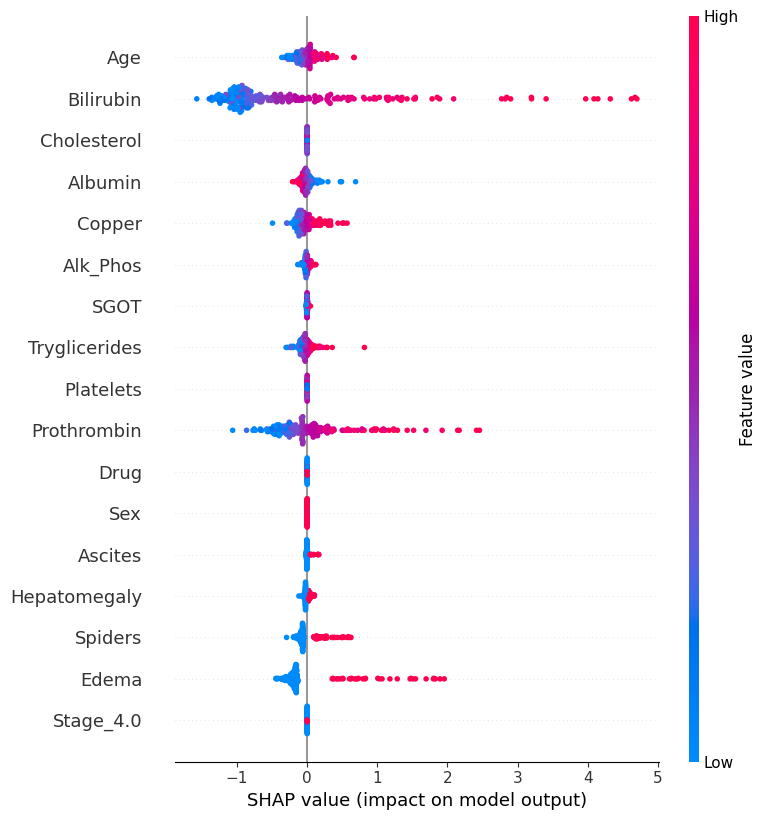

In [200]:
##################################
# Plotting the SHAP summary plot
##################################
shap.summary_plot(cirrhosis_survival_coxph_L1_50_L2_50_shap_values, 
                  cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]),
                  sort=False)

### 1.6.6 Cox Regression With Predominantly L1-Weighted | L2 Penalty <a class="anchor" id="1.6.6"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[Elastic Net Penalty](https://lifelines.readthedocs.io/en/latest/), or combined L1 and L2 regularization in cox regression, adds a constraint to both the sum of the absolute and squared values of the coefficients. The penalized log-likelihood function is composed of the partial likelihood of the cox model, a tuning parameter that controls the strength of both lasso and ridge penalties, the sum of the absolute model coefficients, and the sum of the squared model coefficients. The Elastic Net penalty combines the benefits of both Lasso and Ridge, promoting sparsity while also dealing with multicollinearity.

[Concordance Index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html) measures the model's ability to correctly order pairs of observations based on their predicted survival times. Values range from 0.5 to 1.0 indicating no predictive power (random guessing) and perfect predictions, respectively. As a metric, it provides a measure of discriminative ability and useful for ranking predictions. However, it does not provide information on the magnitude of errors and may be insensitive to the calibration of predicted survival probabilities.

1. The [cox proportional hazards regression model](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html) from the <mark style="background-color: #CCECFF"><b>lifelines.CoxPHFitter</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">penalizer</span> = penalty to the size of the coefficients during regression fixed at a value = 0.10
    * <span style="color: #FF0000">l1_ratio</span> = proportion of the L1 versus L2 penalty fixed at a value = 0.75
3. Only 8 out of the 17 variables were used for prediction given the non-zero values of the model coefficients.
4. Out of all 8 predictors, only 2 variables were statistically significant:
    * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
5. The cross-validated model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8101
6. The apparent model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8394
7. The independent test model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8526
8. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of minimal model overfitting.
9. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
10. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
11. SHAP values were computed for the significant predictors, with contributions to the model output ranked as follows:
    * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk

In [201]:
##################################
# Formulating the Cox Regression model
# with Predominantly L1-Weighted and L2 Penalty
# and generating the summary
##################################
cirrhosis_survival_coxph_L1_75_L2_25 = CoxPHFitter(penalizer=0.10, l1_ratio=0.75)
cirrhosis_survival_coxph_L1_75_L2_25.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
cirrhosis_survival_coxph_L1_75_L2_25.print_summary()

<lifelines.CoxPHFitter: fitted with 218 total observations, 131 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 0.75
      baseline estimation = breslow
   number of observations = 218
number of events observed = 87
   partial log-likelihood = -385.37
         time fit was run = 2024-10-14 07:05:42 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Age            0.13      1.14      0.11           -0.08            0.35                0.93                1.42
Bilirubin      0.68      1.98      0.15            0.39            0.97                1.48                2.64
Cholesterol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Albumin       -0.09      0.92      0.13           -0.34            0.17                0.71                1.18
Copper         0.09      1.09      0.13           -0.16            0.34                0.85                1.40
Alk_Phos       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SGOT           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tryglicerides  0.00      1.00      0.11           -0.22            0.22                0.80                1.25
Platelets     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Prothrombin    0.23      1.25      0.13           -0.02            0.47                0.98                1.60
Drug          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Sex           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Ascites        0.19      1.21      0.39           -0.57            0.95                0.57                2.60
Hepatomegaly   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Spiders        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Edema          0.27      1.31      0.29           -0.31            0.84                0.74                2.33
Stage_4.0      0.09      1.09      0.26           -0.42            0.59                0.66                1.80

               cmp to     z      p  -log2(p)
covariate                                   
Age              0.00  1.24   0.21      2.23
Bilirubin        0.00  4.64 <0.005     18.16
Cholesterol      0.00  0.00   1.00      0.00
Albumin          0.00 -0.66   0.51      0.98
Copper           0.00  0.69   0.49      1.04
Alk_Phos         0.00  0.00   1.00      0.00
SGOT             0.00  0.00   1.00      0.00
Tryglicerides    0.00  0.00   1.00      0.00
Platelets        0.00 -0.00   1.00      0.00
Prothrombin      0.00  1.78   0.07      3.75
Drug             0.00 -0.00   1.00      0.00
Sex              0.00 -0.00   1.00      0.00
Ascites          0.00  0.50   0.62      0.69
Hepatomegaly     0.00  0.00   1.00      0.00
Spiders          0.00  0.00   1.00      0.00
Edema            0.00  0.91   0.36      1.47
Stage_4.0        0.00  0.34   0.74      0.44
---
Concordance = 0.84
Partial AIC = 804.74
log-likelihood ratio test = 63.99 on 17 df
-log2(p) of ll-ratio test = 22.07

In [202]:
##################################
# Consolidating the detailed values
# of the model coefficients
##################################
cirrhosis_survival_coxph_L1_75_L2_25.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                          
Age            1.349698e-01   1.144502  0.108439       -0.077568   
Bilirubin      6.831940e-01   1.980192  0.147122        0.394841   
Cholesterol    2.576816e-08   1.000000  0.000081       -0.000159   
Albumin       -8.508496e-02   0.918434  0.128576       -0.337088   
Copper         8.805786e-02   1.092051  0.126767       -0.160401   
Alk_Phos       6.930976e-08   1.000000  0.000098       -0.000192   
SGOT           1.623334e-07   1.000000  0.000202       -0.000396   
Tryglicerides  1.163401e-04   1.000116  0.112144       -0.219682   
Platelets     -1.524115e-07   1.000000  0.000185       -0.000363   
Prothrombin    2.251074e-01   1.252457  0.126126       -0.022095   
Drug          -3.710982e-08   1.000000  0.000161       -0.000315   
Sex           -1.881487e-07   1.000000  0.000282       -0.000553   
Ascites        1.933495e-01   1.213307  0.388559       -0.568213   
Hepatomegaly   3.022681e-07   1.000000  0.000366       -0.000716   
Spiders        1.424028e-07   1.000000  0.000214       -0.000418   
Edema          2.686481e-01   1.308195  0.293772       -0.307134   
Stage_4.0      8.598185e-02   1.089787  0.255667       -0.415116   

               coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                 
Age                  0.347507             0.925364             1.415535   
Bilirubin            0.971547             1.484148             2.642029   
Cholesterol          0.000159             0.999841             1.000159   
Albumin              0.166918             0.713846             1.181658   
Copper               0.336516             0.851802             1.400062   
Alk_Phos             0.000192             0.999808             1.000192   
SGOT                 0.000396             0.999604             1.000397   
Tryglicerides        0.219914             0.802774             1.245970   
Platelets            0.000362             0.999637             1.000362   
Prothrombin          0.472310             0.978147             1.603694   
Drug                 0.000315             0.999685             1.000315   
Sex                  0.000553             0.999447             1.000553   
Ascites              0.954912             0.566537             2.598442   
Hepatomegaly         0.000717             0.999284             1.000717   
Spiders              0.000419             0.999582             1.000419   
Edema                0.844430             0.735552             2.326651   
Stage_4.0            0.587080             0.660264             1.798728   

               cmp to         z         p   -log2(p)  
covariate                                             
Age               0.0  1.244656  0.213258   2.229327  
Bilirubin         0.0  4.643737  0.000003  18.156883  
Cholesterol       0.0  0.000317  0.999747   0.000365  
Albumin           0.0 -0.661751  0.508131   0.976728  
Copper            0.0  0.694644  0.487278   1.037182  
Alk_Phos          0.0  0.000709  0.999435   0.000816  
SGOT              0.0  0.000803  0.999359   0.000925  
Tryglicerides     0.0  0.001037  0.999172   0.001195  
Platelets         0.0 -0.000824  0.999343   0.000949  
Prothrombin       0.0  1.784781  0.074297   3.750555  
Drug              0.0 -0.000231  0.999816   0.000266  
Sex               0.0 -0.000667  0.999468   0.000768  
Ascites           0.0  0.497606  0.618762   0.692544  
Hepatomegaly      0.0  0.000827  0.999340   0.000952  
Spiders           0.0  0.000667  0.999468   0.000768  
Edema             0.0  0.914479  0.360465   1.472069  
Stage_4.0         0.0  0.336304  0.736642   0.440965

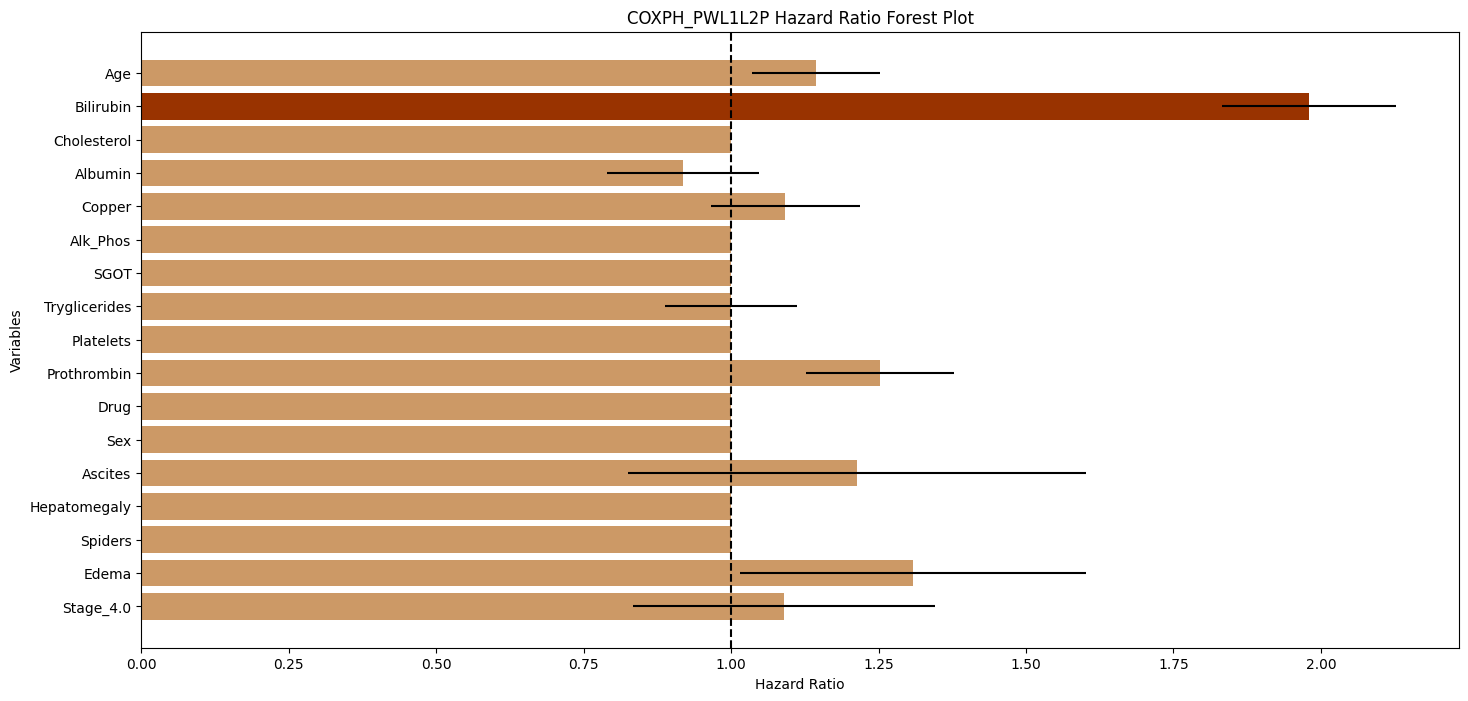

In [203]:
##################################
# Plotting the hazard ratio of the
# formulated Cox Regression model
# with Predominantly L1-Weighted and L2 Penalty
##################################
cirrhosis_survival_coxph_L1_75_L2_25_summary = cirrhosis_survival_coxph_L1_75_L2_25.summary
cirrhosis_survival_coxph_L1_75_L2_25_summary['hazard_ratio'] = np.exp(cirrhosis_survival_coxph_L1_75_L2_25_summary['coef'])
significant = cirrhosis_survival_coxph_L1_75_L2_25_summary['p'] < 0.05
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]

plt.barh(cirrhosis_survival_coxph_L1_75_L2_25_summary.index, 
         cirrhosis_survival_coxph_L1_75_L2_25_summary['hazard_ratio'], 
         xerr=cirrhosis_survival_coxph_L1_75_L2_25_summary['se(coef)'], 
         color=colors)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('COXPH_PWL1L2P Hazard Ratio Forest Plot')
plt.axvline(x=1, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

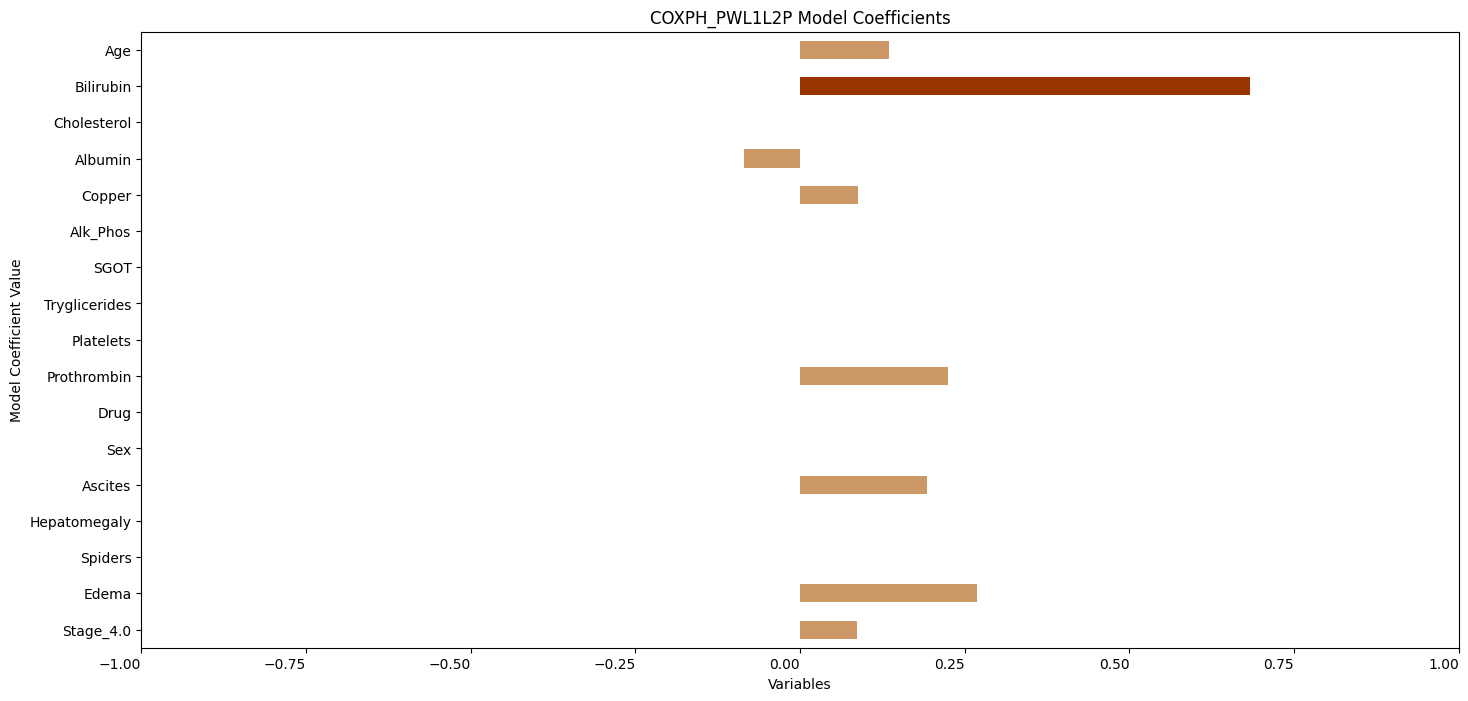

In [204]:
##################################
# Plotting the coefficient magnitude
# of the formulated Cox Regression model
# with Predominantly L1-Weighted and L2 Penalty
##################################
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]
cirrhosis_survival_coxph_L1_75_L2_25_summary['coef'].plot(kind='barh', color=colors)
plt.xlabel('Variables')
plt.ylabel('Model Coefficient Value')
plt.title('COXPH_PWL1L2P Model Coefficients')
plt.xticks(rotation=0, ha='right')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

In [205]:
##################################
# Determining the number of
# selected and significant predictors
##################################
coxph_L1_75_L2_25_selected = sum((cirrhosis_survival_coxph_L1_75_L2_25_summary['coef']>0.001) | (-cirrhosis_survival_coxph_L1_75_L2_25_summary['coef']>0.001))
coxph_L1_75_L2_25_significant = sum(cirrhosis_survival_coxph_L1_75_L2_25_summary['p'] < 0.05)
display(f"Number of Selected Predictors: {coxph_L1_75_L2_25_selected}, Number of Significant Predictors: {coxph_L1_75_L2_25_significant}")

'Number of Selected Predictors: 8, Number of Significant Predictors: 1'

In [206]:
##################################
# Gathering the apparent model performance
# as baseline for evaluating overfitting
##################################
cirrhosis_survival_coxph_L1_75_L2_25.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
train_predictions = cirrhosis_survival_coxph_L1_75_L2_25.predict_partial_hazard(cirrhosis_survival_train_modeling)
cirrhosis_survival_coxph_L1_75_L2_25_train_ci = concordance_index(cirrhosis_survival_train_modeling['N_Days'], 
                                                                     -train_predictions, 
                                                                     cirrhosis_survival_train_modeling['Status'])
display(f"Apparent Concordance Index: {cirrhosis_survival_coxph_L1_75_L2_25_train_ci}")

'Apparent Concordance Index: 0.8394018205461639'

In [207]:
##################################
# Performing 5-Fold Cross-Validation
# on the training data
##################################
kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
c_index_scores = []

for train_index, val_index in kf.split(cirrhosis_survival_train_modeling):
    df_train_fold = cirrhosis_survival_train_modeling.iloc[train_index]
    df_val_fold = cirrhosis_survival_train_modeling.iloc[val_index]
    
    cirrhosis_survival_coxph_L1_75_L2_25.fit(df_train_fold, duration_col='N_Days', event_col='Status')
    val_predictions = cirrhosis_survival_coxph_L1_75_L2_25.predict_partial_hazard(df_val_fold)
    c_index = concordance_index(df_val_fold['N_Days'], -val_predictions, df_val_fold['Status'])
    c_index_scores.append(c_index)

cirrhosis_survival_coxph_L1_75_L2_25_cv_ci_mean = np.mean(c_index_scores)
cirrhosis_survival_coxph_L1_75_L2_25_cv_ci_std = np.std(c_index_scores)

display(f"Cross-Validated Concordance Index: {cirrhosis_survival_coxph_L1_75_L2_25_cv_ci_mean}")

'Cross-Validated Concordance Index: 0.810177644183905'

In [208]:
##################################
# Evaluating the model performance
# on test data
##################################
test_predictions = cirrhosis_survival_coxph_L1_75_L2_25.predict_partial_hazard(cirrhosis_survival_test_modeling)
cirrhosis_survival_coxph_L1_75_L2_25_test_ci = concordance_index(cirrhosis_survival_test_modeling['N_Days'], 
                                                                     -test_predictions, 
                                                                     cirrhosis_survival_test_modeling['Status'])
display(f"Test Concordance Index: {cirrhosis_survival_coxph_L1_75_L2_25_test_ci}")

'Test Concordance Index: 0.8526077097505669'

In [209]:
##################################
# Gathering the concordance indices
# from training, cross-validation and test
##################################
coxph_L1_75_L2_25_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_L1_75_L2_25_ci_values = pd.DataFrame([cirrhosis_survival_coxph_L1_75_L2_25_train_ci,
                                           cirrhosis_survival_coxph_L1_75_L2_25_cv_ci_mean,
                                           cirrhosis_survival_coxph_L1_75_L2_25_test_ci])
coxph_L1_75_L2_25_method = pd.DataFrame(["COXPH_PWL1L2P"]*3)
coxph_L1_75_L2_25_summary = pd.concat([coxph_L1_75_L2_25_set, 
                                     coxph_L1_75_L2_25_ci_values,
                                     coxph_L1_75_L2_25_method], 
                                    axis=1)
coxph_L1_75_L2_25_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_L1_75_L2_25_summary.reset_index(inplace=True, drop=True)
display(coxph_L1_75_L2_25_summary)

Set  Concordance.Index         Method
0             Train           0.839402  COXPH_PWL1L2P
1  Cross-Validation           0.810178  COXPH_PWL1L2P
2              Test           0.852608  COXPH_PWL1L2P

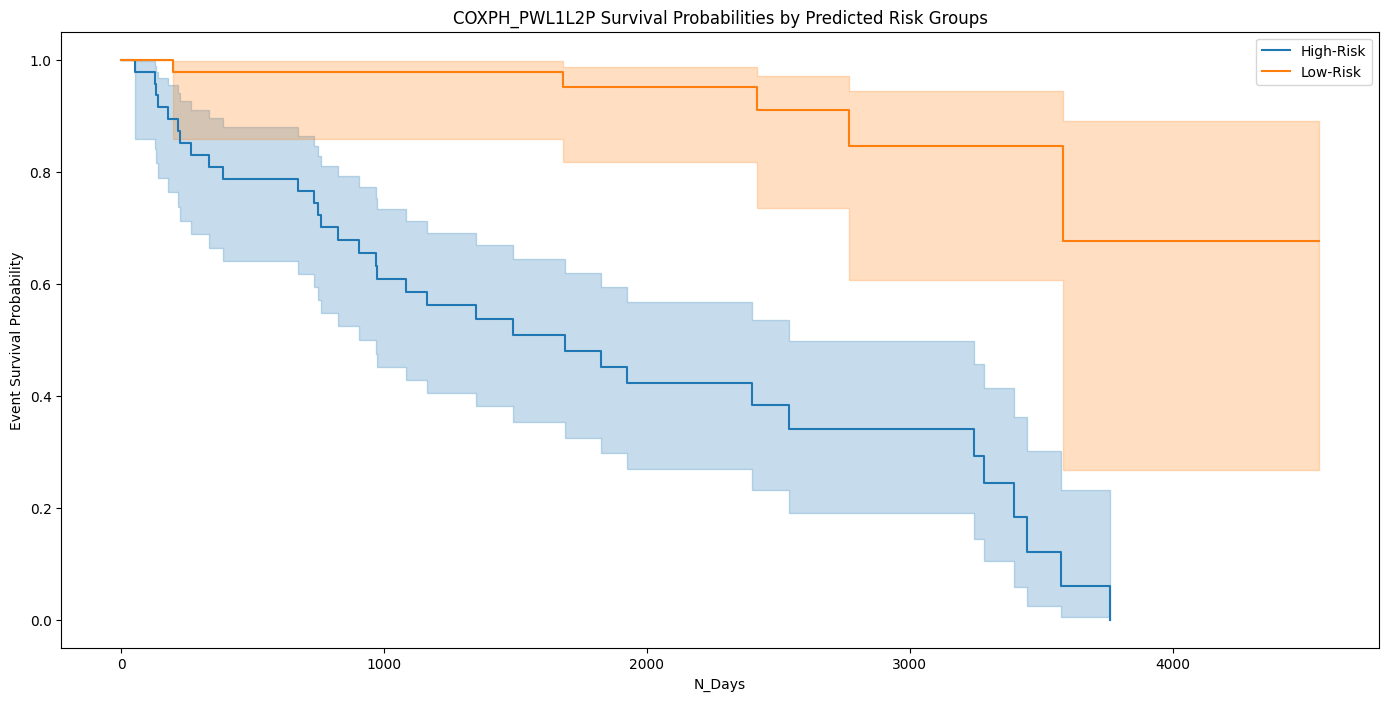

In [210]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_PWL1L2P'] = test_predictions
cirrhosis_survival_test_modeling['Predicted_RiskGroups_COXPH_PWL1L2P'] = risk_groups = pd.qcut(cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_PWL1L2P'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test_modeling[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH_PWL1L2P Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [211]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
10    True    1827  0.226982   1.530100     1.302295  1.331981  1.916467   
20   False    1447 -0.147646   0.061189     0.793618 -1.158235  0.861264   
30   False    2574  0.296370  -1.283677     0.169685  3.237777 -1.008276   
40    True    3762  0.392609  -0.096645    -0.486337  1.903146 -0.546292   
50   False     837 -0.813646   1.089037     0.064451  0.212865  2.063138   

    Alk_Phos      SGOT  Tryglicerides  ...  Predicted_Risks_COXPH_NP  \
10 -0.477846 -0.451305       2.250260  ...                  8.397958   
20  0.625621  0.319035       0.446026  ...                  0.466233   
30 -0.873566 -0.845549      -0.351236  ...                  0.153047   
40 -0.247141 -0.720619      -0.810790  ...                  2.224881   
50 -0.224432  0.074987       2.333282  ...                  2.886051   

    Predicted_RiskGroups_COXPH_NP  Predicted_Risks_COXPH_FL1P  \
10                      High-Risk                    3.515780   
20                       Low-Risk                    0.769723   
30                       Low-Risk                    0.320200   
40                      High-Risk                    1.167777   
50                      High-Risk                    1.832490   

    Predicted_RiskGroups_COXPH_FL1P  Predicted_Risks_COXPH_FL2P  \
10                        High-Risk                    4.748349   
20                         Low-Risk                    0.681968   
30                         Low-Risk                    0.165574   
40                        High-Risk                    1.591530   
50                        High-Risk                    2.541904   

    Predicted_RiskGroups_COXPH_FL2P  Predicted_Risks_COXPH_EL1L2P  \
10                        High-Risk                      4.442277   
20                         Low-Risk                      0.741410   
30                         Low-Risk                      0.255343   
40                        High-Risk                      1.275445   
50                        High-Risk                      2.125042   

    Predicted_RiskGroups_COXPH_EL1L2P  Predicted_Risks_COXPH_PWL1L2P  \
10                          High-Risk                       3.761430   
20                           Low-Risk                       0.747044   
30                           Low-Risk                       0.295159   
40                          High-Risk                       1.214395   
50                          High-Risk                       1.832724   

    Predicted_RiskGroups_COXPH_PWL1L2P  
10                           High-Risk  
20                            Low-Risk  
30                            Low-Risk  
40                           High-Risk  
50                           High-Risk  

[5 rows x 29 columns]

In [212]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test_modeling.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_COXPH_PWL1L2P']])

   Predicted_RiskGroups_COXPH_PWL1L2P
10                          High-Risk
20                           Low-Risk
30                           Low-Risk
40                          High-Risk
50                          High-Risk


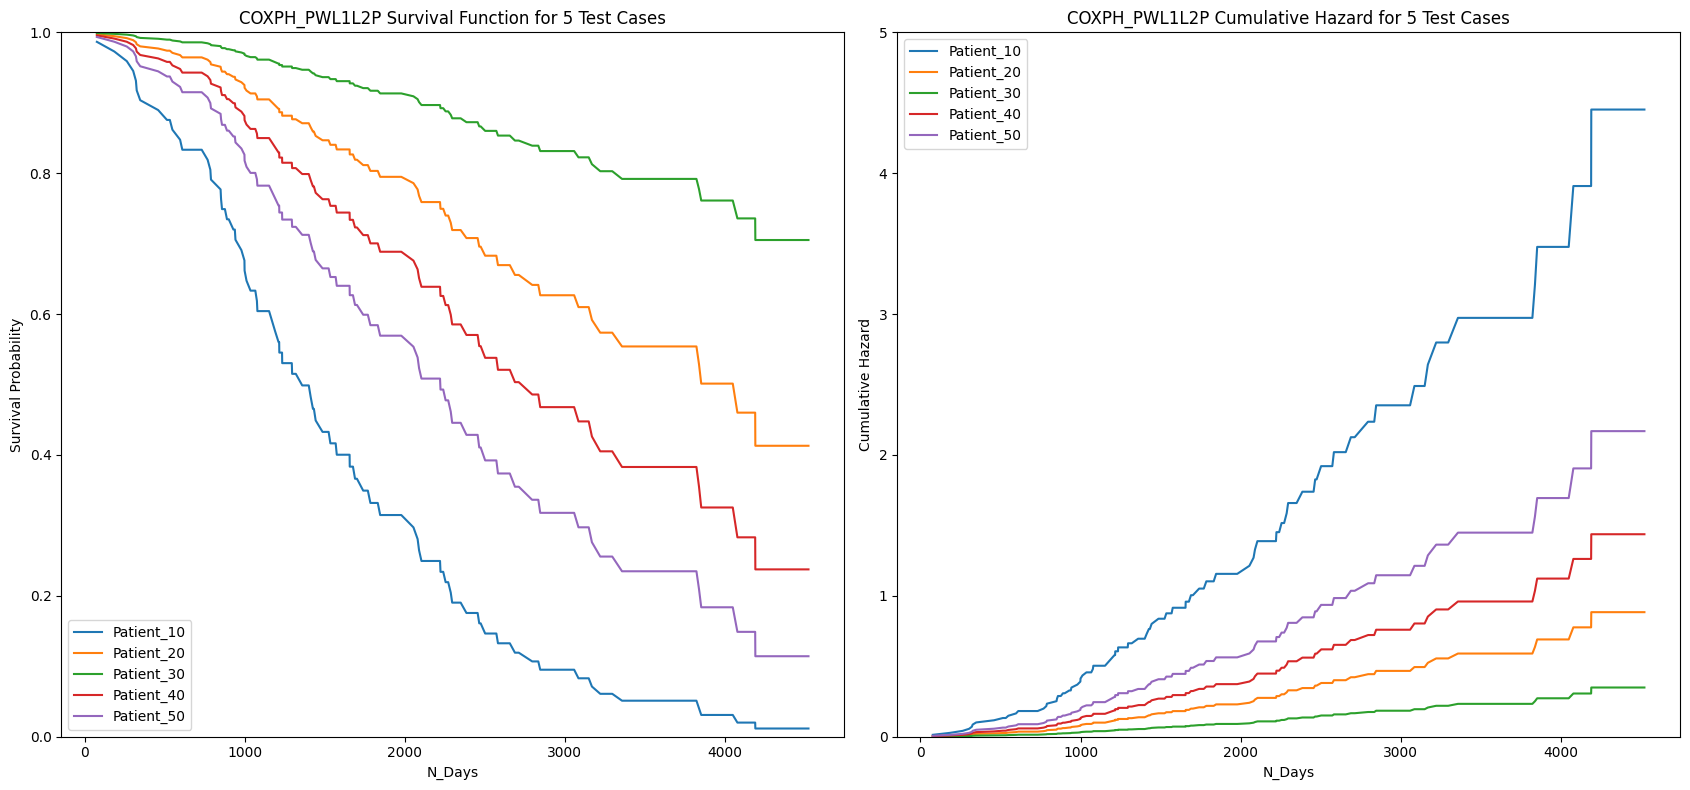

In [213]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50']

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
for i, (index, row) in enumerate(test_case.iterrows()):
    survival_function = cirrhosis_survival_coxph_L1_75_L2_25.predict_survival_function(row.to_frame().T)
    axes[0].plot(survival_function, label=f'Sample {i+1}')
axes[0].set_title('COXPH_PWL1L2P Survival Function for 5 Test Cases')
axes[0].set_xlabel('N_Days')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Survival Probability')
axes[0].legend(test_case_labels, loc="lower left")
for i, (index, row) in enumerate(test_case.iterrows()):
    hazard_function = cirrhosis_survival_coxph_L1_75_L2_25.predict_cumulative_hazard(row.to_frame().T)
    axes[1].plot(hazard_function, label=f'Sample {i+1}')
axes[1].set_title('COXPH_PWL1L2P Cumulative Hazard for 5 Test Cases')
axes[1].set_xlabel('N_Days')
axes[1].set_ylim(0,5)
axes[1].set_ylabel('Cumulative Hazard')
axes[1].legend(test_case_labels, loc="upper left")
plt.tight_layout()
plt.show()

In [214]:
##################################
# Creating the explainer object
##################################
cirrhosis_survival_coxph_L1_75_L2_25_explainer = shap.Explainer(cirrhosis_survival_coxph_L1_75_L2_25.predict_partial_hazard, 
                                                    cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))
cirrhosis_survival_coxph_L1_75_L2_25_shap_values = cirrhosis_survival_coxph_L1_75_L2_25_explainer(cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))

PermutationExplainer explainer: 219it [00:13,  4.05it/s]                                                               


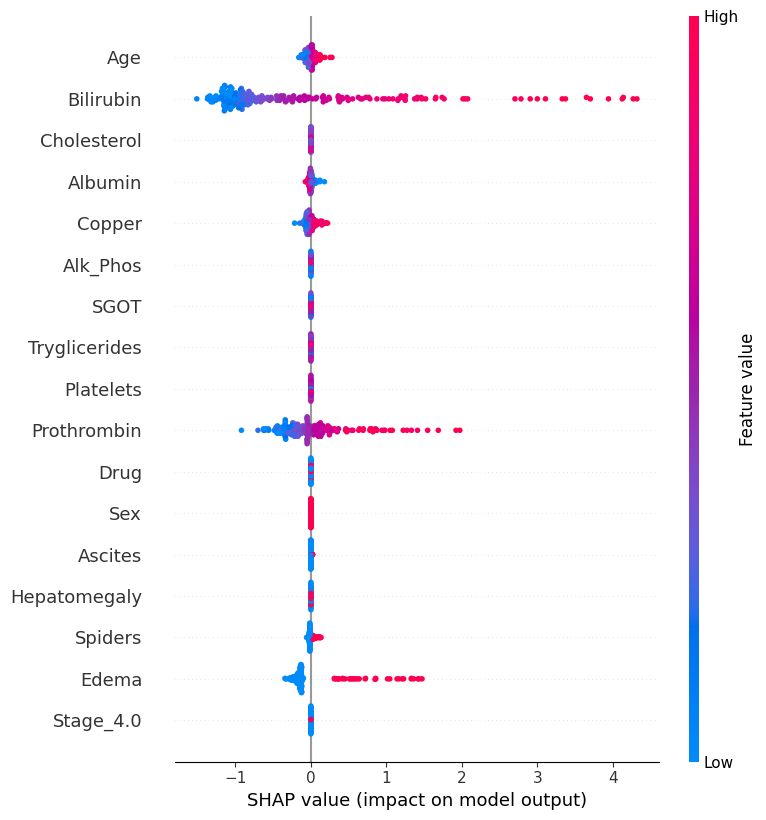

In [215]:
##################################
# Plotting the SHAP summary plot
##################################
shap.summary_plot(cirrhosis_survival_coxph_L1_75_L2_25_shap_values, 
                  cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]),
                  sort=False)

### 1.6.7 Cox Regression With Predominantly L2-Weighted | L1 Penalty <a class="anchor" id="1.6.7"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[Elastic Net Penalty](https://lifelines.readthedocs.io/en/latest/), or combined L1 and L2 regularization in cox regression, adds a constraint to both the sum of the absolute and squared values of the coefficients. The penalized log-likelihood function is composed of the partial likelihood of the cox model, a tuning parameter that controls the strength of both lasso and ridge penalties, the sum of the absolute model coefficients, and the sum of the squared model coefficients. The Elastic Net penalty combines the benefits of both Lasso and Ridge, promoting sparsity while also dealing with multicollinearity.

[Concordance Index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html) measures the model's ability to correctly order pairs of observations based on their predicted survival times. Values range from 0.5 to 1.0 indicating no predictive power (random guessing) and perfect predictions, respectively. As a metric, it provides a measure of discriminative ability and useful for ranking predictions. However, it does not provide information on the magnitude of errors and may be insensitive to the calibration of predicted survival probabilities.

1. The [cox proportional hazards regression model](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html) from the <mark style="background-color: #CCECFF"><b>lifelines.CoxPHFitter</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">penalizer</span> = penalty to the size of the coefficients during regression fixed at a value = 0.10
    * <span style="color: #FF0000">l1_ratio</span> = proportion of the L1 versus L2 penalty fixed at a value = 0.25
3. Only 12 out of the 17 variables were used for prediction given the non-zero values of the model coefficients.
4. Out of all 12 predictors, only 3 variables were statistically significant:
    * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Prothrombin</span>: Increase in value associated with a more elevated hazard 
    * <span style="color: #FF0000">Age</span>: Increase in value associated with a more elevated hazard 
5. The cross-validated model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8152
6. The apparent model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8501
7. The independent test model performance of the model is summarized as follows:
    * **Concordance Index** = 0.8671
8. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
9. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
10. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
11. SHAP values were computed for the significant predictors, with contributions to the model output ranked as follows:
    * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Prothrombin</span> result to increased event risk
    * Higher values for <span style="color: #FF0000">Age</span> result to increased event risk

In [216]:
##################################
# Formulating the Cox Regression model
# with Predominantly L2-Weighted and L1 Penalty
# and generating the summary
##################################
cirrhosis_survival_coxph_L1_25_L2_75 = CoxPHFitter(penalizer=0.10, l1_ratio=0.25)
cirrhosis_survival_coxph_L1_25_L2_75.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
cirrhosis_survival_coxph_L1_25_L2_75.print_summary()

<lifelines.CoxPHFitter: fitted with 218 total observations, 131 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 0.25
      baseline estimation = breslow
   number of observations = 218
number of events observed = 87
   partial log-likelihood = -370.52
         time fit was run = 2024-10-14 07:06:01 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Age            0.21      1.23      0.11            0.00            0.42                1.00                1.52
Bilirubin      0.56      1.76      0.14            0.28            0.84                1.33                2.32
Cholesterol    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Albumin       -0.13      0.88      0.12           -0.37            0.11                0.69                1.11
Copper         0.15      1.16      0.12           -0.08            0.38                0.92                1.46
Alk_Phos       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SGOT           0.12      1.13      0.12           -0.11            0.36                0.90                1.43
Tryglicerides  0.09      1.09      0.11           -0.12            0.29                0.89                1.34
Platelets     -0.02      0.98      0.10           -0.22            0.18                0.80                1.20
Prothrombin    0.27      1.31      0.12            0.04            0.50                1.04                1.65
Drug          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Sex           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Ascites        0.17      1.19      0.35           -0.52            0.86                0.59                2.37
Hepatomegaly   0.07      1.07      0.23           -0.38            0.53                0.68                1.69
Spiders        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Edema          0.43      1.54      0.27           -0.10            0.96                0.90                2.61
Stage_4.0      0.19      1.21      0.25           -0.29            0.68                0.75                1.97

               cmp to     z      p  -log2(p)
covariate                                   
Age              0.00  1.99   0.05      4.41
Bilirubin        0.00  3.94 <0.005     13.59
Cholesterol      0.00  0.00   1.00      0.00
Albumin          0.00 -1.07   0.29      1.81
Copper           0.00  1.28   0.20      2.31
Alk_Phos         0.00  0.00   1.00      0.00
SGOT             0.00  1.03   0.30      1.72
Tryglicerides    0.00  0.81   0.42      1.25
Platelets        0.00 -0.20   0.84      0.25
Prothrombin      0.00  2.34   0.02      5.68
Drug             0.00 -0.00   1.00      0.00
Sex              0.00 -0.00   1.00      0.00
Ascites          0.00  0.49   0.63      0.68
Hepatomegaly     0.00  0.31   0.76      0.40
Spiders          0.00  0.00   1.00      0.00
Edema            0.00  1.59   0.11      3.16
Stage_4.0        0.00  0.78   0.44      1.20
---
Concordance = 0.85
Partial AIC = 775.05
log-likelihood ratio test = 93.69 on 17 df
-log2(p) of ll-ratio test = 39.49

In [217]:
##################################
# Consolidating the detailed values
# of the model coefficients
##################################
cirrhosis_survival_coxph_L1_25_L2_75.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                          
Age            2.098302e-01   1.233469  0.105619        0.002821   
Bilirubin      5.633892e-01   1.756616  0.142932        0.283247   
Cholesterol    5.292292e-07   1.000001  0.000566       -0.001109   
Albumin       -1.292244e-01   0.878777  0.121025       -0.366429   
Copper         1.485291e-01   1.160127  0.116375       -0.079562   
Alk_Phos       6.288622e-07   1.000001  0.000719       -0.001409   
SGOT           1.228628e-01   1.130729  0.119216       -0.110796   
Tryglicerides  8.503213e-02   1.088752  0.105471       -0.121687   
Platelets     -2.019627e-02   0.980006  0.101236       -0.218615   
Prothrombin    2.734613e-01   1.314506  0.117072        0.044005   
Drug          -1.579953e-06   0.999998  0.002154       -0.004223   
Sex           -3.844239e-07   1.000000  0.000832       -0.001631   
Ascites        1.722505e-01   1.187975  0.353328       -0.520260   
Hepatomegaly   7.177581e-02   1.074414  0.232008       -0.382951   
Spiders        9.054306e-07   1.000001  0.000961       -0.001883   
Edema          4.290145e-01   1.535743  0.269937       -0.100052   
Stage_4.0      1.920942e-01   1.211785  0.246854       -0.291731   

               coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                 
Age                  0.416839             1.002825             1.517158   
Bilirubin            0.843532             1.327433             2.324562   
Cholesterol          0.001110             0.998892             1.001110   
Albumin              0.107980             0.693205             1.114026   
Copper               0.376621             0.923520             1.457351   
Alk_Phos             0.001411             0.998592             1.001412   
SGOT                 0.356522             0.895121             1.428352   
Tryglicerides        0.291752             0.885425             1.338771   
Platelets            0.178222             0.803631             1.195091   
Prothrombin          0.502918             1.044987             1.653539   
Drug                 0.004220             0.995786             1.004229   
Sex                  0.001630             0.998370             1.001632   
Ascites              0.864761             0.594366             2.374439   
Hepatomegaly         0.526503             0.681846             1.693001   
Spiders              0.001885             0.998119             1.001887   
Edema                0.958081             0.904791             2.606688   
Stage_4.0            0.675920             0.746969             1.965840   

               cmp to         z         p   -log2(p)  
covariate                                             
Age               0.0  1.986676  0.046958   4.412476  
Bilirubin         0.0  3.941649  0.000081  13.593084  
Cholesterol       0.0  0.000935  0.999254   0.001077  
Albumin           0.0 -1.067749  0.285634   1.807762  
Copper            0.0  1.276293  0.201852   2.308632  
Alk_Phos          0.0  0.000874  0.999303   0.001007  
SGOT              0.0  1.030591  0.302733   1.723884  
Tryglicerides     0.0  0.806212  0.420120   1.251125  
Platelets         0.0 -0.199497  0.841874   0.248324  
Prothrombin       0.0  2.335843  0.019499   5.680423  
Drug              0.0 -0.000734  0.999415   0.000845  
Sex               0.0 -0.000462  0.999631   0.000532  
Ascites           0.0  0.487509  0.625898   0.676001  
Hepatomegaly      0.0  0.309368  0.757042   0.401555  
Spiders           0.0  0.000942  0.999248   0.001085  
Edema             0.0  1.589316  0.111989   3.158569  
Stage_4.0         0.0  0.778169  0.436470   1.196047

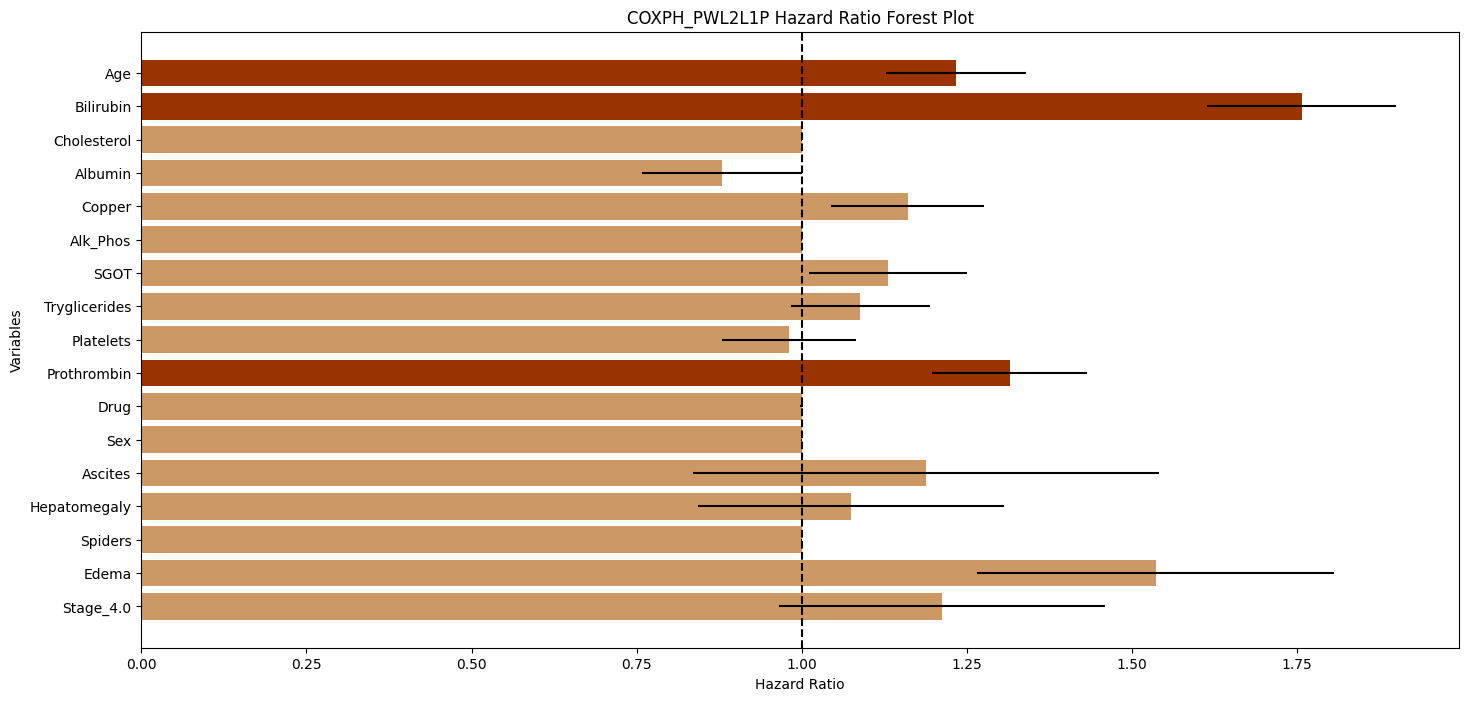

In [218]:
##################################
# Plotting the hazard ratio of the
# formulated Cox Regression model
# with Predominantly L2-Weighted and L1 Penalty
##################################
cirrhosis_survival_coxph_L1_25_L2_75_summary = cirrhosis_survival_coxph_L1_25_L2_75.summary
cirrhosis_survival_coxph_L1_25_L2_75_summary['hazard_ratio'] = np.exp(cirrhosis_survival_coxph_L1_25_L2_75_summary['coef'])
significant = cirrhosis_survival_coxph_L1_25_L2_75_summary['p'] < 0.05
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]

plt.barh(cirrhosis_survival_coxph_L1_25_L2_75_summary.index, 
         cirrhosis_survival_coxph_L1_25_L2_75_summary['hazard_ratio'], 
         xerr=cirrhosis_survival_coxph_L1_25_L2_75_summary['se(coef)'], 
         color=colors)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('COXPH_PWL2L1P Hazard Ratio Forest Plot')
plt.axvline(x=1, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

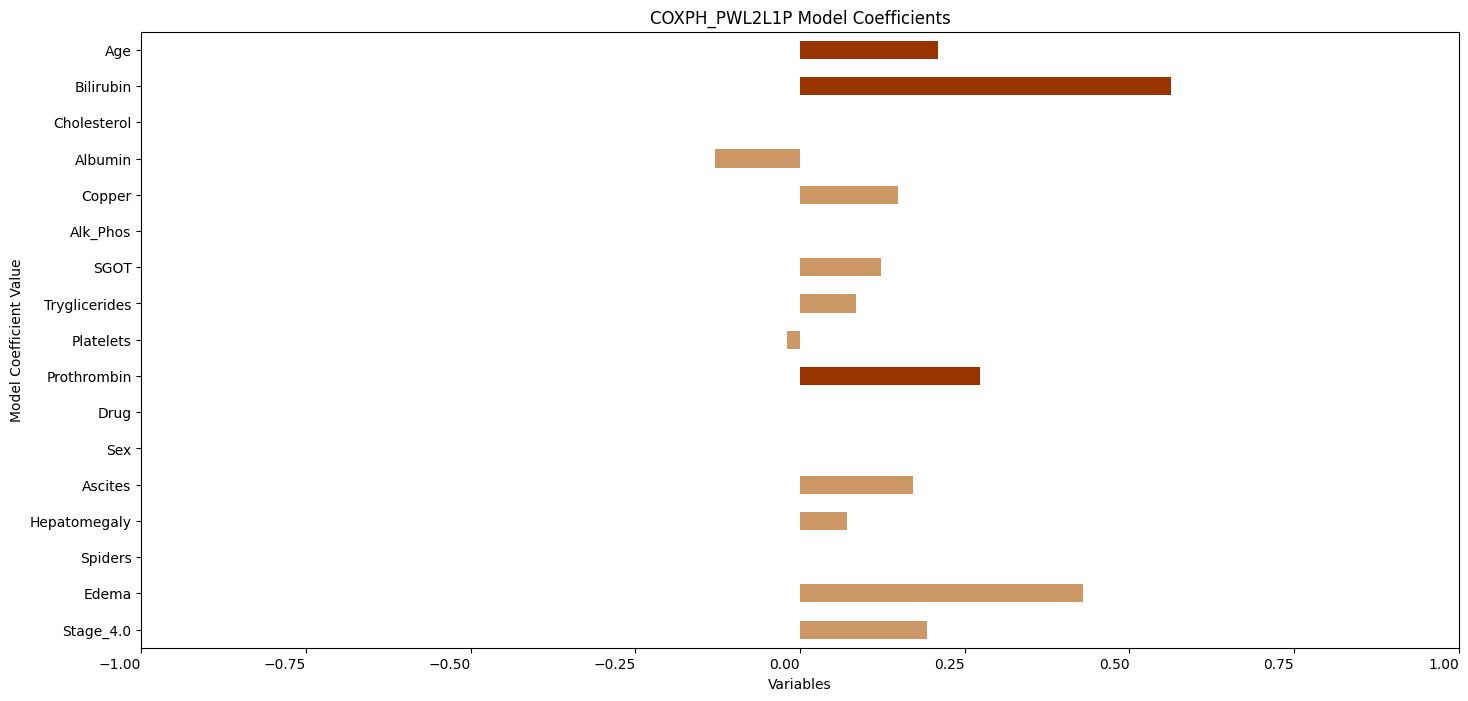

In [219]:
##################################
# Plotting the coefficient magnitude
# of the formulated Cox Regression model
# with Predominantly L2-Weighted and L1 Penalty
##################################
plt.figure(figsize=(17, 8))
colors = ['#993300' if sig else '#CC9966' for sig in significant]
cirrhosis_survival_coxph_L1_25_L2_75_summary['coef'].plot(kind='barh', color=colors)
plt.xlabel('Variables')
plt.ylabel('Model Coefficient Value')
plt.title('COXPH_PWL2L1P Model Coefficients')
plt.xticks(rotation=0, ha='right')
plt.xlim(-1,1)
plt.gca().invert_yaxis()
plt.show()

In [220]:
##################################
# Determining the number of
# selected and significant predictors
##################################
coxph_L1_25_L2_75_selected = sum((cirrhosis_survival_coxph_L1_25_L2_75_summary['coef']>0.001) | (-cirrhosis_survival_coxph_L1_25_L2_75_summary['coef']>0.001))
coxph_L1_25_L2_75_significant = sum(cirrhosis_survival_coxph_L1_25_L2_75_summary['p'] < 0.05)
display(f"Number of Selected Predictors: {coxph_L1_25_L2_75_selected}, Number of Significant Predictors: {coxph_L1_25_L2_75_significant}")

'Number of Selected Predictors: 12, Number of Significant Predictors: 3'

In [221]:
##################################
# Gathering the apparent model performance
# as baseline for evaluating overfitting
##################################
cirrhosis_survival_coxph_L1_25_L2_75.fit(cirrhosis_survival_train_modeling, duration_col='N_Days', event_col='Status')
train_predictions = cirrhosis_survival_coxph_L1_25_L2_75.predict_partial_hazard(cirrhosis_survival_train_modeling)
cirrhosis_survival_coxph_L1_25_L2_75_train_ci = concordance_index(cirrhosis_survival_train_modeling['N_Days'], 
                                                                     -train_predictions, 
                                                                     cirrhosis_survival_train_modeling['Status'])
display(f"Apparent Concordance Index: {cirrhosis_survival_coxph_L1_25_L2_75_train_ci}")

'Apparent Concordance Index: 0.8501300390117035'

In [222]:
##################################
# Performing 5-Fold Cross-Validation
# on the training data
##################################
kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
c_index_scores = []

for train_index, val_index in kf.split(cirrhosis_survival_train_modeling):
    df_train_fold = cirrhosis_survival_train_modeling.iloc[train_index]
    df_val_fold = cirrhosis_survival_train_modeling.iloc[val_index]
    
    cirrhosis_survival_coxph_L1_25_L2_75.fit(df_train_fold, duration_col='N_Days', event_col='Status')
    val_predictions = cirrhosis_survival_coxph_L1_25_L2_75.predict_partial_hazard(df_val_fold)
    c_index = concordance_index(df_val_fold['N_Days'], -val_predictions, df_val_fold['Status'])
    c_index_scores.append(c_index)

cirrhosis_survival_coxph_L1_25_L2_75_cv_ci_mean = np.mean(c_index_scores)
cirrhosis_survival_coxph_L1_25_L2_75_cv_ci_std = np.std(c_index_scores)

display(f"Cross-Validated Concordance Index: {cirrhosis_survival_coxph_L1_25_L2_75_cv_ci_mean}")

'Cross-Validated Concordance Index: 0.8152592390610126'

In [223]:
##################################
# Evaluating the model performance
# on test data
##################################
test_predictions = cirrhosis_survival_coxph_L1_25_L2_75.predict_partial_hazard(cirrhosis_survival_test_modeling)
cirrhosis_survival_coxph_L1_25_L2_75_test_ci = concordance_index(cirrhosis_survival_test_modeling['N_Days'], 
                                                                     -test_predictions, 
                                                                     cirrhosis_survival_test_modeling['Status'])
display(f"Test Concordance Index: {cirrhosis_survival_coxph_L1_25_L2_75_test_ci}")

'Test Concordance Index: 0.8671201814058956'

In [224]:
##################################
# Gathering the concordance indices
# from training, cross-validation and test
##################################
coxph_L1_25_L2_75_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_L1_25_L2_75_ci_values = pd.DataFrame([cirrhosis_survival_coxph_L1_25_L2_75_train_ci,
                                           cirrhosis_survival_coxph_L1_25_L2_75_cv_ci_mean,
                                           cirrhosis_survival_coxph_L1_25_L2_75_test_ci])
coxph_L1_25_L2_75_method = pd.DataFrame(["COXPH_PWL2L1P"]*3)
coxph_L1_25_L2_75_summary = pd.concat([coxph_L1_25_L2_75_set, 
                                     coxph_L1_25_L2_75_ci_values,
                                     coxph_L1_25_L2_75_method], 
                                    axis=1)
coxph_L1_25_L2_75_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_L1_25_L2_75_summary.reset_index(inplace=True, drop=True)
display(coxph_L1_25_L2_75_summary)

Set  Concordance.Index         Method
0             Train           0.850130  COXPH_PWL2L1P
1  Cross-Validation           0.815259  COXPH_PWL2L1P
2              Test           0.867120  COXPH_PWL2L1P

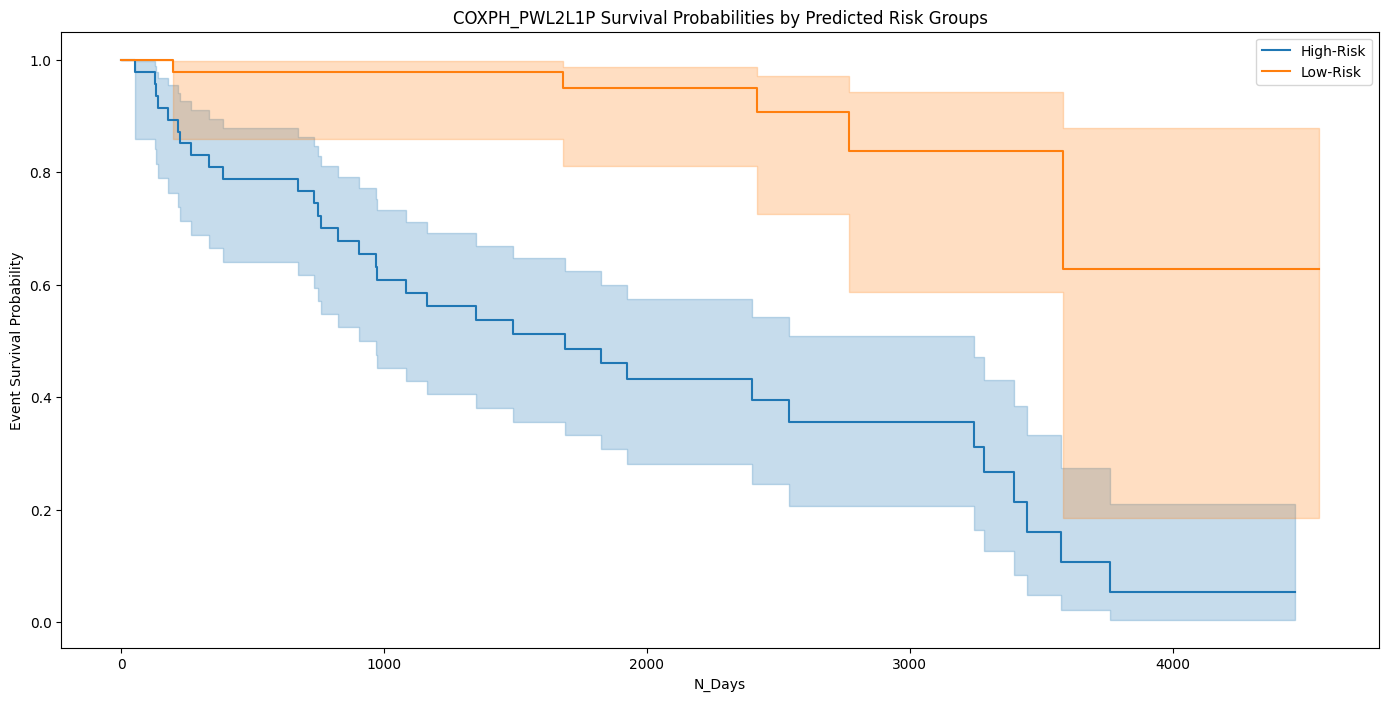

In [225]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_PWL2L1P'] = test_predictions
cirrhosis_survival_test_modeling['Predicted_RiskGroups_COXPH_PWL2L1P'] = risk_groups = pd.qcut(cirrhosis_survival_test_modeling['Predicted_Risks_COXPH_PWL2L1P'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test_modeling[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH_PWL2L1P Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [226]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

Status  N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
10    True    1827  0.226982   1.530100     1.302295  1.331981  1.916467   
20   False    1447 -0.147646   0.061189     0.793618 -1.158235  0.861264   
30   False    2574  0.296370  -1.283677     0.169685  3.237777 -1.008276   
40    True    3762  0.392609  -0.096645    -0.486337  1.903146 -0.546292   
50   False     837 -0.813646   1.089037     0.064451  0.212865  2.063138   

    Alk_Phos      SGOT  Tryglicerides  ...  Predicted_Risks_COXPH_FL1P  \
10 -0.477846 -0.451305       2.250260  ...                    3.515780   
20  0.625621  0.319035       0.446026  ...                    0.769723   
30 -0.873566 -0.845549      -0.351236  ...                    0.320200   
40 -0.247141 -0.720619      -0.810790  ...                    1.167777   
50 -0.224432  0.074987       2.333282  ...                    1.832490   

    Predicted_RiskGroups_COXPH_FL1P  Predicted_Risks_COXPH_FL2P  \
10                        High-Risk                    4.748349   
20                         Low-Risk                    0.681968   
30                         Low-Risk                    0.165574   
40                        High-Risk                    1.591530   
50                        High-Risk                    2.541904   

    Predicted_RiskGroups_COXPH_FL2P  Predicted_Risks_COXPH_EL1L2P  \
10                        High-Risk                      4.442277   
20                         Low-Risk                      0.741410   
30                         Low-Risk                      0.255343   
40                        High-Risk                      1.275445   
50                        High-Risk                      2.125042   

    Predicted_RiskGroups_COXPH_EL1L2P  Predicted_Risks_COXPH_PWL1L2P  \
10                          High-Risk                       3.761430   
20                           Low-Risk                       0.747044   
30                           Low-Risk                       0.295159   
40                          High-Risk                       1.214395   
50                          High-Risk                       1.832724   

    Predicted_RiskGroups_COXPH_PWL1L2P  Predicted_Risks_COXPH_PWL2L1P  \
10                           High-Risk                       4.348925   
20                            Low-Risk                       0.694654   
30                            Low-Risk                       0.202767   
40                           High-Risk                       1.404015   
50                           High-Risk                       2.288206   

    Predicted_RiskGroups_COXPH_PWL2L1P  
10                           High-Risk  
20                            Low-Risk  
30                            Low-Risk  
40                           High-Risk  
50                           High-Risk  

[5 rows x 31 columns]

In [227]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test_modeling.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_COXPH_PWL2L1P']])

   Predicted_RiskGroups_COXPH_PWL2L1P
10                          High-Risk
20                           Low-Risk
30                           Low-Risk
40                          High-Risk
50                          High-Risk


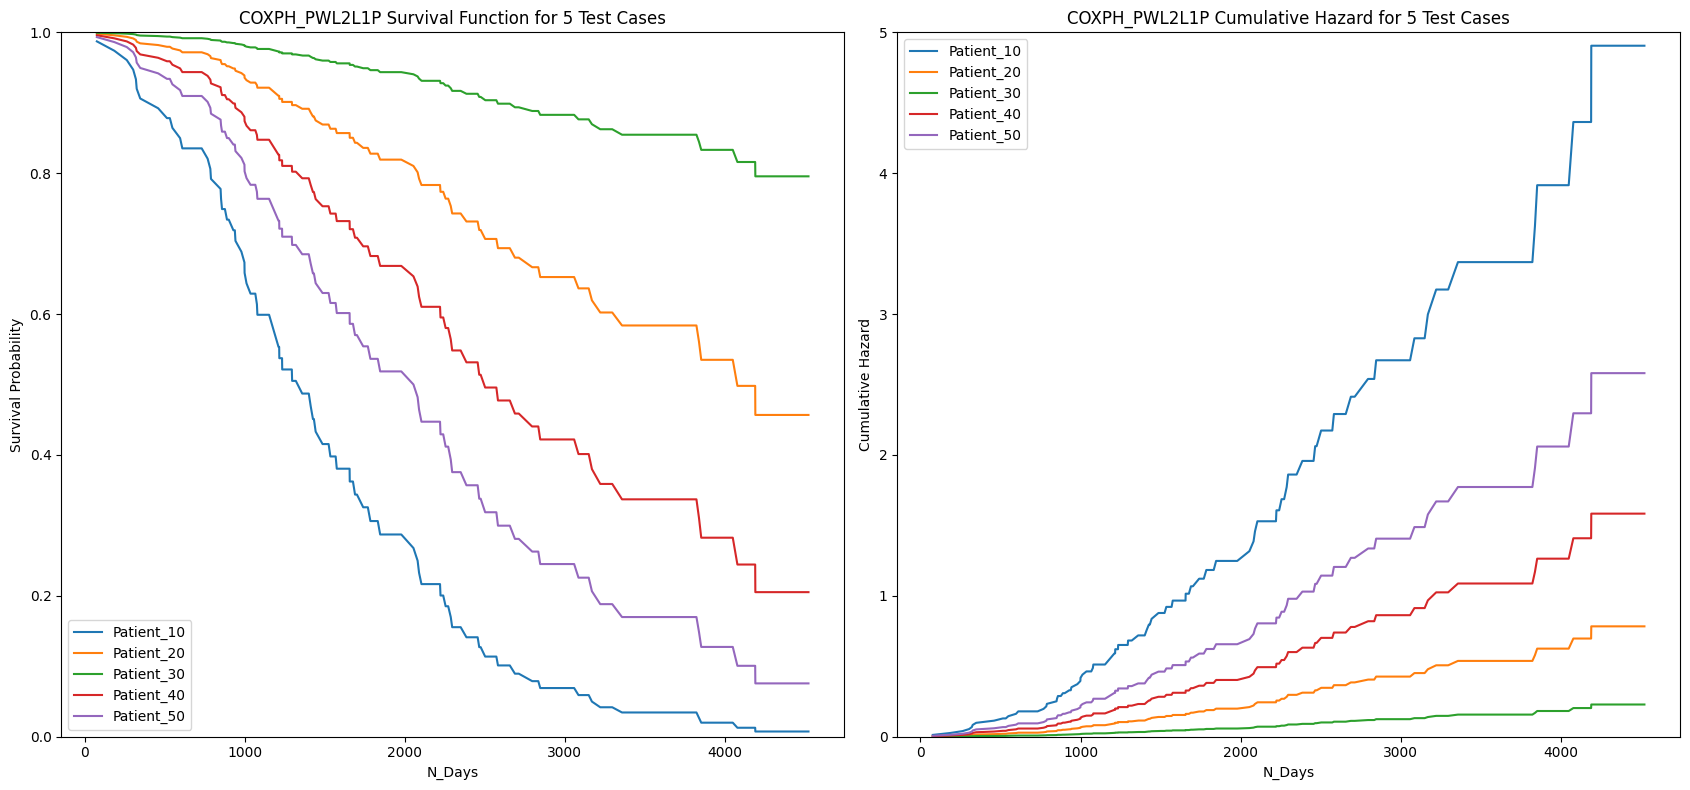

In [228]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_test_modeling.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50']

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
for i, (index, row) in enumerate(test_case.iterrows()):
    survival_function = cirrhosis_survival_coxph_L1_25_L2_75.predict_survival_function(row.to_frame().T)
    axes[0].plot(survival_function, label=f'Sample {i+1}')
axes[0].set_title('COXPH_PWL2L1P Survival Function for 5 Test Cases')
axes[0].set_xlabel('N_Days')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Survival Probability')
axes[0].legend(test_case_labels, loc="lower left")
for i, (index, row) in enumerate(test_case.iterrows()):
    hazard_function = cirrhosis_survival_coxph_L1_25_L2_75.predict_cumulative_hazard(row.to_frame().T)
    axes[1].plot(hazard_function, label=f'Sample {i+1}')
axes[1].set_title('COXPH_PWL2L1P Cumulative Hazard for 5 Test Cases')
axes[1].set_xlabel('N_Days')
axes[1].set_ylim(0,5)
axes[1].set_ylabel('Cumulative Hazard')
axes[1].legend(test_case_labels, loc="upper left")
plt.tight_layout()
plt.show()

In [229]:
##################################
# Creating the explainer object
##################################
cirrhosis_survival_coxph_L1_25_L2_75_explainer = shap.Explainer(cirrhosis_survival_coxph_L1_25_L2_75.predict_partial_hazard, 
                                                    cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))
cirrhosis_survival_coxph_L1_25_L2_75_shap_values = cirrhosis_survival_coxph_L1_25_L2_75_explainer(cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]))

PermutationExplainer explainer: 219it [00:11,  2.39it/s]                                                               


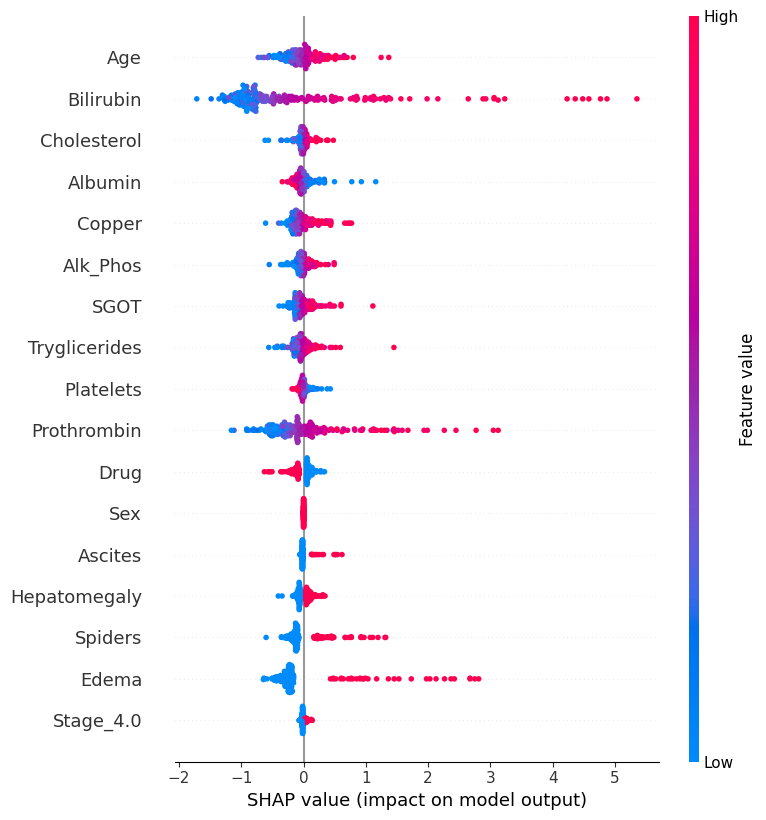

In [230]:
##################################
# Plotting the SHAP summary plot
##################################
shap.summary_plot(cirrhosis_survival_coxph_L1_25_L2_75_shap_values, 
                  cirrhosis_survival_train_modeling.drop(columns=["N_Days", "Status"]),
                  sort=False)

## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>

1. In the context of Cox proportional hazards regression, penalties are used to prevent overfitting and improve the generalizability of the model by adding a constraint to the optimization problem. These penalties can help improve the model's predictive performance and interpretability by addressing overfitting and multicollinearity issues.
2. The choice of penalty will depend on a number of factors including interpretability, multicollinearity handling and variable selection capabilities.
    * [No penalty](https://lifelines.readthedocs.io/en/latest/) (no regularization) can lead to overfitting, especially when the number of predictors is large or when there is multicollinearity among the predictors.
    * [Lasso penalty](https://lifelines.readthedocs.io/en/latest/) (L1 regularization) encourages sparsity in the coefficients by setting some coefficients exactly to zero, effectively performing variable selection.
    * [Ridge penalty](https://lifelines.readthedocs.io/en/latest/) (L2 regularization) shrinks the coefficients towards zero but does not set them exactly to zero, which can be beneficial in dealing with multicollinearity among predictors. 
    * [Elastic net penalty](https://lifelines.readthedocs.io/en/latest/) (L1 and L2 regularization) combines the benefits of both Lasso and Ridge penalties, promoting sparsity while also dealing with multicollinearity.
3. Comparing all results from the penalized cox regression models formulated, the most viable model for prediction was determined as:
    * [Elastic net penalty](https://lifelines.readthedocs.io/en/latest/) (optimized for a heavily weighted L2 over L1 regularization)
        * Demonstrated the best independent cross-validated (**Concordance Index** = 0.8152) and test (**Concordance Index** = 0.8671) model performance 
        * Showed considerable overfit between the train (**Concordance Index** = 0.8501) and cross-validated (**Concordance Index** = 0.8152) model performance
        * Selected a sufficient number of predictors (12 out of 17)
        * Identified a sufficient number of statistically significant predictors (3 out of 12)
            * <span style="color: #FF0000">Bilirubin</span>: Increase in value associated with a more elevated hazard 
            * <span style="color: #FF0000">Prothrombin</span>: Increase in value associated with a more elevated hazard 
            * <span style="color: #FF0000">Age</span>: Increase in value associated with a more elevated hazard 
        * Demonstrated good survival profile differentiation between the risk groups
        * Estimated resonable hazard and survival probability profile for 5 sampled cases
        * Obtained **SHAP values** provided an insightful and clear indication of each predictor's impact on the prediction, independent of the penalization
            * Higher values for <span style="color: #FF0000">Bilirubin</span> result to increased event risk
            * Higher values for <span style="color: #FF0000">Prothrombin</span> result to increased event risk
            * Higher values for <span style="color: #FF0000">Age</span> result to increased event risk

In [231]:
##################################
# Consolidating all the
# model performance metrics
##################################
model_performance_comparison = pd.concat([coxph_L1_0_L2_0_summary, 
                                          coxph_L1_100_L2_0_summary,
                                          coxph_L1_0_L2_100_summary, 
                                          coxph_L1_50_L2_50_summary,
                                          coxph_L1_75_L2_25_summary,
                                          coxph_L1_25_L2_75_summary], 
                                         axis=0,
                                         ignore_index=True)
print('Cox Regression Model Comparison: ')
display(model_performance_comparison)

Cox Regression Model Comparison: 


Set  Concordance.Index         Method
0              Train           0.847854       COXPH_NP
1   Cross-Validation           0.802364       COXPH_NP
2               Test           0.848073       COXPH_NP
3              Train           0.831356     COXPH_FL1P
4   Cross-Validation           0.811197     COXPH_FL1P
5               Test           0.842630     COXPH_FL1P
6              Train           0.853381     COXPH_FL2P
7   Cross-Validation           0.809983     COXPH_FL2P
8               Test           0.867574     COXPH_FL2P
9              Train           0.846554   COXPH_EL1L2P
10  Cross-Validation           0.816280   COXPH_EL1L2P
11              Test           0.863039   COXPH_EL1L2P
12             Train           0.839402  COXPH_PWL1L2P
13  Cross-Validation           0.810178  COXPH_PWL1L2P
14              Test           0.852608  COXPH_PWL1L2P
15             Train           0.850130  COXPH_PWL2L1P
16  Cross-Validation           0.815259  COXPH_PWL2L1P
17              Test           0.867120  COXPH_PWL2L1P

In [232]:
##################################
# Consolidating the concordance indices
# for all sets and models
##################################
set_labels = ['Train','Cross-Validation','Test']
coxph_np_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                            (model_performance_comparison['Set'] == 'Cross-Validation') |
                                            (model_performance_comparison['Set'] == 'Test')) & 
                                           (model_performance_comparison['Method']=='COXPH_NP')]['Concordance.Index'].values
coxph_fl1p_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                              (model_performance_comparison['Set'] == 'Cross-Validation') |
                                              (model_performance_comparison['Set'] == 'Test')) & 
                                             (model_performance_comparison['Method']=='COXPH_FL1P')]['Concordance.Index'].values
coxph_fl2p_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                              (model_performance_comparison['Set'] == 'Cross-Validation') |
                                              (model_performance_comparison['Set'] == 'Test')) & 
                                             (model_performance_comparison['Method']=='COXPH_FL2P')]['Concordance.Index'].values
coxph_el1l2p_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                                (model_performance_comparison['Set'] == 'Cross-Validation') |
                                                (model_performance_comparison['Set'] == 'Test')) &  
                                               (model_performance_comparison['Method']=='COXPH_EL1L2P')]['Concordance.Index'].values
coxph_pwl1l2p_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                                 (model_performance_comparison['Set'] == 'Cross-Validation') |
                                                 (model_performance_comparison['Set'] == 'Test')) & 
                                                (model_performance_comparison['Method']=='COXPH_PWL1L2P')]['Concordance.Index'].values
coxph_pwl2l1p_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                                 (model_performance_comparison['Set'] == 'Cross-Validation') |
                                                 (model_performance_comparison['Set'] == 'Test')) & 
                                                (model_performance_comparison['Method']=='COXPH_PWL2L1P')]['Concordance.Index'].values

In [233]:
##################################
# Plotting the values for the
# concordance indices
# for all models
##################################
ci_plot = pd.DataFrame({'COXPH_NP': list(coxph_np_ci),
                        'COXPH_FL1P': list(coxph_fl1p_ci),
                        'COXPH_FL2P': list(coxph_fl2p_ci),
                        'COXPH_EL1L2P': list(coxph_el1l2p_ci),
                        'COXPH_PWL1L2P': list(coxph_pwl1l2p_ci),
                        'COXPH_PWL2L1P': list(coxph_pwl2l1p_ci)},
                       index = set_labels)
display(ci_plot)

COXPH_NP  COXPH_FL1P  COXPH_FL2P  COXPH_EL1L2P  \
Train             0.847854    0.831356    0.853381      0.846554   
Cross-Validation  0.802364    0.811197    0.809983      0.816280   
Test              0.848073    0.842630    0.867574      0.863039   

                  COXPH_PWL1L2P  COXPH_PWL2L1P  
Train                  0.839402       0.850130  
Cross-Validation       0.810178       0.815259  
Test                   0.852608       0.867120

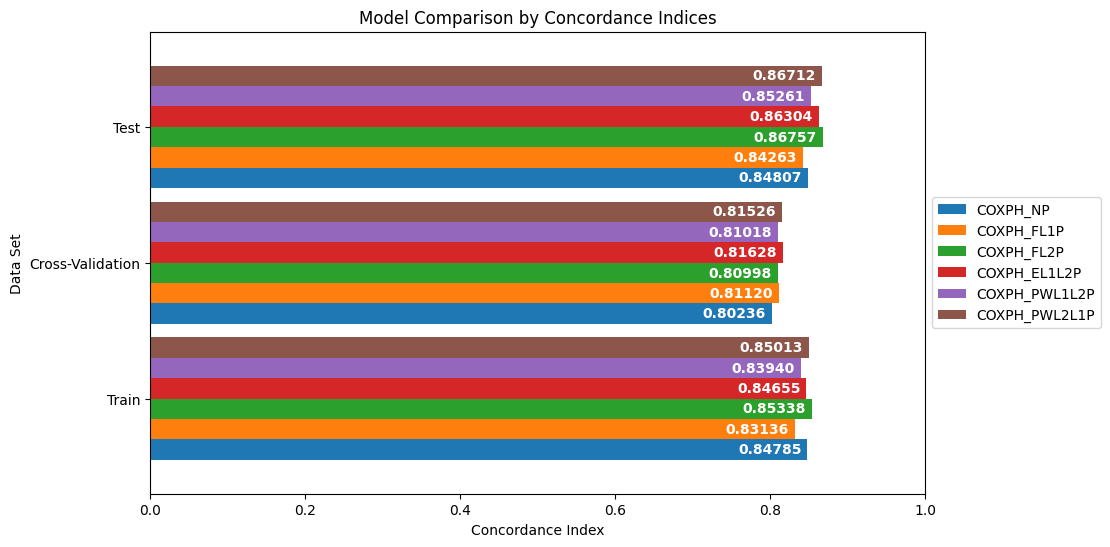

In [234]:
##################################
# Plotting all the concordance indices
# for all models
##################################
ci_plot = ci_plot.plot.barh(figsize=(10, 6), width=0.90)
ci_plot.set_xlim(0.00,1.00)
ci_plot.set_title("Model Comparison by Concordance Indices")
ci_plot.set_xlabel("Concordance Index")
ci_plot.set_ylabel("Data Set")
ci_plot.grid(False)
ci_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ci_plot.containers:
    ci_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

In [235]:
##################################
# Plotting the values for the
# number of selected and significant predictors
# for all models
##################################
predictor_plot = pd.DataFrame({'COXPH_NP': list([coxph_L1_0_L2_0_selected, coxph_L1_0_L2_0_significant]),
                               'COXPH_FL1P': list([coxph_L1_100_L2_0_selected, coxph_L1_100_L2_0_significant]),
                               'COXPH_FL2P': list([coxph_L1_0_L2_100_selected, coxph_L1_0_L2_100_significant]),
                               'COXPH_EL1L2P': list([coxph_L1_50_L2_50_selected, coxph_L1_50_L2_50_significant]),
                               'COXPH_PWL1L2P': list([coxph_L1_75_L2_25_selected, coxph_L1_75_L2_25_significant]),
                               'COXPH_PWL2L1P': list([coxph_L1_25_L2_75_selected, coxph_L1_25_L2_75_significant])},
                              index = ['Selected','Significant'])
display(predictor_plot)

COXPH_NP  COXPH_FL1P  COXPH_FL2P  COXPH_EL1L2P  COXPH_PWL1L2P  \
Selected           17           8          17            10              8   
Significant         3           1           3             2              1   

             COXPH_PWL2L1P  
Selected                12  
Significant              3

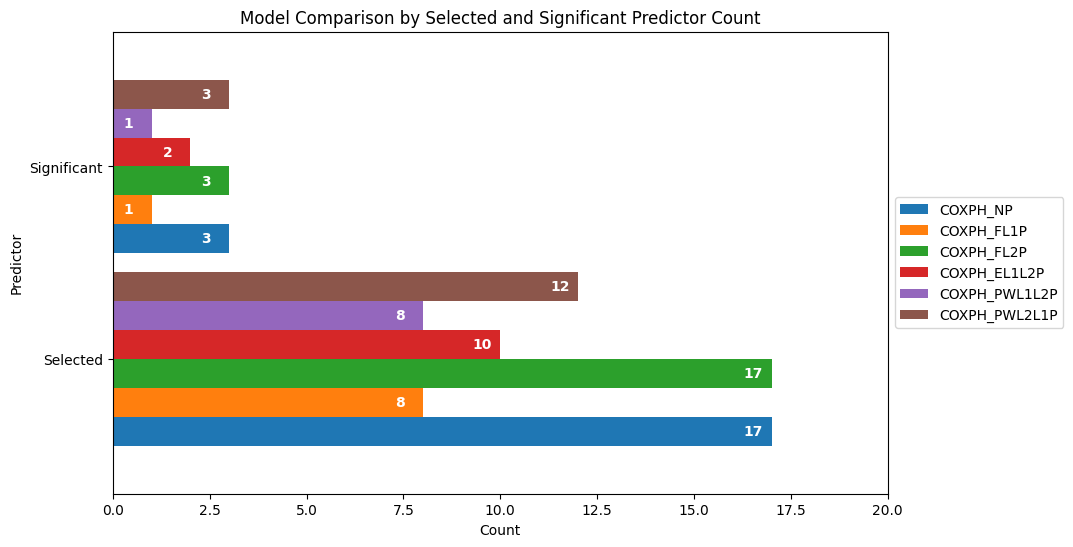

In [236]:
##################################
# Plotting all the predictor counts
# for all models
##################################
predictor_plot = predictor_plot.plot.barh(figsize=(10, 6), width=0.90)
predictor_plot.set_xlim(0.00,20.00)
predictor_plot.set_title("Model Comparison by Selected and Significant Predictor Count")
predictor_plot.set_xlabel("Count")
predictor_plot.set_ylabel("Predictor")
predictor_plot.grid(False)
predictor_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in predictor_plot.containers:
    predictor_plot.bar_label(container, fmt='%.0f', padding=-20, color='white', fontweight='bold')

# 2. Summary <a class="anchor" id="Summary"></a>

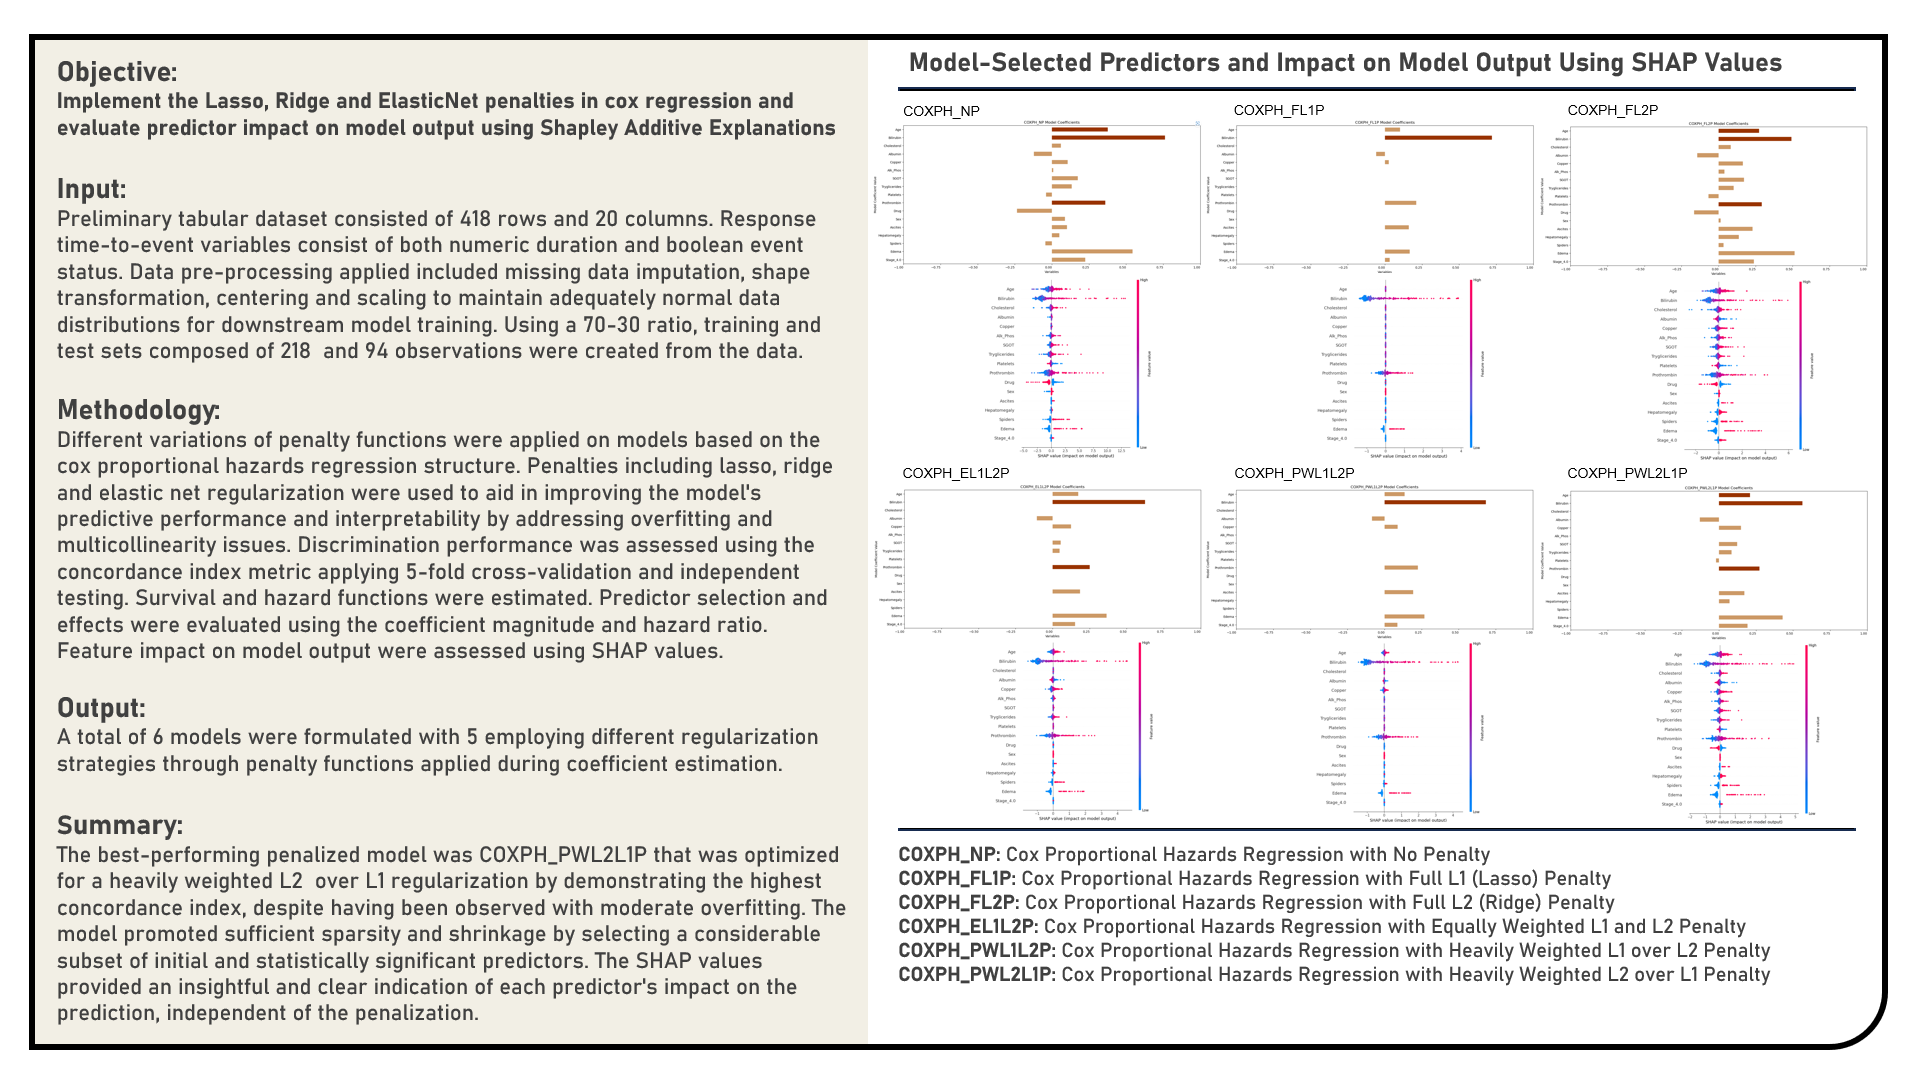

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Clinical Prediction Models](http://clinicalpredictionmodels.org/) by Ewout Steyerberg
* **[Book]** [Survival Analysis: A Self-Learning Text](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) by David Kleinbaum and Mitchel Klein
* **[Book]** [Applied Survival Analysis Using R](https://link.springer.com/book/10.1007/978-3-319-31245-3/) by Dirk Moore
* **[Python Library API]** [SciKit-Survival](https://pypi.org/project/scikit-survival/) by SciKit-Survival Team
* **[Python Library API]** [SciKit-Learn](https://scikit-learn.org/stable/index.html) by SciKit-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Python Library API]** [Lifelines](https://lifelines.readthedocs.io/en/latest/) by Lifelines Team
* **[Article]** [Exploring Time-to-Event with Survival Analysis](https://towardsdatascience.com/exploring-time-to-event-with-survival-analysis-8b0a7a33a7be) by Olivia Tanuwidjaja (Towards Data Science)
* **[Article]** [The Complete Introduction to Survival Analysis in Python](https://towardsdatascience.com/the-complete-introduction-to-survival-analysis-in-python-7523e17737e6) by Marco Peixeiro (Towards Data Science)
* **[Article]** [Survival Analysis Simplified: Explaining and Applying with Python](https://medium.com/@zynp.atlii/survival-analysis-simplified-explaining-and-applying-with-python-7efacf86ba32) by Zeynep Atli (Towards Data Science)
* **[Article]** [Survival Analysis in Python (KM Estimate, Cox-PH and AFT Model)](https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d) by Rahul Raoniar (Medium)
* **[Article]** [How to Evaluate Survival Analysis Models)](https://towardsdatascience.com/how-to-evaluate-survival-analysis-models-dd67bc10caae) by Nicolo Cosimo Albanese (Towards Data Science)
* **[Article]** [Survival Analysis with Python Tutorial — How, What, When, and Why)](https://pub.towardsai.net/survival-analysis-with-python-tutorial-how-what-when-and-why-19a5cfb3c312) by Towards AI Team (Medium)
* **[Article]** [Survival Analysis: Predict Time-To-Event With Machine Learning)](https://towardsdatascience.com/survival-analysis-predict-time-to-event-with-machine-learning-part-i-ba52f9ab9a46) by Lina Faik (Medium)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 1](https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 2](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-2.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 3](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Pratik Shukla (KDNuggets)
* **[Article]** [Model Explainability using SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations)](https://medium.com/@anshulgoel991/model-exploitability-using-shap-shapley-additive-explanations-and-lime-local-interpretable-cb4f5594fc1a) by Anshul Goel (Medium)
* **[Article]** [A Comprehensive Guide into SHAP (SHapley Additive exPlanations) Values](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Brain John Aboze (DeepChecks.Com)
* **[Article]** [SHAP - Understanding How This Method for Explainable AI Works](https://safjan.com/how-the-shap-method-for-explainable-ai-works/#google_vignette) by Krystian Safjan (Safjan.Com)
* **[Article]** [SHAP: Shapley Additive Explanations](https://towardsdatascience.com/shap-shapley-additive-explanations-5a2a271ed9c3) by Fernando Lopez (Medium)
* **[Article]** [Explainable Machine Learning, Game Theory, and Shapley Values: A technical review](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Soufiane Fadel (Statistics Canada)
* **[Article]** [SHAP Values Explained Exactly How You Wished Someone Explained to You](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30) by Samuele Mazzanti (Towards Data Science)
* **[Article]** [Explaining Machine Learning Models: A Non-Technical Guide to Interpreting SHAP Analyses](https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/) by Aidan Cooper (AidanCooper.Co.UK)
* **[Article]** [Shapley Additive Explanations: Unveiling the Black Box of Machine Learning](https://python.plainenglish.io/shapley-additive-explanations-unveiling-the-black-box-of-machine-learning-477ba01ffa07) by Evertone Gomede (Medium)
* **[Article]** [SHAP (SHapley Additive exPlanations)](https://www.nerd-data.com/shap/) by Narut Soontranon (Nerd-Data.Com)
* **[Kaggle Project]** [Survival Analysis with Cox Model Implementation](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Bryan Boulé (Kaggle)
* **[Kaggle Project]** [Survival Analysis](https://www.kaggle.com/code/gunesevitan/survival-analysis/notebook) by Gunes Evitan (Kaggle)
* **[Kaggle Project]** [Survival Analysis of Lung Cancer Patients](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Sayan Chakraborty (Kaggle)
* **[Kaggle Project]** [COVID-19 Cox Survival Regression](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Ilias Katsabalos (Kaggle)
* **[Kaggle Project]** [Liver Cirrhosis Prediction with XGboost & EDA](https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda) by Arjun Bhaybang (Kaggle)
* **[Kaggle Project]** [Survival Models VS ML Models Benchmark - Churn Tel](https://www.kaggle.com/code/caralosal/survival-models-vs-ml-models-benchmark-churn-tel) by Carlos Alonso Salcedo (Kaggle)
* **[Publication]** [Regression Models and Life Tables](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) by David Cox (Royal Statistical Society)
* **[Publication]** [Covariance Analysis of Censored Survival Data](https://pubmed.ncbi.nlm.nih.gov/4813387/) by Norman Breslow (Biometrics)
* **[Publication]** [The Efficiency of Cox’s Likelihood Function for Censored Data](https://www.jstor.org/stable/2286217) by Bradley Efron (Journal of the American Statistical Association)
* **[Publication]** [Regularization Paths for Cox’s Proportional Hazards Model via Coordinate Descent](https://doi.org/10.18637/jss.v039.i05) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software)
* **[Publication]** [Shapley Additive Explanations](https://dl.acm.org/doi/10.5555/1756006.1756007) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software) by Erik Strumbelj and Igor Kononenko (The Journal of Machine Learning Research)
* **[Publication]** [A Unified Approach to Interpreting Model Predictions](https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) by Scott Lundberg and Sun-In Lee (Conference on Neural Information Processing Systems)
* **[Publication]** [Survival Analysis Part I: Basic Concepts and First Analyses](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394262/) by Taane Clark (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part II: Multivariate Data Analysis – An Introduction to Concepts and Methods](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394368/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part III: Multivariate Data Analysis – Choosing a Model and Assessing its Adequacy and Fit](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2376927/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part IV: Further Concepts and Methods in Survival Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394469/) by Taane Clark (British Journal of Cancer)
* **[Course]** [Survival Analysis in Python](https://app.datacamp.com/learn/courses/survival-analysis-in-python) by Shae Wang (DataCamp)

In [237]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))